# **Sprint 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

### Reading the Dataset

In [ ]:
df = pd.read_csv('Coffee_Stores_Data.csv')
print(df.shape)
df.head(10)

(1259776, 15)


### Eliminating the Unnecessary Products

In [ ]:
searchfor =    ['Honey Raisin Bran Muffin',
               'Jalapeno Cheese Bagel', 'Lemon Loaf', 'Mixed Berries & Granola Yogurt Parfait', 'Mixed Fruit Snack Pot', 
               'Muffin - Blueberry Streusel', 'Muffin - Double Chocolate', 'New York Cheesecake', 'Plain Bagel', 
               'Pressed Juicery Spicy Greens w Ginger', 'Protein Box', 'Smoked Salmon Sandwich', 'Tasty Tuna Salad Sandwich',
               'Vive Juice Shot']
print(searchfor)
df['Remove'] = np.where(df['Description'].str.contains('|'.join(searchfor), case=False, na=False), 1, 0)
df = df[df.Remove == 1]
del df['Remove']

In [ ]:
df = df[['BusinessDate','StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]

In [ ]:
print(df.shape)
df.head(5)

### Conversion of 'BusinessDate' into Datetime format

In [ ]:
df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])
df['Year'] = df['BusinessDate'].dt.year

In [ ]:
df

### Dataset of three stores '18', '117' and '332'

In [ ]:
df_three_stores = df[(df["StoreID"]==18) | (df["StoreID"]==117) | (df["StoreID"]==332)]

In [ ]:
df_three_stores.index = range(len(df_three_stores))
df_three_stores

In [ ]:
df_three_stores = df_three_stores[['BusinessDate','StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]

In [ ]:
df_three_stores['BusinessDate'] = pd.to_datetime(df_three_stores['BusinessDate'])
df_three_stores['Year'] = df_three_stores['BusinessDate'].dt.year

In [ ]:
df_three_stores

In [ ]:
df=df.sort_values(by=['Description','BusinessDate'],ascending = (True))
df.index = range(len(df))
df.head()

### Part A-1

#### Box plot of all 14 classes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

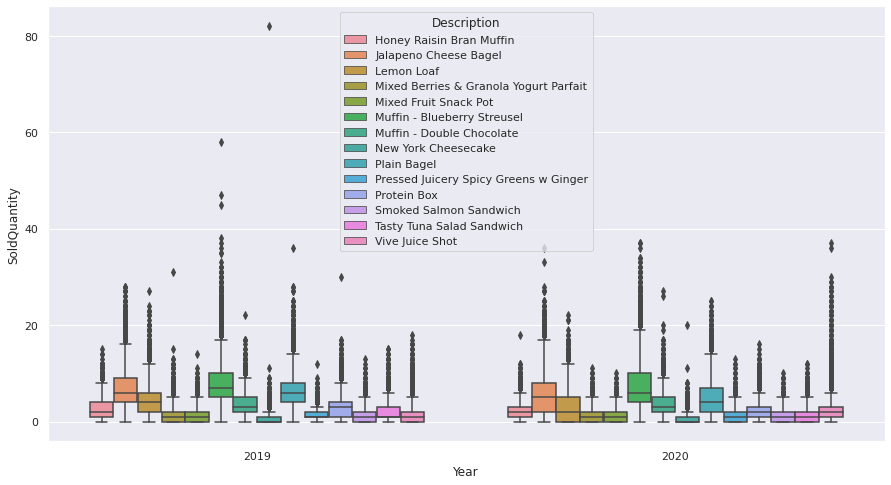

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x = df['Year'],
            y = df['SoldQuantity'],
            hue = df['Description'])

#### End Quantity pattern for all the classes

In [ ]:
df_inventory = df[['Description','BusinessDate','EndQuantity']].groupby(['Description','BusinessDate']).mean()

In [ ]:
df_inventory=df_inventory.reset_index()
df_inventory

,Description,BusinessDate,EndQuantity
0,Honey Raisin Bran Muffin,2019-06-29,0.131148
1,Honey Raisin Bran Muffin,2019-06-30,0.008197
2,Honey Raisin Bran Muffin,2019-07-01,0.081967
3,Honey Raisin Bran Muffin,2019-07-02,0.024590
4,Honey Raisin Bran Muffin,2019-07-03,0.155738
...,...,...,...
5133,Vive Juice Shot,2020-06-25,25.209877
5134,Vive Juice Shot,2020-06-26,22.296296
5135,Vive Juice Shot,2020-06-27,23.325301
5136,Vive Juice Shot,2020-06-28,20.368852


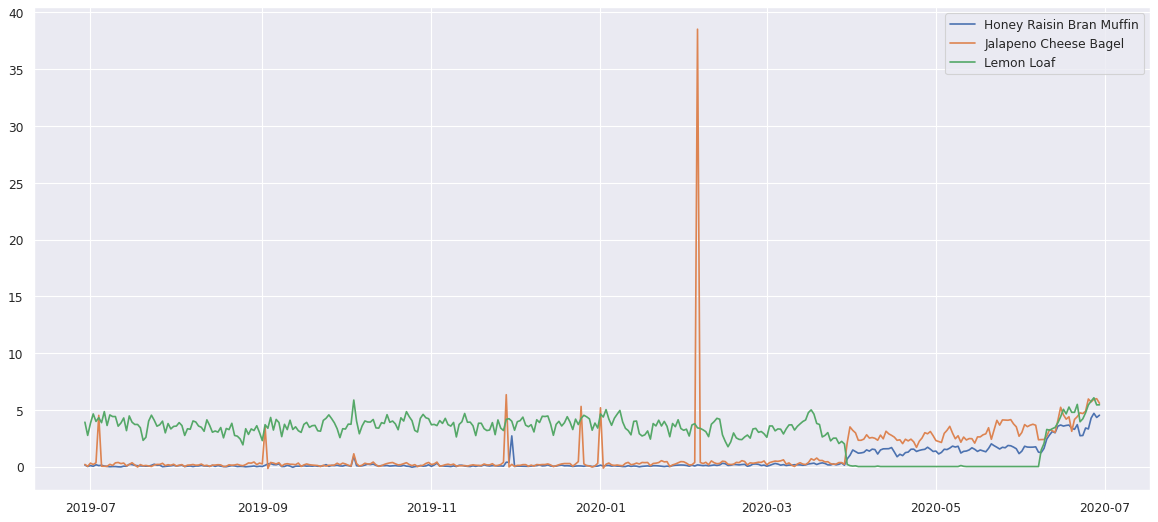

In [ ]:
figure(figsize=(18, 8), dpi=80)
a=0
for i in range(3):     
    plt.plot(df_inventory[df_inventory['Description']==searchfor[i]].BusinessDate, df_inventory[df_inventory['Description']==searchfor[i]].EndQuantity)
    a=a+1
    if a==3:
        break
plt.gca().legend((searchfor[0],searchfor[1],searchfor[2]))
plt.show()

In [ ]:
figure(figsize=(18, 8), dpi=80)
a=0
for i in range(3):     
    plt.plot(df_inventory[df_inventory['Description']==searchfor[i+3]].BusinessDate, df_inventory[df_inventory['Description']==searchfor[i+3]].EndQuantity)
    a=a+1
    if a==3:
        break
plt.gca().legend((searchfor[3],searchfor[4],searchfor[5]))
plt.show()

In [ ]:
figure(figsize=(18, 8), dpi=80)
a=0
for i in range(4):     
    plt.plot(df_inventory[df_inventory['Description']==searchfor[i+6]].BusinessDate, df_inventory[df_inventory['Description']==searchfor[i+6]].EndQuantity)
    a=a+1
    if a==4:
        break
plt.gca().legend((searchfor[6],searchfor[7],searchfor[8],searchfor[9]))
plt.show()

In [ ]:
figure(figsize=(18, 8), dpi=80)
a=0
for i in range(4):     
    plt.plot(df_inventory[df_inventory['Description']==searchfor[i+10]].BusinessDate, df_inventory[df_inventory['Description']==searchfor[i+10]].EndQuantity)
    a=a+1
    if a==4:
        break
plt.gca().legend((searchfor[10],searchfor[11],searchfor[12],searchfor[13]))
plt.show()

#### Stocked out pattern of all the stores

In [ ]:
df_stockedout = df[['Description','Year','StockedOut']].groupby(['Description','Year']).sum()
df_stockedout.unstack().plot(kind='bar')

#### Stocked out pattern of three stores

In [ ]:
df_three_stores_stockedout = df_three_stores[['Description','Year','StockedOut']].groupby(['Description','Year']).sum()
df_three_stores_stockedout.unstack().plot(kind='bar')

### Part A-2

#### Aggregation of soldQuantity for all the classes

In [ ]:
df_soldQuantity = df[['Description','SoldQuantity']].groupby(['Description']).sum().sort_values(by=['SoldQuantity'],ascending = (True))
df_soldQuantity

In [ ]:
print("%25 of the 14 is:",0.25*len(df_soldQuantity))

In [ ]:
print("Best seller products for the year of 2019 and 2020 are: Muffin - Double Chocolate, Plain Bagel, Jalapeno Cheese Bagel, Muffin - Blueberry Streusel")

In [ ]:
print("Worst seller products for the year of 2019 and 2020 are: New York Cheesecake, Pressed Juicery Spicy Greens w Ginger, Smoked Salmon Sandwich, Mixed Fruit Snack Pot")

#### Best seller dataset for all stores

In [ ]:
df_best_worst = df[['Description','Year','SoldQuantity']]
searchfor_best = ['Muffin - Double Chocolate', 'Plain Bagel', 'Jalapeno Cheese Bagel', 'Muffin - Blueberry Streusel']               
print(searchfor_best)
df_best_worst['Remove'] = np.where(df_best_worst['Description'].str.contains('|'.join(searchfor_best), case=False, na=False), 1, 0)
df_best = df_best_worst[df_best_worst.Remove == 1]
del df_best['Remove']
df_best.index = range(len(df_best))

In [ ]:
df_best.head()

#### Worst seller dataset for all stores

In [ ]:
df_best_worst = df[['Description','Year','SoldQuantity']]
searchfor_worst = ['New York Cheesecake', 'Pressed Juicery Spicy Greens w Ginger', 'Smoked Salmon Sandwich', 'Mixed Fruit Snack Pot']               
print(searchfor_worst)
df_best_worst['Remove'] = np.where(df_best_worst['Description'].str.contains('|'.join(searchfor_worst), case=False, na=False), 1, 0)
df_worst = df_best_worst[df_best_worst.Remove == 1]
del df_worst['Remove']
df_worst.index = range(len(df_worst))

In [ ]:
df_worst.head()

In [ ]:
df_worst.index = range(len(df_worst))
df_worst.head()

#### Visualisation of Best and Worst seller for all stores

In [ ]:
df_best.groupby(['Description','Year']).sum()

In [ ]:
df_worst.groupby(['Description','Year']).sum()

In [ ]:
df_best.groupby(['Description','Year']).sum().unstack().plot(kind='bar')

In [ ]:
df_worst.groupby(['Description','Year']).sum().unstack().plot(kind='bar')

#### Best and Worst seller Analysis for Three Stores

In [ ]:
df_three_stores_soldQuantity = df_three_stores[['Description','SoldQuantity']].groupby(['Description']).sum().sort_values(by=['SoldQuantity'],ascending = (True))
df_three_stores_soldQuantity

In [ ]:
print("%25 of the 14 is:",0.25*len(df_three_stores_soldQuantity))

In [ ]:
print("Best seller products for the year of 2019 and 2020 are:Lemon Loaf, Plain Bagel, Jalapeno Cheese Bagel, Muffin - Blueberry Streusel")

In [ ]:
print("Worst seller products for the year of 2019 and 2020 are: New York Cheesecake, Pressed Juicery Spicy Greens w Ginger, Vive Juice Shot, Mixed Fruit Snack Pot")

#### Best seller dataset for Three stores

In [ ]:
df_three_stores_best_worst = df_three_stores[['Description','Year','SoldQuantity']]
searchfor_best = ['Lemon Loaf', 'Plain Bagel', 'Jalapeno Cheese Bagel', 'Muffin - Blueberry Streusel']               
print(searchfor_best)
df_three_stores_best_worst['Remove'] = np.where(df_three_stores_best_worst['Description'].str.contains('|'.join(searchfor_best), case=False, na=False), 1, 0)
df_three_stores_best = df_three_stores_best_worst[df_three_stores_best_worst.Remove == 1]
del df_three_stores_best['Remove']
df_three_stores_best.index = range(len(df_three_stores_best))

In [ ]:
df_three_stores_best.head()

#### Worst seller dataset for all stores

In [ ]:
df_three_stores_best_worst = df_three_stores[['Description','Year','SoldQuantity']]
searchfor_worst = ['New York Cheesecake', 'Pressed Juicery Spicy Greens w Ginger', 'Vive Juice Shot', 'Mixed Fruit Snack Pot']               
print(searchfor_worst)
df_three_stores_best_worst['Remove'] = np.where(df_three_stores_best_worst['Description'].str.contains('|'.join(searchfor_worst), case=False, na=False), 1, 0)
df_three_stores_worst = df_three_stores_best_worst[df_three_stores_best_worst.Remove == 1]
del df_three_stores_worst['Remove']
df_three_stores_worst.index = range(len(df_three_stores_worst))

In [ ]:
df_three_stores_worst.head()

In [ ]:
df_three_stores_worst.index = range(len(df_three_stores_worst))
df_three_stores_worst.head()

#### Visualisation of Best and Worst seller for Three stores

In [ ]:
df_three_stores_best.groupby(['Description','Year']).sum()

In [ ]:
df_three_stores_worst.groupby(['Description','Year']).sum()

In [ ]:
df_three_stores_best.groupby(['Description','Year']).sum().unstack().plot(kind='bar')

In [ ]:
df_three_stores_worst.groupby(['Description','Year']).sum().unstack().plot(kind='bar')

### Part A-3

#### Best and Worst Seller products based on the inventory for all the stores

In [ ]:
df_sold_stockedout =  df[['Description','Year','ReceivedQuantity','SoldQuantity']].groupby(['Description','Year']).sum().reset_index()
df_sold_stockedout['Difference'] = df_sold_stockedout['ReceivedQuantity']-df_sold_stockedout['SoldQuantity']
df_sold_stockedout

In [ ]:
df_sold_stockedout[['Description','Year','Difference']].groupby(['Description','Year']).sum().unstack().plot(kind='bar')

#### Best and Worst Seller products based on the inventory for three stores

In [ ]:
df_three_stores_sold_stockedout =  df_three_stores[['Description','Year','ReceivedQuantity','SoldQuantity']].groupby(['Description','Year']).sum().reset_index()
df_three_stores_sold_stockedout['Difference'] = df_three_stores_sold_stockedout['ReceivedQuantity']-df_three_stores_sold_stockedout['SoldQuantity']
df_three_stores_sold_stockedout

In [ ]:
df_three_stores_sold_stockedout[['Description','Year','Difference']].groupby(['Description','Year']).sum().unstack().plot(kind='bar')

### Part A-4

In [ ]:
df_4_weeks = df.copy()

In [ ]:
df_4_weeks['BusinessDate'] = pd.to_datetime(df_4_weeks['BusinessDate'])

#### Finding the mean of SoldQuantity for particular dates (as dataset contains multiple dates of multiple stores and multiple products )

In [ ]:
df_4_weeks=df_4_weeks[["BusinessDate","SoldQuantity"]].groupby(['BusinessDate']).mean()

#### Shifting the mean to 28 days in order to find 4 weeks average of the soldQuantity

In [ ]:
df_4_weeks['4 weeks Rolling']  = df_4_weeks['SoldQuantity'].rolling(28).mean()

In [ ]:
df_4_weeks = df_4_weeks.reset_index()
df_4_weeks.head(30)

#### for first 28 dates the algorithm will find the mean of above dates (ex. for entry 28: mean of 0 to 27, for entry 27: mean of 0 to 26)

In [ ]:
for i in range(0,27):
    df_4_weeks["4 weeks Rolling"][26-i] = df_4_weeks["SoldQuantity"][0:27-i].mean()
df_4_weeks

In [ ]:
df.head(5)

In [ ]:
df_loss = pd.merge(df,df_4_weeks,on='BusinessDate',how='left')
df_loss

#### Multiplying average of last 4 weeks with 0.75 will give loss Quantity and m=by multiplying it with 2.5 it will give the loss in dollar 

In [ ]:
identify_stockedout = df_loss[df_loss['StockedOut']==1]
identify_stockedout['loss'] = identify_stockedout['4 weeks Rolling']*0.75*2.5
identify_stockedout

#### Total loss in dollar for all the stores item wise for the year 2019 and 2020

In [ ]:
identify_stockedout[['Description','Year','loss']].groupby(['Description','Year']).sum().unstack().plot(kind='bar')

#### Loss Analysis for Three stores

In [ ]:
df_three_stores_4_weeks = df_three_stores.copy()

In [ ]:
df_three_stores_4_weeks['BusinessDate'] = pd.to_datetime(df_three_stores_4_weeks['BusinessDate'])

In [ ]:
df_three_stores_4_weeks=df_three_stores_4_weeks[["BusinessDate","SoldQuantity"]].groupby(['BusinessDate']).mean()

In [ ]:
df_three_stores_4_weeks['4 weeks Rolling']  = df_three_stores_4_weeks['SoldQuantity'].rolling(28).mean()

In [ ]:
df_three_stores_4_weeks = df_three_stores_4_weeks.reset_index()
df_three_stores_4_weeks.head(30)

In [ ]:
for i in range(0,27):
    df_three_stores_4_weeks["4 weeks Rolling"][26-i] = df_three_stores_4_weeks["SoldQuantity"][0:27-i].mean()
df_4_weeks

In [ ]:
df_three_stores.head(5)

In [ ]:
df_three_stores_loss = pd.merge(df_three_stores,df_three_stores_4_weeks,on='BusinessDate',how='left')
df_three_stores_loss

In [ ]:
identify_stockedout = df_three_stores_loss[df_three_stores_loss['StockedOut']==1]
identify_stockedout['loss'] = identify_stockedout['4 weeks Rolling']*0.75*2.5
identify_stockedout

In [ ]:
identify_stockedout[['Description','Year','loss']].groupby(['Description','Year']).sum().unstack().plot(kind='bar')

### Part A-5

In [ ]:
df_week = df.copy()
df_week['weekday'] = df_week['BusinessDate'].dt.dayofweek
df_week.head(5)

#### weekday analysis for SoldQuantity

In [ ]:
df_week[['Description','weekday','SoldQuantity']][df_week["weekday"]==0].groupby(['Description','weekday']).sum().unstack().plot(kind='bar')
plt.legend(["Monday"])

In [ ]:
df_week[['Description','weekday','SoldQuantity']][df_week["weekday"]==1].groupby(['Description','weekday']).sum().unstack().plot(kind='bar')
plt.legend(["Tuesday"])

In [ ]:
df_week[['Description','weekday','SoldQuantity']][df_week["weekday"]==2].groupby(['Description','weekday']).sum().unstack().plot(kind='bar')
plt.legend(["Wednesday"])

In [ ]:
df_week[['Description','weekday','SoldQuantity']][df_week["weekday"]==3].groupby(['Description','weekday']).sum().unstack().plot(kind='bar')
plt.legend(["Thursday"])

In [ ]:
df_week[['Description','weekday','SoldQuantity']][df_week["weekday"]==4].groupby(['Description','weekday']).sum().unstack().plot(kind='bar')
plt.legend(["Friday"])

In [ ]:
df_week[['Description','weekday','SoldQuantity']][df_week["weekday"]==5].groupby(['Description','weekday']).sum().unstack().plot(kind='bar')
plt.legend(["Saturday"])

In [ ]:
df_week[['Description','weekday','SoldQuantity']][df_week["weekday"]==6].groupby(['Description','weekday']).sum().unstack().plot(kind='bar')
plt.legend(["Sunday"])

#### weekday analysis for EndQuantity

In [ ]:
df_week[['Description','weekday','EndQuantity']].groupby(['Description','weekday']).mean().unstack().plot(kind='bar')
plt.legend(["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [ ]:
df_month = df.copy()
df_month['month'] = df_month['BusinessDate'].dt.month
df_month.head(5)

#### Month analysis of SoldQuantity

In [ ]:
df_month[['Description','month','SoldQuantity']].groupby(['Description','month']).sum().unstack().plot(kind='bar')
plt.legend(["January", "February","March","April","May","June","July","August","September","October","November","December"])

#### Month analysis of EndQuantity

In [ ]:
df_month[['Description','month','EndQuantity']].groupby(['Description','month']).mean().unstack().plot(kind='bar')
plt.legend(["January", "February","March","April","May","June","July","August","September","October","November","December"])

#### Temperature and the weather feature for all the stores (Average Temp and Weather of the USA)

In [ ]:
weather = pd.read_csv('USA.csv')
weather.head(5)

In [ ]:
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather = weather[['datetime','temp','icon']]
weather.head(5)

In [ ]:
weather = weather.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather

In [ ]:
df_weather = pd.merge(df,weather,on='BusinessDate',how='left')

In [ ]:
## Based on the weather condition
df_weather[['Description','Condition','SoldQuantity']].groupby(['Description','Condition']).sum().unstack().plot(kind='bar')

In [ ]:
df_temp = df_weather.copy()

In [ ]:
df_temp['Temp_class']=0
df_temp

In [ ]:
df_temp.loc[(df_temp['temp']<35) & (df_temp['temp']>=15), 'Temp_class'] = 0
df_temp.loc[(df_temp['temp']<55) & (df_temp['temp']>=35), 'Temp_class'] = 1
df_temp.loc[(df_temp['temp']<75) & (df_temp['temp']>=55), 'Temp_class'] = 2
df_temp.loc[(df_temp['temp']<95) & (df_temp['temp']>=75), 'Temp_class'] = 3

In [ ]:
df_temp[['Description','Temp_class','SoldQuantity']].groupby(['Description','Temp_class']).sum().unstack().plot(kind='bar')
plt.legend(["Temp b/w 15 to 35", "Temp b/w 35 to 55","Temp b/w 55 to 75","Temp b/w 75 to 95"]);

#### Temperature and the weather feature for three stores (Temp and Weather based on the zipcodes)

In [ ]:
#weather = pd.read_csv('USA.csv')
weather_18 = pd.read_csv('91101.csv')
weather_117 = pd.read_csv('91105.csv')
weather_332 = pd.read_csv('92122.csv')
weather_18.head(5)

In [ ]:
weather_18['datetime'] = pd.to_datetime(weather_18['datetime'])
weather_117['datetime'] = pd.to_datetime(weather_117['datetime'])
weather_332['datetime'] = pd.to_datetime(weather_332['datetime'])
weather_18 = weather_18[['datetime','temp','icon']]
weather_117 = weather_117[['datetime','temp','icon']]
weather_332 = weather_332[['datetime','temp','icon']]
weather_18.head(5)

In [ ]:
weather_18 = weather_18.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather_18['StoreID'] = 18 
weather_117 = weather_117.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather_117['StoreID'] = 117
weather_332 = weather_332.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather_332['StoreID'] = 332
weather_18

In [ ]:
df_three_stores_18 = df_three_stores[df_three_stores['StoreID']==18]
df_three_stores_117 = df_three_stores[df_three_stores['StoreID']==117]
df_three_stores_332 = df_three_stores[df_three_stores['StoreID']==332]

df_three_stores_18 = pd.merge(df_three_stores_18,weather_18, left_on=['BusinessDate','StoreID'], right_on = ['BusinessDate','StoreID'],how='left')
df_three_stores_117 = pd.merge(df_three_stores_117,weather_117, left_on=['BusinessDate','StoreID'], right_on = ['BusinessDate','StoreID'],how='left')
df_three_stores_332 = pd.merge(df_three_stores_332,weather_332, left_on=['BusinessDate','StoreID'], right_on = ['BusinessDate','StoreID'],how='left')

df_three_store_temperature = pd.concat([df_three_stores_18,df_three_stores_117,df_three_stores_332])

In [ ]:
df_three_store_temperature

In [ ]:
df_three_store_temperature[['Description','Condition','SoldQuantity']].groupby(['Description','Condition']).sum().unstack().plot(kind='bar')

In [ ]:
df_three_store_temperature['Temp_class']=0
df_three_store_temperature

In [ ]:
df_three_store_temperature.loc[(df_three_store_temperature['temp']<35) & (df_three_store_temperature['temp']>=15), 'Temp_class'] = 0
df_three_store_temperature.loc[(df_three_store_temperature['temp']<55) & (df_three_store_temperature['temp']>=35), 'Temp_class'] = 1
df_three_store_temperature.loc[(df_three_store_temperature['temp']<75) & (df_three_store_temperature['temp']>=55), 'Temp_class'] = 2
df_three_store_temperature.loc[(df_three_store_temperature['temp']<95) & (df_three_store_temperature['temp']>=75), 'Temp_class'] = 3

In [ ]:
df_three_store_temperature[['Description','Temp_class','SoldQuantity']].groupby(['Description','Temp_class']).sum().unstack().plot(kind='bar')
plt.legend(["Temp b/w 15 to 35", "Temp b/w 35 to 55","Temp b/w 55 to 75","Temp b/w 75 to 95"]);

### Part A-6

#### Three store SoldQuantity analysis with driveThru features 

In [ ]:
df_driveThru = df[(df.StoreID==18) | (df.StoreID==117) | (df.StoreID==332)]
df_driveThru[['Description','StoreID','SoldQuantity']].groupby(['Description','StoreID']).sum().unstack().plot(kind='bar')

### Part A-7

#### SoldQuantity analysis based on weekday, weekend and holiday for all the stores

In [ ]:
df_week = df.copy()

In [ ]:
df_week['weekday'] = df_week['BusinessDate'].dt.dayofweek
df_week

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=df_week['BusinessDate'].min(), end=df_week['BusinessDate'].max())

df_week['Holiday'] = df_week['BusinessDate'].isin(holidays)
df_week.head()

In [ ]:
df_week.loc[(df_week["weekday"]==0)|(df_week["weekday"]==1)|(df_week["weekday"]==2)|(df_week["weekday"]==3)|(df_week["weekday"]==4), 'weekday_weekend_holiday'] = "Weekday"
df_week.loc[(df_week["weekday"]==5)|(df_week["weekday"]==6), 'weekday_weekend_holiday'] = "weekend"
df_week.loc[(df_week["Holiday"]==True),'weekday_weekend_holiday'] = "holiday"
df_week

In [ ]:
df_week[['Description','weekday_weekend_holiday','SoldQuantity']].groupby(['Description','weekday_weekend_holiday']).mean().unstack().plot(kind='bar')

#### SoldQuantity analysis based on weekday, weekend and holiday for three stores

In [ ]:
df_three_stores_week = df_three_stores.copy()

In [ ]:
df_three_stores_week['weekday'] = df_three_stores_week['BusinessDate'].dt.dayofweek
df_three_stores_week

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=df_three_stores_week['BusinessDate'].min(), end=df_three_stores_week['BusinessDate'].max())

df_three_stores_week['Holiday'] = df_three_stores_week['BusinessDate'].isin(holidays)
df_three_stores_week.head()

In [ ]:
df_three_stores_week.loc[(df_three_stores_week["weekday"]==0)|(df_three_stores_week["weekday"]==1)|(df_three_stores_week["weekday"]==2)|(df_three_stores_week["weekday"]==3)|(df_three_stores_week["weekday"]==4), 'weekday_weekend_holiday'] = "Weekday"
df_three_stores_week.loc[(df_three_stores_week["weekday"]==5)|(df_three_stores_week["weekday"]==6), 'weekday_weekend_holiday'] = "weekend"
df_three_stores_week.loc[(df_week["Holiday"]==True),'weekday_weekend_holiday'] = "holiday"
df_three_stores_week

In [ ]:
df_three_stores_week[['Description','weekday_weekend_holiday','SoldQuantity']].groupby(['Description','weekday_weekend_holiday']).mean().unstack().plot(kind='bar')

# **Sprint 2**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Coffee_Stores_Data.csv')
print(df.shape)
df.head(10)

### Removing the unnecesssary products from the dataset

In [ ]:
searchfor =    ['Honey Raisin Bran Muffin',
               'Jalapeno Cheese Bagel', 'Lemon Loaf', 'Mixed Berries & Granola Yogurt Parfait', 'Mixed Fruit Snack Pot', 
               'Muffin - Blueberry Streusel', 'Muffin - Double Chocolate', 'New York Cheesecake', 'Plain Bagel', 
               'Pressed Juicery Spicy Greens w Ginger', 'Protein Box', 'Smoked Salmon Sandwich', 'Tasty Tuna Salad Sandwich',
               'Vive Juice Shot']
print(searchfor)
df['Remove'] = np.where(df['Description'].str.contains('|'.join(searchfor), case=False, na=False), 1, 0)
df = df[df.Remove == 1]
del df['Remove']

In [ ]:
print(df.shape)
df.head(5)

### Analysis of the dataset for only three stores '18', '117' and '332'

In [ ]:
df_three_stores = df[(df["StoreID"]==18) | (df["StoreID"]==117) | (df["StoreID"]==332)]

In [ ]:
df_three_stores.index = range(len(df_three_stores))
df_three_stores

### (1) Using GANs to generate synthetic data

### Getting rid of unnecessary columns

In [ ]:
df_three_stores = df_three_stores[['BusinessDate','StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]

In [ ]:
df_three_stores

In [ ]:
import numpy as np

In [ ]:
#!pip install ctgan

In [ ]:
from ctgan import CTGANSynthesizer

ImportError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
df_three_stores['Description'] = le1.fit_transform(df_three_stores[['Description']])
df_three_stores['ItemType'] = le2.fit_transform(df_three_stores[['ItemType']])

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [ ]:
df_three_stores

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1
1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0
2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0
3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0
4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0
...,...,...,...,...,...,...,...,...,...
14490,2020-06-29,332,10,1,0.0,3.0,0.0,7,1
14491,2020-06-29,332,4,1,0.0,0.0,0.0,0,0
14492,2020-06-29,332,5,0,0.0,15.0,5.0,14,0
14493,2020-06-29,332,6,0,0.0,2.0,1.0,13,0


In [ ]:
#df_three_stores_test = df_three_stores[['StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]

discrete_columns = ['BusinessDate','StoreID', 'Description','ItemType', 'ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut']
 
ctgan = ctgan.CTGANSynthesizer(epochs=60)
ctgan.fit(df_three_stores, discrete_columns)
#generate synthetic data, 5000 rows of data
synthetic_data = ctgan.sample(5000)

AttributeError: module 'ctgan' has no attribute 'CTGANSynthesizer'

In [ ]:
synthetic_data

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2020-02-07,117,13,1,4.0000,1.0000,14.0000,0,0
1,2020-03-06,332,2,0,6.0000,5.0000,0.0000,9,0
2,2020-01-14,332,0,0,4.0000,9.0000,0.0000,14,0
3,2020-05-02,18,9,1,0.0000,0.0000,19.0000,17,0
4,2019-12-02,332,7,1,0.0000,1.0000,2.0000,0,0
...,...,...,...,...,...,...,...,...,...
4995,2020-05-16,18,11,1,0.0000,2.0000,1.0000,0,0
4996,2020-05-29,18,0,1,3.0000,2.0000,9.0000,14,0
4997,2020-04-08,117,5,0,16.0000,9.0000,6.0000,20,0
4998,2019-11-09,117,13,1,0.0000,1.0000,1.0000,19,0


In [ ]:
synthetic_data=synthetic_data.sort_values(by=['StoreID','Description'])

In [ ]:
synthetic_data

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
11,2020-03-08,18,0,0,4.0000,2.0000,0.0000,9,0
75,2019-07-09,18,0,0,12.0000,5.0000,0.0000,14,1
169,2020-03-26,18,0,0,6.0000,4.0000,2.0000,9,0
185,2020-05-07,18,0,0,12.0000,4.0000,0.0000,11,1
210,2020-01-14,18,0,0,6.0000,11.0000,0.0000,14,1
...,...,...,...,...,...,...,...,...,...
4927,2019-11-20,332,13,1,0.0000,2.0000,2.0000,0,0
4936,2019-12-25,332,13,1,0.0000,1.0000,5.0000,0,0
4949,2019-09-21,332,13,1,4.0000,1.0000,5.0000,0,0
4983,2020-01-08,332,13,1,0.0000,1.0000,3.0000,9,0


In [ ]:
print(synthetic_data.shape)
synthetic_data.head(5)

(5000, 9)


,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
11,2020-03-08,18,0,0,4.0000,2.0000,0.0000,9,0
75,2019-07-09,18,0,0,12.0000,5.0000,0.0000,14,1
169,2020-03-26,18,0,0,6.0000,4.0000,2.0000,9,0
185,2020-05-07,18,0,0,12.0000,4.0000,0.0000,11,1
210,2020-01-14,18,0,0,6.0000,11.0000,0.0000,14,1


In [ ]:
#!pip install table_evaluator

In [ ]:
#!pip install -U seaborn

In [ ]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(df_three_stores, synthetic_data)
#table_evaluator.visual_evaluation()

In [ ]:
GAN_out = table_evaluator.evaluate(target_col='SoldQuantity')
GAN_out


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.2150   0.2390              0.1031
DecisionTreeClassifier_real   0.5090   0.2450              0.1416
LogisticRegression_fake       0.2130   0.2990              0.2063
LogisticRegression_real       0.4870   0.2650              0.2461
MLPClassifier_fake            0.2130   0.3160              0.2232
MLPClassifier_real            0.5270   0.2780              0.2121
RandomForestClassifier_fake   0.2310   0.2760              0.1641
RandomForestClassifier_real   0.5620   0.2680              0.1669

Privacy results:
                                          result
Duplicate rows between sets (real/fake)  (0, 28)
nearest neighbor mean                     1.4370
nearest neighbor std                      0.3345

Miscellaneous results:
                                  Result
Column

In [ ]:
labels = ['DecisionTree_fake', 'DecisionTree_real', 'LogisticRegression_fake', 'LogisticRegression_real',
          'MLPClassifier_fake', 'MLPClassifier_real', 'RandomForest_fake', 'RandomForest_real']
true = [0.2590, 0.4990, 0.2800, 0.4870, 0.2750, 0.5030,0.2860,0.5370]
Fake = [0.3330,0.2160,0.3840,0.3630,0.3430,0.3380,0.3550,0.2900]

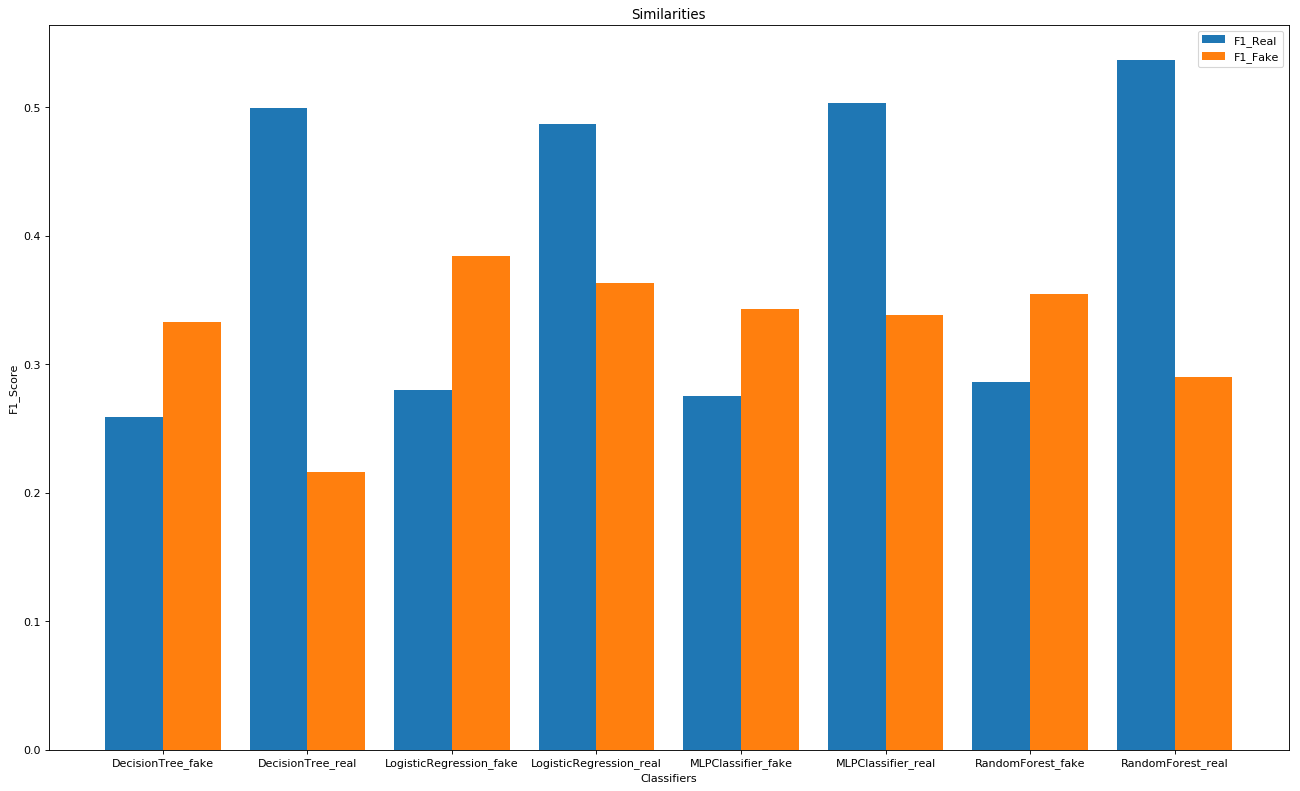

In [ ]:
from matplotlib.pyplot import figure
#import matplotlib.pyplot as plt
figure(figsize=(20, 12), dpi=80)
X_axis = np.arange(len(labels))
  
plt.bar(X_axis - 0.2, true, 0.4, label = 'F1_Real')
plt.bar(X_axis + 0.2, Fake, 0.4, label = 'F1_Fake')
  
plt.xticks(X_axis, labels)
plt.xlabel("Classifiers")
plt.ylabel("F1_Score")
plt.title("Similarities")
plt.legend()
plt.show()

In [ ]:
final_df = pd.concat([df_three_stores]) #,synthetic_data

In [ ]:
final_df['BusinessDate'] = pd.to_datetime(final_df['BusinessDate'])

In [ ]:
final_df=final_df.sort_values(by=['StoreID','BusinessDate'])

In [ ]:
inv_s1 = le1.inverse_transform(final_df[['Description']])
inv_s2 = le2.inverse_transform(final_df[['ItemType']])

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
final_df['Description'] = inv_s1
final_df['ItemType'] = inv_s2

In [ ]:
final_df.head()

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,18,Honey Raisin Bran Muffin,Core,2.0,1.0,0.0,7,1
1,2019-06-29,18,Pressed Juicery Spicy Greens w Ginger,Unassigned,6.0,0.0,8.0,0,0
2,2019-06-29,18,Vive Juice Shot,Unassigned,0.0,0.0,3.0,0,0
3,2019-06-29,18,Mixed Berries & Granola Yogurt Parfait,Unassigned,4.0,3.0,4.0,16,0
4,2019-06-29,18,Jalapeno Cheese Bagel,Core,9.0,6.0,0.0,15,0


In [ ]:
#final_df.to_csv('df_GANs.csv')

### (2) Features Selection

In [ ]:
one_hot = pd.get_dummies(final_df)
one_hot

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Muffin - Double Chocolate,Description_New York Cheesecake,Description_Plain Bagel,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned
0,2019-06-29,18,2.0,1.0,0.0,7,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-06-29,18,6.0,0.0,8.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2019-06-29,18,0.0,0.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2019-06-29,18,4.0,3.0,4.0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2019-06-29,18,9.0,6.0,0.0,15,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14490,2020-06-29,332,0.0,3.0,0.0,7,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
14491,2020-06-29,332,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14492,2020-06-29,332,0.0,15.0,5.0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14493,2020-06-29,332,0.0,2.0,1.0,13,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
#one_hot.index = one_hot['BusinessDate']

In [ ]:
#one_hot.drop('BusinessDate',axis=1)

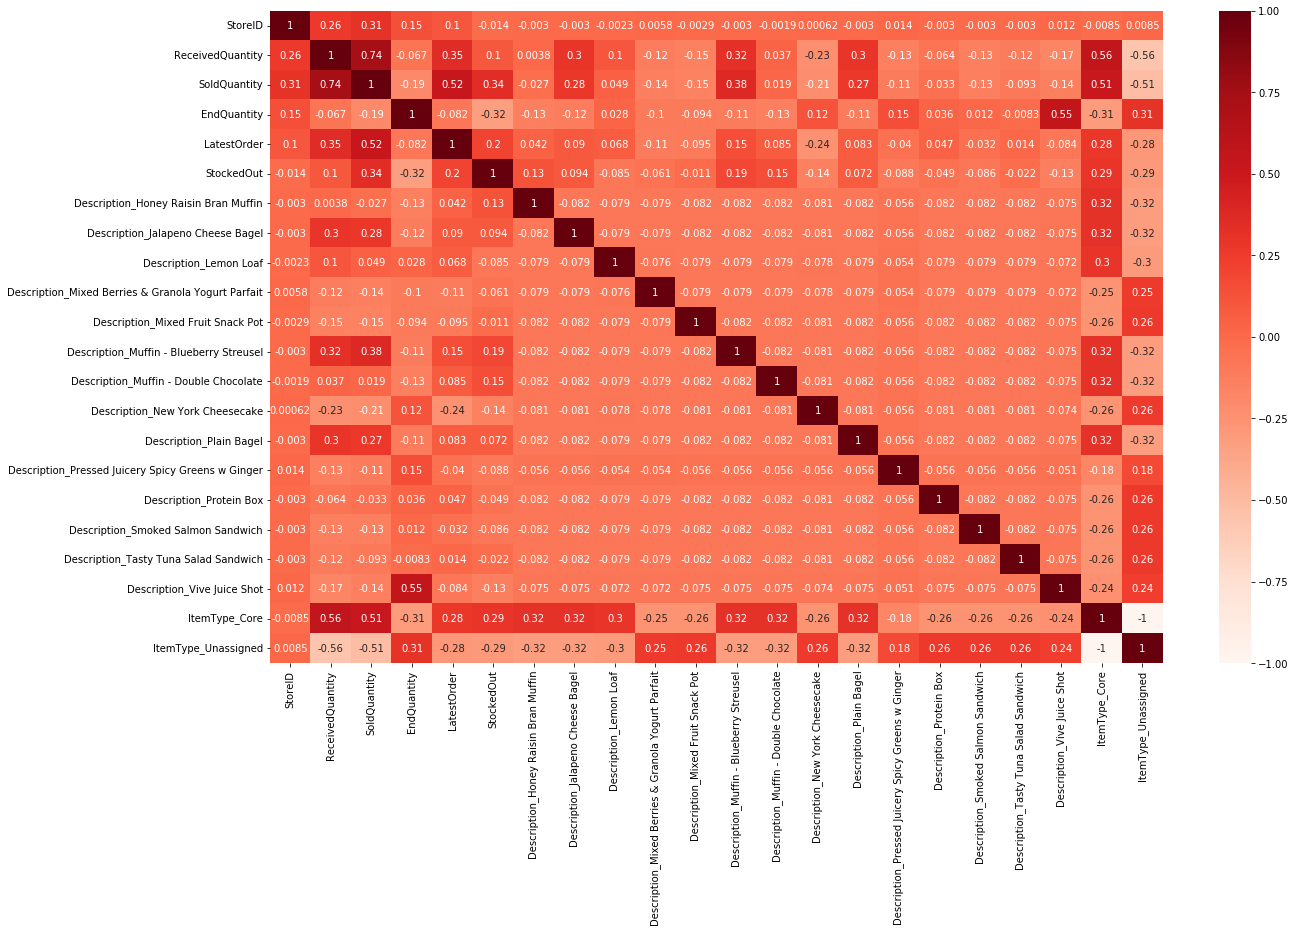

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
cor = one_hot.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["SoldQuantity"])
cor_target

StoreID                                              0.3090
ReceivedQuantity                                     0.7355
SoldQuantity                                         1.0000
EndQuantity                                          0.1907
LatestOrder                                          0.5233
StockedOut                                           0.3443
Description_Honey Raisin Bran Muffin                 0.0267
Description_Jalapeno Cheese Bagel                    0.2782
Description_Lemon Loaf                               0.0495
Description_Mixed Berries & Granola Yogurt Parfait   0.1382
Description_Mixed Fruit Snack Pot                    0.1527
Description_Muffin - Blueberry Streusel              0.3766
Description_Muffin - Double Chocolate                0.0192
Description_New York Cheesecake                      0.2149
Description_Plain Bagel                              0.2657
Description_Pressed Juicery Spicy Greens w Ginger    0.1119
Description_Protein Box                 

#### from the correlation matrix it can be seen that EndQuantity does not have much effect on the output. We will remove that column 

In [ ]:
one_hot.drop('EndQuantity',axis=1)

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,Description_Mixed Berries & Granola Yogurt Parfait,...,Description_Muffin - Double Chocolate,Description_New York Cheesecake,Description_Plain Bagel,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned
0,2019-06-29,18,2.0000,1.0000,7,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-06-29,18,6.0000,0.0000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2019-06-29,18,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2019-06-29,18,4.0000,3.0000,16,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2019-06-29,18,9.0000,6.0000,15,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14490,2020-06-29,332,0.0000,3.0000,7,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
14491,2020-06-29,332,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14492,2020-06-29,332,0.0000,15.0000,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14493,2020-06-29,332,0.0000,2.0000,13,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
one_hot['weekday'] = one_hot['BusinessDate'].dt.day_name()
one_hot.head(5)

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_New York Cheesecake,Description_Plain Bagel,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday
0,2019-06-29,18,2.0000,1.0000,0.0000,7,1,1,0,0,...,0,0,0,0,0,0,0,1,0,Saturday
1,2019-06-29,18,6.0000,0.0000,8.0000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Saturday
2,2019-06-29,18,0.0000,0.0000,3.0000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Saturday
3,2019-06-29,18,4.0000,3.0000,4.0000,16,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Saturday
4,2019-06-29,18,9.0000,6.0000,0.0000,15,0,0,1,0,...,0,0,0,0,0,0,0,1,0,Saturday


In [ ]:
#weather = pd.read_csv('USA.csv')
weather_18 = pd.read_csv('91101.csv')
weather_117 = pd.read_csv('91105.csv')
weather_332 = pd.read_csv('92122.csv')
weather_18.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,91101,2019-01-01,58.8000,41.2000,50.6000,58.8000,41.2000,48.9000,8.8000,18.8500,...,12.9000,6.0000,NaN,2019-01-01T06:58:29,2019-01-01T16:53:56,0.9100,Clear,Clear conditions throughout the day.,clear-day,"KHHR,HNGC1,KBUR,72295603167,72288023152"
1,91101,2019-01-02,60.2000,37.5000,48.8000,60.2000,35.0000,48.3000,17.6000,30.1400,...,12.7000,6.0000,NaN,2019-01-02T06:58:40,2019-01-02T16:54:42,0.9500,Clear,Clear conditions throughout the day.,clear-day,"KHHR,HNGC1,KBUR,72295603167,72288023152"
2,91101,2019-01-03,64.8000,39.9000,51.5000,64.8000,39.9000,51.4000,25.4000,38.9500,...,12.9000,6.0000,NaN,2019-01-03T06:58:49,2019-01-03T16:55:29,0.9700,Clear,Clear conditions throughout the day.,clear-day,"KHHR,HNGC1,KBUR,72295603167,72288023152"
3,91101,2019-01-04,64.4000,40.5000,51.9000,64.4000,39.4000,51.8000,31.0000,47.2300,...,13.1000,6.0000,NaN,2019-01-04T06:58:56,2019-01-04T16:56:16,0.9900,Clear,Clear conditions throughout the day.,clear-day,"KHHR,HNGC1,KBUR,72295603167,72288023152"
4,91101,2019-01-05,56.0000,46.2000,50.8000,56.0000,43.9000,50.5000,41.6000,71.3700,...,2.6000,2.0000,NaN,2019-01-05T06:59:02,2019-01-05T16:57:05,1.0000,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KHHR,HNGC1,KBUR,KCQT,72295603167,72288023152"


In [ ]:
weather_18['datetime'] = pd.to_datetime(weather_18['datetime'])
weather_117['datetime'] = pd.to_datetime(weather_117['datetime'])
weather_332['datetime'] = pd.to_datetime(weather_332['datetime'])
weather_18 = weather_18[['datetime','temp','icon']]
weather_117 = weather_117[['datetime','temp','icon']]
weather_332 = weather_332[['datetime','temp','icon']]
weather_18.head(5)

,datetime,temp,icon
0,2019-01-01,50.6000,clear-day
1,2019-01-02,48.8000,clear-day
2,2019-01-03,51.5000,clear-day
3,2019-01-04,51.9000,clear-day
4,2019-01-05,50.8000,rain


In [ ]:
weather_18 = weather_18.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather_18['StoreID'] = 18 
weather_117 = weather_117.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather_117['StoreID'] = 117
weather_332 = weather_332.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather_332['StoreID'] = 332
weather_18

,BusinessDate,temp,Condition,StoreID
0,2019-01-01,50.6000,clear-day,18
1,2019-01-02,48.8000,clear-day,18
2,2019-01-03,51.5000,clear-day,18
3,2019-01-04,51.9000,clear-day,18
4,2019-01-05,50.8000,rain,18
...,...,...,...,...
726,2020-12-27,56.4000,partly-cloudy-day,18
727,2020-12-28,48.4000,rain,18
728,2020-12-29,51.4000,clear-day,18
729,2020-12-30,53.6000,clear-day,18


In [ ]:
one_hot_18 = one_hot[one_hot['StoreID']==18]
one_hot_117 = one_hot[one_hot['StoreID']==117]
one_hot_332 = one_hot[one_hot['StoreID']==332]

one_hot_18 = pd.merge(one_hot_18,weather_18, left_on=['BusinessDate','StoreID'], right_on = ['BusinessDate','StoreID'],how='left')
one_hot_117 = pd.merge(one_hot_117,weather_117, left_on=['BusinessDate','StoreID'], right_on = ['BusinessDate','StoreID'],how='left')
one_hot_332 = pd.merge(one_hot_332,weather_332, left_on=['BusinessDate','StoreID'], right_on = ['BusinessDate','StoreID'],how='left')

one_hot = pd.concat([one_hot_18,one_hot_117,one_hot_332])

In [ ]:
one_hot

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday,temp,Condition
0,2019-06-29,18,2.0000,1.0000,0.0000,7,1,1,0,0,...,0,0,0,0,0,1,0,Saturday,71.3000,clear-day
1,2019-06-29,18,6.0000,0.0000,8.0000,0,0,0,0,0,...,1,0,0,0,0,0,1,Saturday,71.3000,clear-day
2,2019-06-29,18,0.0000,0.0000,3.0000,0,0,0,0,0,...,0,0,0,0,1,0,1,Saturday,71.3000,clear-day
3,2019-06-29,18,4.0000,3.0000,4.0000,16,0,0,0,0,...,0,0,0,0,0,0,1,Saturday,71.3000,clear-day
4,2019-06-29,18,9.0000,6.0000,0.0000,15,0,0,1,0,...,0,0,0,0,0,1,0,Saturday,71.3000,clear-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,2020-06-29,332,0.0000,3.0000,0.0000,7,1,0,0,0,...,0,1,0,0,0,0,1,Monday,64.6000,rain
4902,2020-06-29,332,0.0000,0.0000,0.0000,0,0,0,0,0,...,0,0,0,0,0,0,1,Monday,64.6000,rain
4903,2020-06-29,332,0.0000,15.0000,5.0000,14,0,0,0,0,...,0,0,0,0,0,1,0,Monday,64.6000,rain
4904,2020-06-29,332,0.0000,2.0000,1.0000,13,0,0,0,0,...,0,0,0,0,0,1,0,Monday,64.6000,rain


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=one_hot['BusinessDate'].min(), end=one_hot['BusinessDate'].max())

one_hot['Holiday'] = one_hot['BusinessDate'].isin(holidays)
one_hot

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday,temp,Condition,Holiday
0,2019-06-29,18,2.0000,1.0000,0.0000,7,1,1,0,0,...,0,0,0,0,1,0,Saturday,71.3000,clear-day,False
1,2019-06-29,18,6.0000,0.0000,8.0000,0,0,0,0,0,...,0,0,0,0,0,1,Saturday,71.3000,clear-day,False
2,2019-06-29,18,0.0000,0.0000,3.0000,0,0,0,0,0,...,0,0,0,1,0,1,Saturday,71.3000,clear-day,False
3,2019-06-29,18,4.0000,3.0000,4.0000,16,0,0,0,0,...,0,0,0,0,0,1,Saturday,71.3000,clear-day,False
4,2019-06-29,18,9.0000,6.0000,0.0000,15,0,0,1,0,...,0,0,0,0,1,0,Saturday,71.3000,clear-day,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,2020-06-29,332,0.0000,3.0000,0.0000,7,1,0,0,0,...,1,0,0,0,0,1,Monday,64.6000,rain,False
4902,2020-06-29,332,0.0000,0.0000,0.0000,0,0,0,0,0,...,0,0,0,0,0,1,Monday,64.6000,rain,False
4903,2020-06-29,332,0.0000,15.0000,5.0000,14,0,0,0,0,...,0,0,0,0,1,0,Monday,64.6000,rain,False
4904,2020-06-29,332,0.0000,2.0000,1.0000,13,0,0,0,0,...,0,0,0,0,1,0,Monday,64.6000,rain,False


In [ ]:
one_hot['Holiday'] = one_hot['Holiday'].astype(int)

In [ ]:
one_hot.head()

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday,temp,Condition,Holiday
0,2019-06-29,18,2.0000,1.0000,0.0000,7,1,1,0,0,...,0,0,0,0,1,0,Saturday,71.3000,clear-day,0
1,2019-06-29,18,6.0000,0.0000,8.0000,0,0,0,0,0,...,0,0,0,0,0,1,Saturday,71.3000,clear-day,0
2,2019-06-29,18,0.0000,0.0000,3.0000,0,0,0,0,0,...,0,0,0,1,0,1,Saturday,71.3000,clear-day,0
3,2019-06-29,18,4.0000,3.0000,4.0000,16,0,0,0,0,...,0,0,0,0,0,1,Saturday,71.3000,clear-day,0
4,2019-06-29,18,9.0000,6.0000,0.0000,15,0,0,1,0,...,0,0,0,0,1,0,Saturday,71.3000,clear-day,0


In [ ]:
one_hot = pd.get_dummies(one_hot)
one_hot.head()

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
0,2019-06-29,18,2.0000,1.0000,0.0000,7,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2019-06-29,18,6.0000,0.0000,8.0000,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2019-06-29,18,0.0000,0.0000,3.0000,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,2019-06-29,18,4.0000,3.0000,4.0000,16,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2019-06-29,18,9.0000,6.0000,0.0000,15,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
one_hot.columns

Index(['BusinessDate', 'StoreID', 'ReceivedQuantity', 'SoldQuantity',
       'EndQuantity', 'LatestOrder', 'StockedOut',
       'Description_Honey Raisin Bran Muffin',
       'Description_Jalapeno Cheese Bagel', 'Description_Lemon Loaf',
       'Description_Mixed Berries & Granola Yogurt Parfait',
       'Description_Mixed Fruit Snack Pot',
       'Description_Muffin - Blueberry Streusel',
       'Description_Muffin - Double Chocolate',
       'Description_New York Cheesecake', 'Description_Plain Bagel',
       'Description_Pressed Juicery Spicy Greens w Ginger',
       'Description_Protein Box', 'Description_Smoked Salmon Sandwich',
       'Description_Tasty Tuna Salad Sandwich', 'Description_Vive Juice Shot',
       'ItemType_Core', 'ItemType_Unassigned', 'temp', 'Holiday',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Conditi

In [ ]:
one_hot.set_index('BusinessDate', inplace=True)

In [ ]:
one_hot.columns

Index(['StoreID', 'ReceivedQuantity', 'SoldQuantity', 'EndQuantity',
       'LatestOrder', 'StockedOut', 'Description_Honey Raisin Bran Muffin',
       'Description_Jalapeno Cheese Bagel', 'Description_Lemon Loaf',
       'Description_Mixed Berries & Granola Yogurt Parfait',
       'Description_Mixed Fruit Snack Pot',
       'Description_Muffin - Blueberry Streusel',
       'Description_Muffin - Double Chocolate',
       'Description_New York Cheesecake', 'Description_Plain Bagel',
       'Description_Pressed Juicery Spicy Greens w Ginger',
       'Description_Protein Box', 'Description_Smoked Salmon Sandwich',
       'Description_Tasty Tuna Salad Sandwich', 'Description_Vive Juice Shot',
       'ItemType_Core', 'ItemType_Unassigned', 'temp', 'Holiday',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 

In [ ]:
#one_hot.to_csv('one_hot.csv')

## (3) Linear Regression

In [ ]:
X = one_hot.drop(['SoldQuantity'],axis=1)
Y = one_hot['SoldQuantity']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
#stats model
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train = x_train.values
y_train = y_train.values.reshape(len(y_train),1)

x_test = x_test.values
y_test = y_test.values.reshape(len(y_test),1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)

In [ ]:
model = LinearRegression()  # initialize the LinearRegression model
model.fit(x_train,y_train)  # we fit the model with the training data

linear_pred = model.predict(x_test)  # make prediction with the fitted model
#make graphs with all the features

# score the model on the train set
print('Train score: {}\n'.format(model.score(x_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(x_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Train score: 0.7393565014558312

Test score: 0.7301280936412278

Overall model accuracy: 0.7301280936412278

Mean Squared Error: 0.020738669541214807


In [ ]:
y_pred = scaler1.inverse_transform(linear_pred[0:8]).reshape(1,8)[0]
y_true = scaler1.inverse_transform(y_test[0:8]).reshape(1,8)[0]

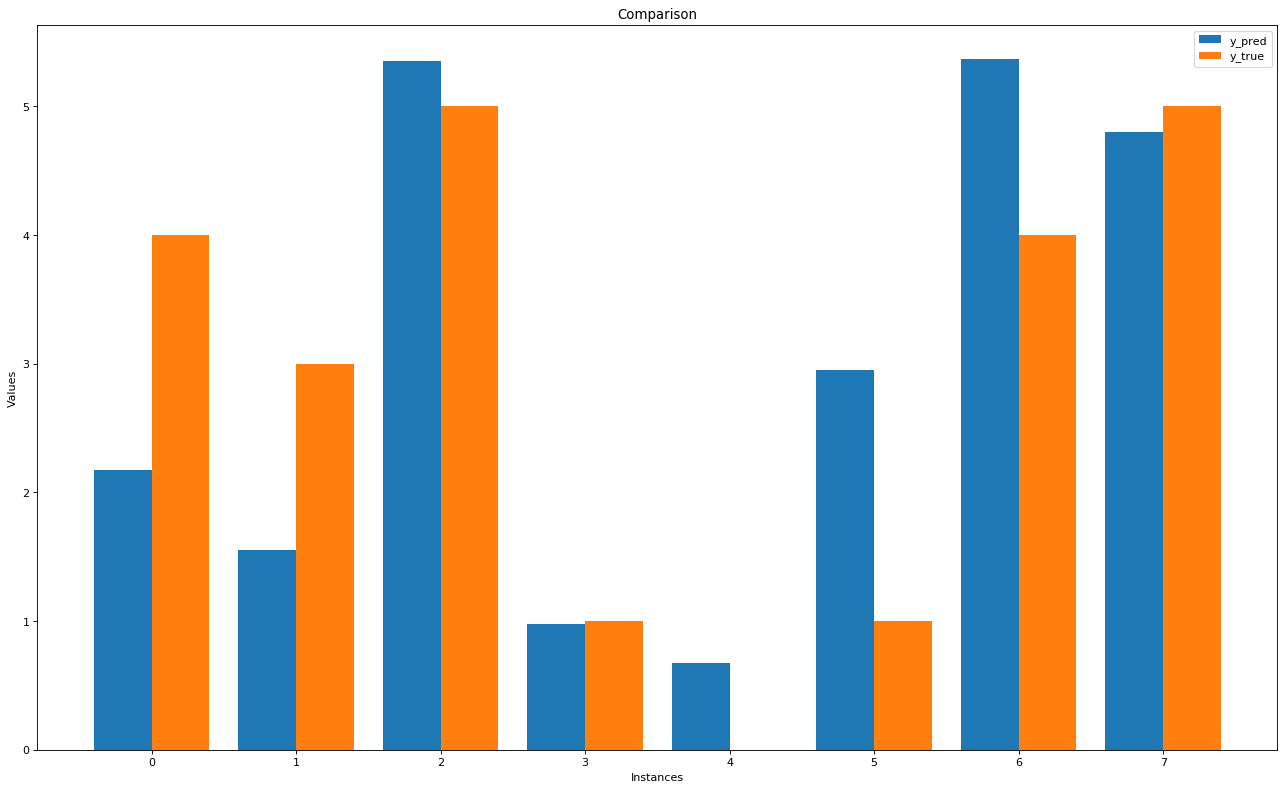

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 12), dpi=80)
X_axis = np.arange(len(y_true))
  
plt.bar(X_axis - 0.2, y_pred, 0.4, label = 'y_pred')
plt.bar(X_axis + 0.2, y_true, 0.4, label = 'y_true')

plt.xlabel("Instances")
plt.ylabel("Values")
plt.title("Comparison")
plt.legend()
plt.show()

## (4) Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error
model_1 = RandomForestRegressor(n_estimators = 100,max_depth=14, oob_score = True, n_jobs = -1,random_state =1, max_features = "auto", min_samples_leaf = 30)
# fit the model on the whole dataset
model_1.fit(x_train, y_train)
# make a single prediction
y_pred_RF = model_1.predict(x_test)
y_pred_RF = y_pred_RF.reshape(len(y_pred_RF),1)


"""
1.b. n_estimators :
This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
Higher number of trees give you better performance but makes your code slower. You should choose as high 
value as your processor can handle because this makes your predictions stronger and more stable.

2.c. oob_score :
This is a random forest cross validation method. It is very similar to leave one out validation technique, 
however, this is so much faster. This method simply tags every observation used in different tress. And 
then it finds out a maximum vote score for every observation based on only trees which did not use this 
particular observation to train itself.

2.b. random_state :
This parameter makes a solution easy to replicate. A definite value of random_state will always produce
same results if given with same parameters and training data. I have personally found an ensemble with 
multiple models of different random states and all optimum parameters sometime performs better than individual
random state.

2.a. n_jobs :
This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is 
no restriction whereas a value of “1” means it can only use one processor.

1.c. min_sample_leaf :
If you have built a decision tree before, you can appreciate the importance of minimum sample leaf size. 
Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in 
train data. Generally I prefer a minimum leaf size of more than 50. However, you should try multiple leaf 
sizes to find the most optimum for your use case.

"""
model_1.score(x_test, y_test)

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8179582643999457

In [ ]:
model_2 = GradientBoostingRegressor(criterion='mse',n_estimators = 50,subsample=0.8,learning_rate=0.1,max_depth=10,random_state =1, max_features = "auto", min_samples_leaf = 40)
# fit the model on the whole dataset
model_2.fit(x_train, y_train)
# make a single prediction
y_pred_GBM = model_2.predict(x_test)
y_pred_GBM = y_pred_GBM.reshape(len(y_pred_GBM),1)
model_2.score(x_test, y_test)

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.840670268273745

In [ ]:
#!pip install lightgbm 

In [ ]:
from lightgbm import LGBMRegressor
model_3 = LGBMRegressor(boosting_type ='goss',max_depth =9,n_estimators=45,learning_rate =0.1,random_state =1,num_leaves=70)
model_3.fit(x_train, y_train)
# make a single prediction
y_pred_LGBM = model_3.predict(x_test)
y_pred_LGBM = y_pred_GBM.reshape(len(y_pred_LGBM),1)
model_3.score(x_test, y_test)

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\dask\config.py:129: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

0.8417496992237149

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=250, max_depth=7, gamma = 0, learning_rate =0.03,booster='gbtree')
model_4.fit(x_train, y_train)
# make a single prediction
y_pred_XGB = model_4.predict(x_test)
y_pred_XGB = y_pred_XGB.reshape(len(y_pred_XGB),1)
model_4.score(x_test, y_test)

0.8374784276728915

In [ ]:
x_train_1 = x_train.reshape(x_train.shape[0], 1,x_train.shape[1])
x_test_1 = x_test.reshape(x_test.shape[0],1, x_test.shape[1])
y_train_1 = scaler1.inverse_transform(y_train).reshape(len(y_train),1)
y_test_1 = scaler1.inverse_transform(y_test).reshape(len(y_test),1)
print(x_train_1.shape)
print(x_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(11596, 1, 34)
(2899, 1, 34)
(11596, 1)
(2899, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout,BatchNormalization,Bidirectional
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
model=Sequential()
model.add(LSTM(110,return_sequences=False,input_shape=(1,34)))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
#model.add(LSTM(5,return_sequences=False))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(LSTM(70,return_sequences=False))
#model.add(Dropout(0.2))
#model.add(Dense(15))
model.add(Dense(1))
model.compile(loss='mse',optimizer=Adam(lr=0.01),metrics=['accuracy'])  #30,0.01

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train_1,y_train_1, batch_size=20,validation_data=(x_test_1, y_test_1),epochs=100,verbose=1)

Epoch 1/100
580/580 [==============================] - 6s 3ms/step - loss: 2.4133 - accuracy: 0.3946 - val_loss: 2.0170 - val_accuracy: 0.4484
Epoch 2/100
580/580 [==============================] - 2s 3ms/step - loss: 1.9580 - accuracy: 0.4163 - val_loss: 1.8837 - val_accuracy: 0.4370
Epoch 3/100
580/580 [==============================] - 1s 2ms/step - loss: 1.9465 - accuracy: 0.4071 - val_loss: 1.7619 - val_accuracy: 0.4484
Epoch 4/100
580/580 [==============================] - 1s 2ms/step - loss: 1.8928 - accuracy: 0.4008 - val_loss: 1.7414 - val_accuracy: 0.4498
Epoch 5/100
580/580 [==============================] - 1s 2ms/step - loss: 1.8806 - accuracy: 0.3924 - val_loss: 1.9969 - val_accuracy: 0.4343
Epoch 6/100
580/580 [==============================] - 1s 2ms/step - loss: 1.8147 - accuracy: 0.3994 - val_loss: 1.5958 - val_accuracy: 0.4512
Epoch 7/100
580/580 [==============================] - 1s 2ms/step - loss: 1.8098 - accuracy: 0.3932 - val_loss: 1.6158 - val_accuracy: 0.4484

Epoch 58/100
580/580 [==============================] - 1s 2ms/step - loss: 1.5934 - accuracy: 0.3918 - val_loss: 1.4057 - val_accuracy: 0.4526
Epoch 59/100
580/580 [==============================] - 1s 3ms/step - loss: 1.5917 - accuracy: 0.3874 - val_loss: 1.5047 - val_accuracy: 0.4505
Epoch 60/100
580/580 [==============================] - 2s 3ms/step - loss: 1.5589 - accuracy: 0.3888 - val_loss: 1.4518 - val_accuracy: 0.4536
Epoch 61/100
580/580 [==============================] - 2s 3ms/step - loss: 1.5520 - accuracy: 0.3938 - val_loss: 1.3909 - val_accuracy: 0.4519
Epoch 62/100
580/580 [==============================] - 1s 2ms/step - loss: 1.5330 - accuracy: 0.3906 - val_loss: 1.4122 - val_accuracy: 0.4550
Epoch 63/100
580/580 [==============================] - 2s 3ms/step - loss: 1.5869 - accuracy: 0.3928 - val_loss: 1.4340 - val_accuracy: 0.4564
Epoch 64/100
580/580 [==============================] - 1s 3ms/step - loss: 1.5730 - accuracy: 0.3895 - val_loss: 1.4523 - val_accuracy:

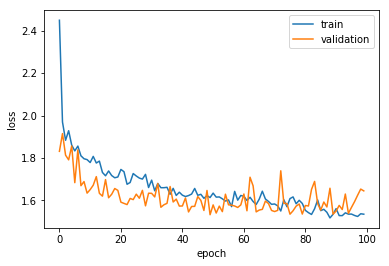

Final Validation MSE = 1.645007610321045


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
val_mse = history.history['val_loss'][-1]
print('Final Validation MSE =', val_mse)

In [ ]:
#model.save("LSTM_Sales.hdf5")

In [ ]:
test_predict=model.predict(x_test_1)
test_predict=test_predict.reshape(len(test_predict),1)
test_predict=scaler1.inverse_transform(test_predict)
test_predict

array([[ 12.338126],
       [ 62.38102 ],
       [ 29.789059],
       ...,
       [143.5044  ],
       [ 36.85498 ],
       [105.875114]], dtype=float32)

### (7) Future Prediction

In [ ]:
one_hot.columns

Index(['StoreID', 'ReceivedQuantity', 'SoldQuantity', 'EndQuantity',
       'LatestOrder', 'StockedOut', 'Description_Honey Raisin Bran Muffin',
       'Description_Jalapeno Cheese Bagel', 'Description_Lemon Loaf',
       'Description_Mixed Berries & Granola Yogurt Parfait',
       'Description_Mixed Fruit Snack Pot',
       'Description_Muffin - Blueberry Streusel',
       'Description_Muffin - Double Chocolate',
       'Description_New York Cheesecake', 'Description_Plain Bagel',
       'Description_Pressed Juicery Spicy Greens w Ginger',
       'Description_Protein Box', 'Description_Smoked Salmon Sandwich',
       'Description_Tasty Tuna Salad Sandwich', 'Description_Vive Juice Shot',
       'ItemType_Core', 'ItemType_Unassigned', 'temp', 'Holiday',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 

In [ ]:
#one_hot_18 = one_hot[one_hot["StoreID"]==18]
one_hot_18 = one_hot[one_hot["StoreID"]==18][['SoldQuantity','Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain']].groupby(by='BusinessDate').sum()
one_hot_18.loc[(one_hot_18['Condition_clear-day'] > 1) , 'Condition_clear-day'] = 1
one_hot_18.loc[(one_hot_18['Condition_cloudy'] > 1) , 'Condition_cloudy'] = 1
one_hot_18.loc[(one_hot_18['Condition_partly-cloudy-day'] > 1) , 'Condition_partly-cloudy-day'] = 1
one_hot_18.loc[(one_hot_18['Condition_rain'] > 1) , 'Condition_rain'] = 1
one_hot_18

,SoldQuantity,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
BusinessDate,,,,,
2019-06-29,42.0000,1,0,0,0
2019-06-30,39.0000,1,0,0,0
2019-07-01,35.0000,1,0,0,0
2019-07-02,35.0000,1,0,0,0
2019-07-03,30.0000,0,0,1,0
...,...,...,...,...,...
2020-06-25,23.0000,0,0,1,0
2020-06-26,20.0000,0,0,1,0
2020-06-27,20.0000,0,0,1,0


In [ ]:
training_size= int(0.80*len(one_hot_18))
test_size=len(one_hot_18)-training_size
train_data,test_data=one_hot_18[0:training_size],one_hot_18[training_size:len(one_hot_18)]
print(train_data.shape)
print(test_data.shape)

(293, 5)
(74, 5)


In [ ]:
x_train = train_data
x_test = test_data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler1 = MinMaxScaler(feature_range=(0, 1))
x_train_1 = scaler.fit_transform(x_train)[0:-1,:]
y_train_1 = train_data.values[1:,0]
x_test_1 = scaler.transform(x_test)[0:-1,:]
y_test_1 = test_data.values[1:,0]

x_train_3 = scaler.fit_transform(x_train)[0:-3,:]
y_train_3 = train_data.values[3:,0]
x_test_3 = scaler.transform(x_test)[0:-3,:]
y_test_3 = test_data.values[3:,0]

x_train_10 = scaler.fit_transform(x_train)[0:-10,:]
y_train_10 = train_data.values[10:,0]
x_test_10 = scaler.transform(x_test)[0:-10,:]
y_test_10 = test_data.values[10:,0]


In [ ]:
#model_pre1 = LGBMRegressor(boosting_type ='goss',max_depth =9,n_estimators=60,learning_rate =0.01,random_state =1,num_leaves=70)
#model_pre1=RandomForestRegressor(n_estimators = 30,max_depth=10, oob_score = True, n_jobs = -1,random_state =1, max_features = "auto", min_samples_leaf = 1)
model_pre1 = GradientBoostingRegressor(criterion='mse',n_estimators = 30,subsample=0.8,learning_rate=0.2,max_depth=15,random_state =1, max_features = "auto", min_samples_leaf = 1)
model_pre3 = GradientBoostingRegressor(criterion='mse',n_estimators = 30,subsample=0.8,learning_rate=0.2,max_depth=15,random_state =1, max_features = "auto", min_samples_leaf = 1)
model_pre10 = GradientBoostingRegressor(criterion='mse',n_estimators = 30,subsample=0.8,learning_rate=0.2,max_depth=15,random_state =1, max_features = "auto", min_samples_leaf = 1)

model_pre1.fit(x_train_1, y_train_1)
model_pre3.fit(x_train_3, y_train_3)
model_pre10.fit(x_train_10, y_train_10)
y_pred_1 = model_pre1.predict(x_train_1)
y_pred_3 = model_pre3.predict(x_train_3)
y_pred_10 = model_pre10.predict(x_train_10)
print(model_pre1.score(x_train_1, y_train_1))
print(model_pre3.score(x_train_3, y_train_3))
print(model_pre10.score(x_train_10, y_train_10))

0.5858974782452504
0.5543535469441832
0.44942916961888046


In [ ]:
#one_hot_18 = one_hot[one_hot["StoreID"]==18]
one_hot_117 = one_hot[one_hot["StoreID"]==117][['SoldQuantity','Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain']].groupby(by='BusinessDate').sum()
one_hot_117.loc[(one_hot_117['Condition_clear-day'] > 1) , 'Condition_clear-day'] = 1
one_hot_117.loc[(one_hot_117['Condition_cloudy'] > 1) , 'Condition_cloudy'] = 1
one_hot_117.loc[(one_hot_117['Condition_partly-cloudy-day'] > 1) , 'Condition_partly-cloudy-day'] = 1
one_hot_117.loc[(one_hot_117['Condition_rain'] > 1) , 'Condition_rain'] = 1
one_hot_117

,SoldQuantity,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
BusinessDate,,,,,
2019-06-29,32.0000,1,0,0,0
2019-06-30,15.0000,1,0,0,0
2019-07-01,24.0000,1,0,0,0
2019-07-02,18.0000,1,0,0,0
2019-07-03,29.0000,0,0,1,0
...,...,...,...,...,...
2020-06-25,13.0000,0,0,1,0
2020-06-26,34.0000,0,0,1,0
2020-06-27,18.0000,0,0,1,0


In [ ]:
training_size= int(0.80*len(one_hot_117))
test_size=len(one_hot_117)-training_size
train_data,test_data=one_hot_117[0:training_size],one_hot_117[training_size:len(one_hot_117)]
print(train_data.shape)
print(test_data.shape)

(293, 5)
(74, 5)


In [ ]:
x_train = train_data
x_test = test_data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler1 = MinMaxScaler(feature_range=(0, 1))
x_train_1 = scaler.fit_transform(x_train)[0:-1,:]
y_train_1 = train_data.values[1:,0]
x_test_1 = scaler.transform(x_test)[0:-1,:]
y_test_1 = test_data.values[1:,0]

x_train_3 = scaler.fit_transform(x_train)[0:-3,:]
y_train_3 = train_data.values[3:,0]
x_test_3 = scaler.transform(x_test)[0:-3,:]
y_test_3 = test_data.values[3:,0]

x_train_10 = scaler.fit_transform(x_train)[0:-10,:]
y_train_10 = train_data.values[10:,0]
x_test_10 = scaler.transform(x_test)[0:-10,:]
y_test_10 = test_data.values[10:,0]


In [ ]:
#model_pre1 = LGBMRegressor(boosting_type ='goss',max_depth =9,n_estimators=60,learning_rate =0.01,random_state =1,num_leaves=70)
#model_pre1=RandomForestRegressor(n_estimators = 30,max_depth=10, oob_score = True, n_jobs = -1,random_state =1, max_features = "auto", min_samples_leaf = 1)
model_pre1 = GradientBoostingRegressor(criterion='mse',n_estimators = 15,subsample=0.8,learning_rate=0.5,max_depth=15,random_state =1, max_features = "auto", min_samples_leaf = 2)
model_pre3 = GradientBoostingRegressor(criterion='mse',n_estimators = 15,subsample=0.8,learning_rate=0.5,max_depth=15,random_state =1, max_features = "auto", min_samples_leaf = 2)
model_pre10 = GradientBoostingRegressor(criterion='mse',n_estimators = 15,subsample=0.8,learning_rate=0.5,max_depth=15,random_state =1, max_features = "auto", min_samples_leaf = 2)

model_pre1.fit(x_train_1, y_train_1)
model_pre3.fit(x_train_3, y_train_3)
model_pre10.fit(x_train_10, y_train_10)
y_pred_1 = model_pre1.predict(x_train_1)
y_pred_3 = model_pre3.predict(x_train_3)
y_pred_10 = model_pre10.predict(x_train_10)
print(model_pre1.score(x_train_1, y_train_1))
print(model_pre3.score(x_train_3, y_train_3))
print(model_pre10.score(x_train_10, y_train_10))


0.3958423733041022
0.25833641530310825
0.32299695382251115


In [ ]:
#one_hot_18 = one_hot[one_hot["StoreID"]==18]
one_hot_332 = one_hot[one_hot["StoreID"]==332][['SoldQuantity','Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain']].groupby(by='BusinessDate').sum()
one_hot_332.loc[(one_hot_332['Condition_clear-day'] > 1) , 'Condition_clear-day'] = 1
one_hot_332.loc[(one_hot_332['Condition_cloudy'] > 1) , 'Condition_cloudy'] = 1
one_hot_332.loc[(one_hot_332['Condition_partly-cloudy-day'] > 1) , 'Condition_partly-cloudy-day'] = 1
one_hot_332.loc[(one_hot_332['Condition_rain'] > 1) , 'Condition_rain'] = 1
one_hot_332

,SoldQuantity,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
BusinessDate,,,,,
2019-06-29,47.0000,1,0,0,0
2019-06-30,41.0000,1,0,0,0
2019-07-01,67.0000,0,0,1,0
2019-07-02,50.0000,0,0,1,0
2019-07-03,63.0000,0,0,1,0
...,...,...,...,...,...
2020-06-25,40.0000,0,0,1,0
2020-06-26,44.0000,0,0,1,0
2020-06-27,43.0000,0,0,1,0


In [ ]:
training_size= int(0.80*len(one_hot_332))
test_size=len(one_hot_332)-training_size
train_data,test_data=one_hot_332[0:training_size],one_hot_332[training_size:len(one_hot_332)]
print(train_data.shape)
print(test_data.shape)

(293, 5)
(74, 5)


In [ ]:
x_train = train_data
x_test = test_data
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler1 = MinMaxScaler(feature_range=(0, 1))
x_train_1 = scaler.fit_transform(x_train)[0:-1,:]
y_train_1 = train_data.values[1:,0]
x_test_1 = scaler.transform(x_test)[0:-1,:]
y_test_1 = test_data.values[1:,0]

x_train_3 = scaler.fit_transform(x_train)[0:-3,:]
y_train_3 = train_data.values[3:,0]
x_test_3 = scaler.transform(x_test)[0:-3,:]
y_test_3 = test_data.values[3:,0]

x_train_10 = scaler.fit_transform(x_train)[0:-10,:]
y_train_10 = train_data.values[10:,0]
x_test_10 = scaler.transform(x_test)[0:-10,:]
y_test_10 = test_data.values[10:,0]


In [ ]:

model_pre1 = GradientBoostingRegressor(criterion='mse',n_estimators = 30,subsample=0.8,learning_rate=0.2,max_depth=15,random_state =1, max_features = "auto", min_samples_leaf = 1)
model_pre3 = GradientBoostingRegressor(criterion='mse',n_estimators = 30,subsample=0.8,learning_rate=0.2,max_depth=15,random_state =1, max_features = "auto", min_samples_leaf = 1)
model_pre10 = GradientBoostingRegressor(criterion='mse',n_estimators = 30,subsample=0.8,learning_rate=0.2,max_depth=15,random_state =1, max_features = "auto", min_samples_leaf = 1)

model_pre1.fit(x_train_1, y_train_1)
model_pre3.fit(x_train_3, y_train_3)
model_pre10.fit(x_train_10, y_train_10)
y_pred_1 = model_pre1.predict(x_train_1)
y_pred_3 = model_pre3.predict(x_train_3)
y_pred_10 = model_pre10.predict(x_train_10)
print(model_pre1.score(x_train_1, y_train_1))
print(model_pre3.score(x_train_3, y_train_3))
print(model_pre10.score(x_train_10, y_train_10))

0.5589071937677178
0.5096223075382597
0.5039463089777156


In [ ]:
labels = ['Store_18', 'Store_117','Store_332']
Model_1 = [0.5858, 0.3958, 0.5589]
Model_3 = [0.5543, 0.2583, 0.5096]
Model_10 = [0.4494, 0.3229, 0.5039]

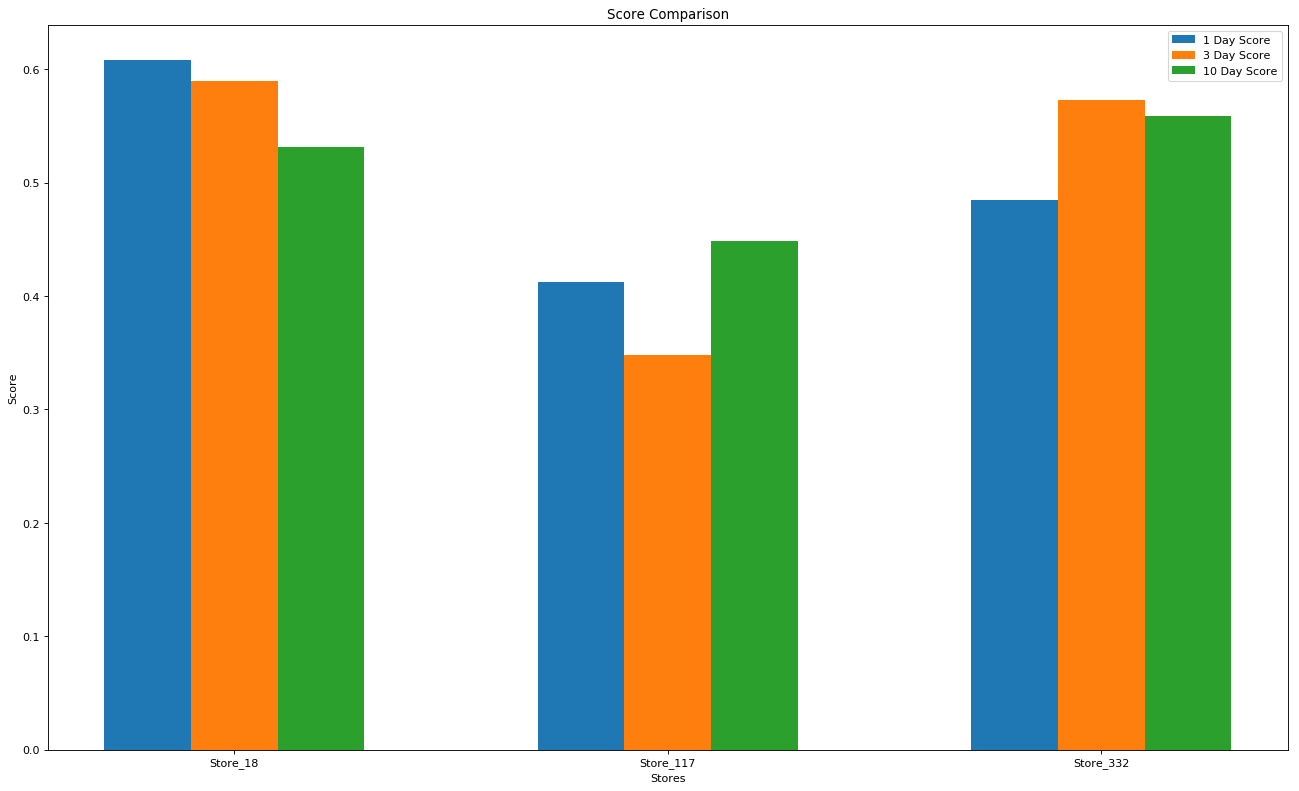

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 12), dpi=80)
X_axis = np.arange(len(Model_1))
  
plt.bar(X_axis - 0.2, Model_1, 0.2, label = '1 Day Score')
plt.bar(X_axis + 0, Model_3, 0.2, label = '3 Day Score')
plt.bar(X_axis + 0.2, Model_10, 0.2, label = '10 Day Score')

plt.xticks(X_axis, labels)
plt.xlabel("Stores")
plt.ylabel("Score")
plt.title("Score Comparison")
plt.legend()
plt.show()

In [ ]:
#one_hot_18 = one_hot[one_hot["StoreID"]==18]
one_hot_weekday = one_hot[['SoldQuantity','weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday','weekday_Wednesday']].groupby(by='BusinessDate').sum()
one_hot_weekday.loc[(one_hot_weekday['weekday_Friday'] > 1) , 'weekday_Friday'] = 1
one_hot_weekday.loc[(one_hot_weekday['weekday_Monday'] > 1) , 'weekday_Monday'] = 1
one_hot_weekday.loc[(one_hot_weekday['weekday_Saturday'] > 1) , 'weekday_Saturday'] = 1
one_hot_weekday.loc[(one_hot_weekday['weekday_Sunday'] > 1) , 'weekday_Sunday'] = 1
one_hot_weekday.loc[(one_hot_weekday['weekday_Thursday'] > 1) , 'weekday_Thursday'] = 1
one_hot_weekday.loc[(one_hot_weekday['weekday_Tuesday'] > 1) , 'weekday_Tuesday'] = 1
one_hot_weekday.loc[(one_hot_weekday['weekday_Wednesday'] > 1) , 'weekday_Wednesday'] = 1
one_hot_weekday

,SoldQuantity,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
BusinessDate,,,,,,,,
2019-06-29,121.0000,0,0,1,0,0,0,0
2019-06-30,95.0000,0,0,0,1,0,0,0
2019-07-01,126.0000,0,1,0,0,0,0,0
2019-07-02,103.0000,0,0,0,0,0,1,0
2019-07-03,122.0000,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2020-06-25,76.0000,0,0,0,0,1,0,0
2020-06-26,98.0000,1,0,0,0,0,0,0
2020-06-27,81.0000,0,0,1,0,0,0,0


In [ ]:
X = one_hot_weekday.drop(['SoldQuantity'],axis=1)
Y = one_hot_weekday['SoldQuantity']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train = x_train.values
y_train = y_train.values.reshape(len(y_train),1)

x_test = x_test.values
y_test = y_test.values.reshape(len(y_test),1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))

y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)

In [ ]:
model_weekday = RandomForestRegressor(n_estimators = 50,max_depth=7, oob_score = True, n_jobs = -1,random_state =1, max_features = "auto", min_samples_leaf = 10)
# fit the model on the whole dataset
model_weekday.fit(x_train, y_train)
# make a single prediction
y_pred_RF = model_weekday.predict(x_test)
y_pred_RF = y_pred_RF.reshape(len(y_pred_RF),1)
model_weekday.score(x_train, y_train)

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.10074139875857513

### Model Testing on other stores

In [ ]:
df_ten_stores = df[(df["StoreID"]==2) | (df["StoreID"]==6) | (df["StoreID"]==10) | (df["StoreID"]==18) | (df["StoreID"]==20) | (df["StoreID"]==21) | (df["StoreID"]==22) | (df["StoreID"]==34) | (df["StoreID"]==36) | (df["StoreID"]==40)]
df_ten_stores

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0000,2.0000,0.0000,10,0,2.0000,0.0000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0000,1.0000,9.0000,13,0,2.0000,0.0000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0000,0.0000,27.0000,0,0,2.0000,0.0000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0000,3.0000,0.0000,11,1,2.0000,0.5790
6,2,2019-06-29,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,6.0000,6.0000,0.0000,13,1,2.0000,0.6098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138569,40,2020-06-29,3000162,Protein Box,Unassigned,Food,Cold Case,Ready to Eat,0.0000,1.0000,4.0000,14,0,3.0000,0.0000
138570,40,2020-06-29,3000181,Mixed Fruit Snack Pot,Unassigned,Food,Cold Case,Ready to Eat,0.0000,2.0000,0.0000,15,0,3.0000,0.0000
138573,40,2020-06-29,3000211,Muffin - Blueberry Streusel,Core,Food,Bake Case,Muffins & Scones,0.0000,5.0000,1.0000,17,0,3.0000,0.0000
138574,40,2020-06-29,3000212,Muffin - Double Chocolate,Core,Food,Bake Case,Muffins & Scones,0.0000,2.0000,0.0000,11,0,3.0000,0.0000


In [ ]:
df_ten_stores.index = range(len(df_ten_stores))
df_ten_stores

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0000,2.0000,0.0000,10,0,2.0000,0.0000
1,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0000,1.0000,9.0000,13,0,2.0000,0.0000
2,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0000,0.0000,27.0000,0,0,2.0000,0.0000
3,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0000,3.0000,0.0000,11,1,2.0000,0.5790
4,2,2019-06-29,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,6.0000,6.0000,0.0000,13,1,2.0000,0.6098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46499,40,2020-06-29,3000162,Protein Box,Unassigned,Food,Cold Case,Ready to Eat,0.0000,1.0000,4.0000,14,0,3.0000,0.0000
46500,40,2020-06-29,3000181,Mixed Fruit Snack Pot,Unassigned,Food,Cold Case,Ready to Eat,0.0000,2.0000,0.0000,15,0,3.0000,0.0000
46501,40,2020-06-29,3000211,Muffin - Blueberry Streusel,Core,Food,Bake Case,Muffins & Scones,0.0000,5.0000,1.0000,17,0,3.0000,0.0000
46502,40,2020-06-29,3000212,Muffin - Double Chocolate,Core,Food,Bake Case,Muffins & Scones,0.0000,2.0000,0.0000,11,0,3.0000,0.0000


In [ ]:
df_ten_stores = df_ten_stores[['BusinessDate','StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]

In [ ]:
df_ten_stores

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,2,Honey Raisin Bran Muffin,Core,4.0000,2.0000,0.0000,10,0
1,2019-06-29,2,Pressed Juicery Spicy Greens w Ginger,Unassigned,0.0000,1.0000,9.0000,13,0
2,2019-06-29,2,Vive Juice Shot,Unassigned,0.0000,0.0000,27.0000,0,0
3,2019-06-29,2,Mixed Berries & Granola Yogurt Parfait,Unassigned,0.0000,3.0000,0.0000,11,1
4,2019-06-29,2,Jalapeno Cheese Bagel,Core,6.0000,6.0000,0.0000,13,1
...,...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,Protein Box,Unassigned,0.0000,1.0000,4.0000,14,0
46500,2020-06-29,40,Mixed Fruit Snack Pot,Unassigned,0.0000,2.0000,0.0000,15,0
46501,2020-06-29,40,Muffin - Blueberry Streusel,Core,0.0000,5.0000,1.0000,17,0
46502,2020-06-29,40,Muffin - Double Chocolate,Core,0.0000,2.0000,0.0000,11,0


In [ ]:
df_ten_stores['BusinessDate'] = pd.to_datetime(df_ten_stores['BusinessDate'])

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
one_hot_10 = pd.get_dummies(df_ten_stores)
one_hot_10

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Muffin - Double Chocolate,Description_New York Cheesecake,Description_Plain Bagel,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned
0,2019-06-29,2,4.0000,2.0000,0.0000,10,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-06-29,2,0.0000,1.0000,9.0000,13,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2019-06-29,2,0.0000,0.0000,27.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2019-06-29,2,0.0000,3.0000,0.0000,11,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2019-06-29,2,6.0000,6.0000,0.0000,13,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,0.0000,1.0000,4.0000,14,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
46500,2020-06-29,40,0.0000,2.0000,0.0000,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46501,2020-06-29,40,0.0000,5.0000,1.0000,17,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46502,2020-06-29,40,0.0000,2.0000,0.0000,11,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
cor = one_hot_10.corr()
cor_target_10 = abs(cor["SoldQuantity"])
cor_target_10

StoreID                                              0.0094
ReceivedQuantity                                     0.6631
SoldQuantity                                         1.0000
EndQuantity                                          0.0861
LatestOrder                                          0.5399
StockedOut                                           0.3080
Description_Honey Raisin Bran Muffin                 0.0043
Description_Jalapeno Cheese Bagel                    0.2019
Description_Lemon Loaf                               0.0188
Description_Mixed Berries & Granola Yogurt Parfait   0.1202
Description_Mixed Fruit Snack Pot                    0.1588
Description_Muffin - Blueberry Streusel              0.4163
Description_Muffin - Double Chocolate                0.0319
Description_New York Cheesecake                      0.1998
Description_Plain Bagel                              0.2383
Description_Pressed Juicery Spicy Greens w Ginger    0.1002
Description_Protein Box                 

In [ ]:
one_hot_10.drop('EndQuantity',axis=1)

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,Description_Mixed Berries & Granola Yogurt Parfait,...,Description_Muffin - Double Chocolate,Description_New York Cheesecake,Description_Plain Bagel,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned
0,2019-06-29,2,4.0000,2.0000,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-06-29,2,0.0000,1.0000,13,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2019-06-29,2,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2019-06-29,2,0.0000,3.0000,11,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2019-06-29,2,6.0000,6.0000,13,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,0.0000,1.0000,14,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
46500,2020-06-29,40,0.0000,2.0000,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46501,2020-06-29,40,0.0000,5.0000,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
46502,2020-06-29,40,0.0000,2.0000,11,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
one_hot_10['weekday'] = one_hot_10['BusinessDate'].dt.day_name()
one_hot_10.head(5)

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_New York Cheesecake,Description_Plain Bagel,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday
0,2019-06-29,2,4.0000,2.0000,0.0000,10,0,1,0,0,...,0,0,0,0,0,0,0,1,0,Saturday
1,2019-06-29,2,0.0000,1.0000,9.0000,13,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Saturday
2,2019-06-29,2,0.0000,0.0000,27.0000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Saturday
3,2019-06-29,2,0.0000,3.0000,0.0000,11,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Saturday
4,2019-06-29,2,6.0000,6.0000,0.0000,13,1,0,1,0,...,0,0,0,0,0,0,0,1,0,Saturday


In [ ]:
weather = pd.read_csv('USA.csv')

In [ ]:
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather = weather[['datetime','temp','icon']]
weather.head(5)

,datetime,temp,icon
0,2019-01-01,56.5000,rain
1,2019-02-01,45.3000,cloudy
2,2019-03-01,46.5000,partly-cloudy-day
3,2019-04-01,43.1000,rain
4,2019-05-01,49.1000,rain


In [ ]:
weather = weather.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})

In [ ]:
one_hot_10 = pd.merge(one_hot_10,weather, on='BusinessDate',how='left')

In [ ]:
one_hot_10

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday,temp,Condition
0,2019-06-29,2,4.0000,2.0000,0.0000,10,0,1,0,0,...,0,0,0,0,0,1,0,Saturday,82.0000,rain
1,2019-06-29,2,0.0000,1.0000,9.0000,13,0,0,0,0,...,1,0,0,0,0,0,1,Saturday,82.0000,rain
2,2019-06-29,2,0.0000,0.0000,27.0000,0,0,0,0,0,...,0,0,0,0,1,0,1,Saturday,82.0000,rain
3,2019-06-29,2,0.0000,3.0000,0.0000,11,1,0,0,0,...,0,0,0,0,0,0,1,Saturday,82.0000,rain
4,2019-06-29,2,6.0000,6.0000,0.0000,13,1,0,1,0,...,0,0,0,0,0,1,0,Saturday,82.0000,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,0.0000,1.0000,4.0000,14,0,0,0,0,...,0,1,0,0,0,0,1,Monday,83.6000,partly-cloudy-day
46500,2020-06-29,40,0.0000,2.0000,0.0000,15,0,0,0,0,...,0,0,0,0,0,0,1,Monday,83.6000,partly-cloudy-day
46501,2020-06-29,40,0.0000,5.0000,1.0000,17,0,0,0,0,...,0,0,0,0,0,1,0,Monday,83.6000,partly-cloudy-day
46502,2020-06-29,40,0.0000,2.0000,0.0000,11,0,0,0,0,...,0,0,0,0,0,1,0,Monday,83.6000,partly-cloudy-day


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=one_hot_10['BusinessDate'].min(), end=one_hot_10['BusinessDate'].max())

one_hot_10['Holiday'] = one_hot_10['BusinessDate'].isin(holidays)
one_hot_10

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday,temp,Condition,Holiday
0,2019-06-29,2,4.0000,2.0000,0.0000,10,0,1,0,0,...,0,0,0,0,1,0,Saturday,82.0000,rain,False
1,2019-06-29,2,0.0000,1.0000,9.0000,13,0,0,0,0,...,0,0,0,0,0,1,Saturday,82.0000,rain,False
2,2019-06-29,2,0.0000,0.0000,27.0000,0,0,0,0,0,...,0,0,0,1,0,1,Saturday,82.0000,rain,False
3,2019-06-29,2,0.0000,3.0000,0.0000,11,1,0,0,0,...,0,0,0,0,0,1,Saturday,82.0000,rain,False
4,2019-06-29,2,6.0000,6.0000,0.0000,13,1,0,1,0,...,0,0,0,0,1,0,Saturday,82.0000,rain,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,0.0000,1.0000,4.0000,14,0,0,0,0,...,1,0,0,0,0,1,Monday,83.6000,partly-cloudy-day,False
46500,2020-06-29,40,0.0000,2.0000,0.0000,15,0,0,0,0,...,0,0,0,0,0,1,Monday,83.6000,partly-cloudy-day,False
46501,2020-06-29,40,0.0000,5.0000,1.0000,17,0,0,0,0,...,0,0,0,0,1,0,Monday,83.6000,partly-cloudy-day,False
46502,2020-06-29,40,0.0000,2.0000,0.0000,11,0,0,0,0,...,0,0,0,0,1,0,Monday,83.6000,partly-cloudy-day,False


In [ ]:
one_hot_10['Holiday'] = one_hot_10['Holiday'].astype(int)

In [ ]:
one_hot_10.head()

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday,temp,Condition,Holiday
0,2019-06-29,2,4.0000,2.0000,0.0000,10,0,1,0,0,...,0,0,0,0,1,0,Saturday,82.0000,rain,0
1,2019-06-29,2,0.0000,1.0000,9.0000,13,0,0,0,0,...,0,0,0,0,0,1,Saturday,82.0000,rain,0
2,2019-06-29,2,0.0000,0.0000,27.0000,0,0,0,0,0,...,0,0,0,1,0,1,Saturday,82.0000,rain,0
3,2019-06-29,2,0.0000,3.0000,0.0000,11,1,0,0,0,...,0,0,0,0,0,1,Saturday,82.0000,rain,0
4,2019-06-29,2,6.0000,6.0000,0.0000,13,1,0,1,0,...,0,0,0,0,1,0,Saturday,82.0000,rain,0


In [ ]:
one_hot_10 = pd.get_dummies(one_hot_10)
one_hot_10.head()

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind
0,2019-06-29,2,4.0000,2.0000,0.0000,10,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2019-06-29,2,0.0000,1.0000,9.0000,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2019-06-29,2,0.0000,0.0000,27.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2019-06-29,2,0.0000,3.0000,0.0000,11,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2019-06-29,2,6.0000,6.0000,0.0000,13,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
one_hot_10.set_index('BusinessDate', inplace=True)

In [ ]:
one_hot_10.columns

Index(['StoreID', 'ReceivedQuantity', 'SoldQuantity', 'EndQuantity',
       'LatestOrder', 'StockedOut', 'Description_Honey Raisin Bran Muffin',
       'Description_Jalapeno Cheese Bagel', 'Description_Lemon Loaf',
       'Description_Mixed Berries & Granola Yogurt Parfait',
       'Description_Mixed Fruit Snack Pot',
       'Description_Muffin - Blueberry Streusel',
       'Description_Muffin - Double Chocolate',
       'Description_New York Cheesecake', 'Description_Plain Bagel',
       'Description_Pressed Juicery Spicy Greens w Ginger',
       'Description_Protein Box', 'Description_Smoked Salmon Sandwich',
       'Description_Tasty Tuna Salad Sandwich', 'Description_Vive Juice Shot',
       'ItemType_Core', 'ItemType_Unassigned', 'temp', 'Holiday',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 

In [ ]:
#one_hot.to_csv('one_hot.csv')

In [ ]:
X = one_hot_10.drop(['SoldQuantity'],axis=1)
Y = one_hot_10['SoldQuantity']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train = x_train.values
y_train = y_train.values.reshape(len(y_train),1)

x_test = x_test.values
y_test = y_test.values.reshape(len(y_test),1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error
model_1 = RandomForestRegressor(n_estimators = 100,max_depth=14, oob_score = True, n_jobs = -1,random_state =1, max_features = "auto", min_samples_leaf = 30)
# fit the model on the whole dataset
model_1.fit(x_train, y_train)
# make a single prediction
y_pred_RF = model_1.predict(x_test)
y_pred_RF = y_pred_RF.reshape(len(y_pred_RF),1)



model_1.score(x_test, y_test)

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.7847162159084892

In [ ]:
model_2 = GradientBoostingRegressor(criterion='mse',n_estimators = 50,subsample=0.8,learning_rate=0.1,max_depth=10,random_state =1, max_features = "auto", min_samples_leaf = 40)
# fit the model on the whole dataset
model_2.fit(x_train, y_train)
# make a single prediction
y_pred_GBM = model_2.predict(x_test)
y_pred_GBM = y_pred_GBM.reshape(len(y_pred_GBM),1)
model_2.score(x_test, y_test)

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.806964455634176

In [ ]:
from lightgbm import LGBMRegressor
model_3 = LGBMRegressor(boosting_type ='goss',max_depth =9,n_estimators=45,learning_rate =0.1,random_state =1,num_leaves=70)
model_3.fit(x_train, y_train)
# make a single prediction
y_pred_LGBM = model_3.predict(x_test)
y_pred_LGBM = y_pred_GBM.reshape(len(y_pred_LGBM),1)
model_3.score(x_test, y_test)

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8098701064787563

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=250, max_depth=7, gamma = 0, learning_rate =0.03,booster='gbtree')
model_4.fit(x_train, y_train)
# make a single prediction
y_pred_XGB = model_4.predict(x_test)
y_pred_XGB = y_pred_XGB.reshape(len(y_pred_XGB),1)
model_4.score(x_test, y_test)

0.8121686528305667

### Model Testing on all the stores

In [ ]:
df.index = range(len(df))
df

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
1,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
2,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
3,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969
4,2,2019-06-29,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,6.0,6.0,0.0,13,1,2.0,0.609827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584586,401,2020-06-28,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,5.0,0.0,5.0,0,0,1.0,0.000000
584587,401,2020-06-28,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,0.0,0.0,0.0,0,0,1.0,0.000000
584588,401,2020-06-28,810407,Plain Bagel,Core,Food,Bake Case,Bagels,6.0,5.0,0.0,0,1,1.0,NaN
584589,401,2020-06-29,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,0.0,0.0,0.0,0,0,1.0,0.000000


In [ ]:
df = df[['BusinessDate','StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]

In [ ]:
df

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,2,Honey Raisin Bran Muffin,Core,4.0,2.0,0.0,10,0
1,2019-06-29,2,Pressed Juicery Spicy Greens w Ginger,Unassigned,0.0,1.0,9.0,13,0
2,2019-06-29,2,Vive Juice Shot,Unassigned,0.0,0.0,27.0,0,0
3,2019-06-29,2,Mixed Berries & Granola Yogurt Parfait,Unassigned,0.0,3.0,0.0,11,1
4,2019-06-29,2,Jalapeno Cheese Bagel,Core,6.0,6.0,0.0,13,1
...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,Mixed Berries & Granola Yogurt Parfait,Unassigned,5.0,0.0,5.0,0,0
584587,2020-06-28,401,Jalapeno Cheese Bagel,Core,0.0,0.0,0.0,0,0
584588,2020-06-28,401,Plain Bagel,Core,6.0,5.0,0.0,0,1
584589,2020-06-29,401,Jalapeno Cheese Bagel,Core,0.0,0.0,0.0,0,0


In [ ]:
df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
one_hot = pd.get_dummies(df)
one_hot

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Muffin - Double Chocolate,Description_New York Cheesecake,Description_Plain Bagel,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned
0,2019-06-29,2,4.0,2.0,0.0,10,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-06-29,2,0.0,1.0,9.0,13,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2019-06-29,2,0.0,0.0,27.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2019-06-29,2,0.0,3.0,0.0,11,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2019-06-29,2,6.0,6.0,0.0,13,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,5.0,0.0,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
584587,2020-06-28,401,0.0,0.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
584588,2020-06-28,401,6.0,5.0,0.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
584589,2020-06-29,401,0.0,0.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
cor = one_hot.corr()
cor_target = abs(cor["SoldQuantity"])
cor_target

StoreID                                               0.105302
ReceivedQuantity                                      0.738947
SoldQuantity                                          1.000000
EndQuantity                                           0.078244
LatestOrder                                           0.521004
StockedOut                                            0.283474
Description_Honey Raisin Bran Muffin                  0.043659
Description_Jalapeno Cheese Bagel                     0.277532
Description_Lemon Loaf                                0.042881
Description_Mixed Berries & Granola Yogurt Parfait    0.130136
Description_Mixed Fruit Snack Pot                     0.152100
Description_Muffin - Blueberry Streusel               0.396830
Description_Muffin - Double Chocolate                 0.036549
Description_New York Cheesecake                       0.197091
Description_Plain Bagel                               0.233631
Description_Pressed Juicery Spicy Greens w Ginger     0

In [ ]:
one_hot.drop('EndQuantity',axis=1)

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,Description_Mixed Berries & Granola Yogurt Parfait,...,Description_Muffin - Double Chocolate,Description_New York Cheesecake,Description_Plain Bagel,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned
0,2019-06-29,2,4.0,2.0,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2019-06-29,2,0.0,1.0,13,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2019-06-29,2,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2019-06-29,2,0.0,3.0,11,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2019-06-29,2,6.0,6.0,13,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,5.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
584587,2020-06-28,401,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
584588,2020-06-28,401,6.0,5.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
584589,2020-06-29,401,0.0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
one_hot['weekday'] = one_hot['BusinessDate'].dt.day_name()
one_hot.head(5)

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_New York Cheesecake,Description_Plain Bagel,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday
0,2019-06-29,2,4.0,2.0,0.0,10,0,1,0,0,...,0,0,0,0,0,0,0,1,0,Saturday
1,2019-06-29,2,0.0,1.0,9.0,13,0,0,0,0,...,0,0,1,0,0,0,0,0,1,Saturday
2,2019-06-29,2,0.0,0.0,27.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Saturday
3,2019-06-29,2,0.0,3.0,0.0,11,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Saturday
4,2019-06-29,2,6.0,6.0,0.0,13,1,0,1,0,...,0,0,0,0,0,0,0,1,0,Saturday


In [ ]:
weather = pd.read_csv('USA.csv')

In [ ]:
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather = weather[['datetime','temp','icon']]
weather.head(5)

,datetime,temp,icon
0,2019-01-01,56.5,rain
1,2019-02-01,45.3,cloudy
2,2019-03-01,46.5,partly-cloudy-day
3,2019-04-01,43.1,rain
4,2019-05-01,49.1,rain


In [ ]:
weather = weather.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})

In [ ]:
one_hot = pd.merge(one_hot,weather, on='BusinessDate',how='left')

In [ ]:
one_hot

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Pressed Juicery Spicy Greens w Ginger,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday,temp,Condition
0,2019-06-29,2,4.0,2.0,0.0,10,0,1,0,0,...,0,0,0,0,0,1,0,Saturday,82.0,rain
1,2019-06-29,2,0.0,1.0,9.0,13,0,0,0,0,...,1,0,0,0,0,0,1,Saturday,82.0,rain
2,2019-06-29,2,0.0,0.0,27.0,0,0,0,0,0,...,0,0,0,0,1,0,1,Saturday,82.0,rain
3,2019-06-29,2,0.0,3.0,0.0,11,1,0,0,0,...,0,0,0,0,0,0,1,Saturday,82.0,rain
4,2019-06-29,2,6.0,6.0,0.0,13,1,0,1,0,...,0,0,0,0,0,1,0,Saturday,82.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,5.0,0.0,5.0,0,0,0,0,0,...,0,0,0,0,0,0,1,Sunday,82.3,partly-cloudy-day
584587,2020-06-28,401,0.0,0.0,0.0,0,0,0,1,0,...,0,0,0,0,0,1,0,Sunday,82.3,partly-cloudy-day
584588,2020-06-28,401,6.0,5.0,0.0,0,1,0,0,0,...,0,0,0,0,0,1,0,Sunday,82.3,partly-cloudy-day
584589,2020-06-29,401,0.0,0.0,0.0,0,0,0,1,0,...,0,0,0,0,0,1,0,Monday,83.6,partly-cloudy-day


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=one_hot['BusinessDate'].min(), end=one_hot['BusinessDate'].max())

one_hot['Holiday'] = one_hot['BusinessDate'].isin(holidays)
one_hot

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday,temp,Condition,Holiday
0,2019-06-29,2,4.0,2.0,0.0,10,0,1,0,0,...,0,0,0,0,1,0,Saturday,82.0,rain,False
1,2019-06-29,2,0.0,1.0,9.0,13,0,0,0,0,...,0,0,0,0,0,1,Saturday,82.0,rain,False
2,2019-06-29,2,0.0,0.0,27.0,0,0,0,0,0,...,0,0,0,1,0,1,Saturday,82.0,rain,False
3,2019-06-29,2,0.0,3.0,0.0,11,1,0,0,0,...,0,0,0,0,0,1,Saturday,82.0,rain,False
4,2019-06-29,2,6.0,6.0,0.0,13,1,0,1,0,...,0,0,0,0,1,0,Saturday,82.0,rain,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,5.0,0.0,5.0,0,0,0,0,0,...,0,0,0,0,0,1,Sunday,82.3,partly-cloudy-day,False
584587,2020-06-28,401,0.0,0.0,0.0,0,0,0,1,0,...,0,0,0,0,1,0,Sunday,82.3,partly-cloudy-day,False
584588,2020-06-28,401,6.0,5.0,0.0,0,1,0,0,0,...,0,0,0,0,1,0,Sunday,82.3,partly-cloudy-day,False
584589,2020-06-29,401,0.0,0.0,0.0,0,0,0,1,0,...,0,0,0,0,1,0,Monday,83.6,partly-cloudy-day,False


In [ ]:
one_hot['Holiday'] = one_hot['Holiday'].astype(int)

In [ ]:
one_hot.head()

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,Description_Protein Box,Description_Smoked Salmon Sandwich,Description_Tasty Tuna Salad Sandwich,Description_Vive Juice Shot,ItemType_Core,ItemType_Unassigned,weekday,temp,Condition,Holiday
0,2019-06-29,2,4.0,2.0,0.0,10,0,1,0,0,...,0,0,0,0,1,0,Saturday,82.0,rain,False
1,2019-06-29,2,0.0,1.0,9.0,13,0,0,0,0,...,0,0,0,0,0,1,Saturday,82.0,rain,False
2,2019-06-29,2,0.0,0.0,27.0,0,0,0,0,0,...,0,0,0,1,0,1,Saturday,82.0,rain,False
3,2019-06-29,2,0.0,3.0,0.0,11,1,0,0,0,...,0,0,0,0,0,1,Saturday,82.0,rain,False
4,2019-06-29,2,6.0,6.0,0.0,13,1,0,1,0,...,0,0,0,0,1,0,Saturday,82.0,rain,False


In [ ]:
one_hot = pd.get_dummies(one_hot)
one_hot.head()

,BusinessDate,StoreID,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,Description_Honey Raisin Bran Muffin,Description_Jalapeno Cheese Bagel,Description_Lemon Loaf,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind
0,2019-06-29,2,4.0,2.0,0.0,10,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2019-06-29,2,0.0,1.0,9.0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2019-06-29,2,0.0,0.0,27.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2019-06-29,2,0.0,3.0,0.0,11,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2019-06-29,2,6.0,6.0,0.0,13,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
one_hot.set_index('BusinessDate', inplace=True)

In [ ]:
one_hot.columns

Index(['StoreID', 'ReceivedQuantity', 'SoldQuantity', 'EndQuantity',
       'LatestOrder', 'StockedOut', 'Description_Honey Raisin Bran Muffin',
       'Description_Jalapeno Cheese Bagel', 'Description_Lemon Loaf',
       'Description_Mixed Berries & Granola Yogurt Parfait',
       'Description_Mixed Fruit Snack Pot',
       'Description_Muffin - Blueberry Streusel',
       'Description_Muffin - Double Chocolate',
       'Description_New York Cheesecake', 'Description_Plain Bagel',
       'Description_Pressed Juicery Spicy Greens w Ginger',
       'Description_Protein Box', 'Description_Smoked Salmon Sandwich',
       'Description_Tasty Tuna Salad Sandwich', 'Description_Vive Juice Shot',
       'ItemType_Core', 'ItemType_Unassigned', 'temp', 'Holiday',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 

In [ ]:
#one_hot.to_csv('one_hot.csv')

In [ ]:
X = one_hot.drop(['SoldQuantity'],axis=1)
Y = one_hot['SoldQuantity']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

x_train = x_train.values
y_train = y_train.values.reshape(len(y_train),1)

x_test = x_test.values
y_test = y_test.values.reshape(len(y_test),1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error
model_1 = RandomForestRegressor(n_estimators = 100,max_depth=14, oob_score = True, n_jobs = -1,random_state =1, max_features = "auto", min_samples_leaf = 30)
# fit the model on the whole dataset
model_1.fit(x_train, y_train)
# make a single prediction
y_pred_RF = model_1.predict(x_test)
y_pred_RF = y_pred_RF.reshape(len(y_pred_RF),1)



model_1.score(x_test, y_test)

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8216018834781331

In [ ]:
model_2 = GradientBoostingRegressor(criterion='mse',n_estimators = 50,subsample=0.8,learning_rate=0.1,max_depth=10,random_state =1, max_features = "auto", min_samples_leaf = 40)
# fit the model on the whole dataset
model_2.fit(x_train, y_train)
# make a single prediction
y_pred_GBM = model_2.predict(x_test)
y_pred_GBM = y_pred_GBM.reshape(len(y_pred_GBM),1)
model_2.score(x_test, y_test)

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8315327366424538

In [ ]:
from lightgbm import LGBMRegressor
model_3 = LGBMRegressor(boosting_type ='goss',max_depth =9,n_estimators=45,learning_rate =0.1,random_state =1,num_leaves=70)
model_3.fit(x_train, y_train)
# make a single prediction
y_pred_LGBM = model_3.predict(x_test)
y_pred_LGBM = y_pred_GBM.reshape(len(y_pred_LGBM),1)
model_3.score(x_test, y_test)

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8238247735999755

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=250, max_depth=12, gamma = 0, learning_rate =0.06,booster='gbtree')
model_4.fit(x_train, y_train)
# make a single prediction
y_pred_XGB = model_4.predict(x_test)
y_pred_XGB = y_pred_XGB.reshape(len(y_pred_XGB),1)
model_4.score(x_test, y_test)

0.8275851425629095

# **Sprint 3**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
df = pd.read_csv('Coffee_Stores_Data.csv')
print(df.shape)
df.head(10)

(1259776, 15)


,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.000000
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969
5,2,2019-06-29,3000278,Breakfast Burrito Egg Beans & Rice,Unassigned,Food,Cold Case,Ready to Eat,2.0,2.0,0.0,10,1,2.0,0.899689
6,2,2019-06-29,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,6.0,6.0,0.0,13,1,2.0,0.609827
7,2,2019-06-29,820602,Everything Bagel,Core,Food,Bake Case,Bagels,6.0,6.0,0.0,10,1,2.0,1.924840
8,2,2019-06-29,810407,Plain Bagel,Core,Food,Bake Case,Bagels,6.0,4.0,0.0,10,0,2.0,0.000000
9,2,2019-06-29,820801,Blueberry Scone,Core,Food,Bake Case,Muffins & Scones,6.0,4.0,0.0,9,0,2.0,0.000000


### Removing the unnecesssary products from the dataset

In [ ]:
searchfor =    ['Honey Raisin Bran Muffin',
               'Jalapeno Cheese Bagel', 'Lemon Loaf', 'Mixed Berries & Granola Yogurt Parfait', 'Mixed Fruit Snack Pot', 
               'Muffin - Blueberry Streusel', 'Muffin - Double Chocolate', 'New York Cheesecake', 'Plain Bagel', 
               'Pressed Juicery Spicy Greens w Ginger', 'Protein Box', 'Smoked Salmon Sandwich', 'Tasty Tuna Salad Sandwich',
               'Vive Juice Shot']
print(searchfor)
df['Remove'] = np.where(df['Description'].str.contains('|'.join(searchfor), case=False, na=False), 1, 0)
df = df[df.Remove == 1]
del df['Remove']

['Honey Raisin Bran Muffin', 'Jalapeno Cheese Bagel', 'Lemon Loaf', 'Mixed Berries & Granola Yogurt Parfait', 'Mixed Fruit Snack Pot', 'Muffin - Blueberry Streusel', 'Muffin - Double Chocolate', 'New York Cheesecake', 'Plain Bagel', 'Pressed Juicery Spicy Greens w Ginger', 'Protein Box', 'Smoked Salmon Sandwich', 'Tasty Tuna Salad Sandwich', 'Vive Juice Shot']


In [ ]:
print(df.shape)
df.head(5)

(584591, 15)


,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0000,2.0000,0.0000,10,0,2.0000,0.0000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0000,1.0000,9.0000,13,0,2.0000,0.0000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0000,0.0000,27.0000,0,0,2.0000,0.0000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0000,3.0000,0.0000,11,1,2.0000,0.5790
6,2,2019-06-29,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,6.0000,6.0000,0.0000,13,1,2.0000,0.6098


### Analysis of the dataset for only three stores '18', '117' and '332'

In [ ]:
df_three_stores = df[(df["StoreID"]==18) | (df["StoreID"]==117) | (df["StoreID"]==332)]

In [ ]:
df_three_stores.index = range(len(df_three_stores))
df_three_stores

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,18,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,2.0,1.0,0.0,7,1,3.0,2.563950
1,18,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,6.0,0.0,8.0,0,0,3.0,0.000000
2,18,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,3.0,0,0,3.0,0.000000
3,18,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,4.0,3.0,4.0,16,0,3.0,0.000000
4,18,2019-06-29,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,9.0,6.0,0.0,15,0,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14490,332,2020-06-29,3000162,Protein Box,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,7,1,4.0,2.822207
14491,332,2020-06-29,3000181,Mixed Fruit Snack Pot,Unassigned,Food,Cold Case,Ready to Eat,0.0,0.0,0.0,0,0,4.0,0.000000
14492,332,2020-06-29,3000211,Muffin - Blueberry Streusel,Core,Food,Bake Case,Muffins & Scones,0.0,15.0,5.0,14,0,4.0,0.000000
14493,332,2020-06-29,3000212,Muffin - Double Chocolate,Core,Food,Bake Case,Muffins & Scones,0.0,2.0,1.0,13,0,4.0,0.000000


In [ ]:
df_three_stores = df_three_stores[['BusinessDate','StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]

### Label Encoding of 'Description' and 'ItemType'

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

labels = le1.fit_transform(df_three_stores['Description'].values)
description = df_three_stores.drop_duplicates('Description')

df_three_stores['Description'] = le1.fit_transform(df_three_stores[['Description']])
df_three_stores['ItemType'] = le2.fit_transform(df_three_stores[['ItemType']])

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_la

In [ ]:
df_three_stores

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1
1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0
2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0
3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0
4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0
...,...,...,...,...,...,...,...,...,...
14490,2020-06-29,332,10,1,0.0,3.0,0.0,7,1
14491,2020-06-29,332,4,1,0.0,0.0,0.0,0,0
14492,2020-06-29,332,5,0,0.0,15.0,5.0,14,0
14493,2020-06-29,332,6,0,0.0,2.0,1.0,13,0


In [ ]:
one_hot = df_three_stores.copy()

### Converting the 'BusinessDate' into Datetime

In [ ]:
one_hot['BusinessDate'] = pd.to_datetime(one_hot['BusinessDate'])

In [ ]:
one_hot.head()

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1
1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0
2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0
3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0
4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0


In [ ]:
one_hot.shape

(14495, 9)

### Features Selection using correlation

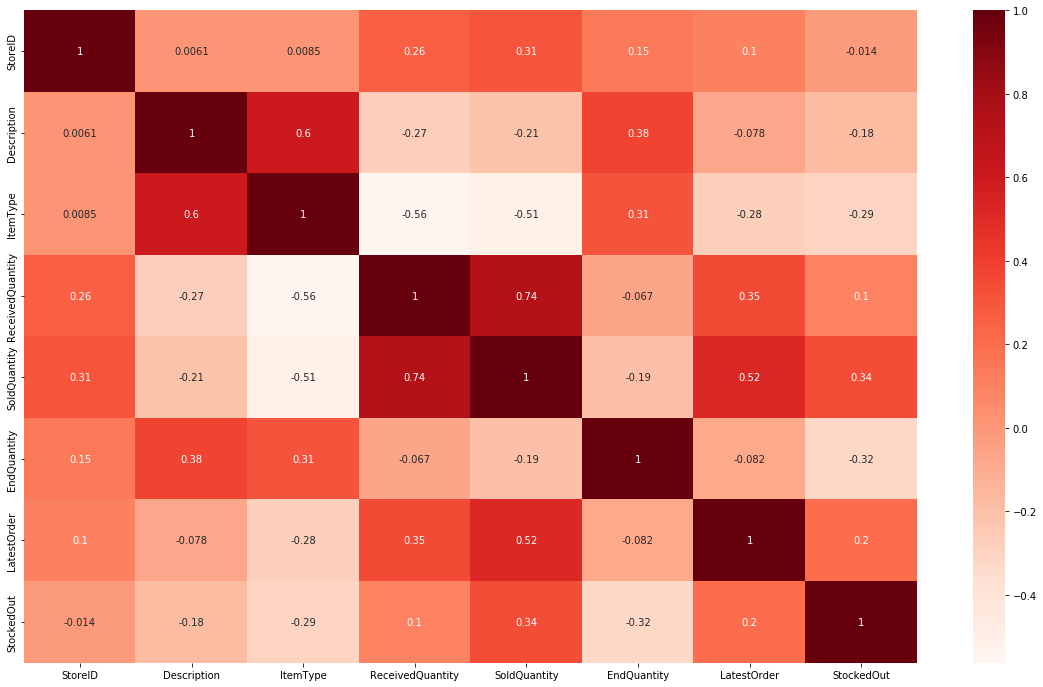

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
cor = one_hot.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
cor_target = abs(cor["SoldQuantity"])
cor_target

StoreID             0.309045
Description         0.212197
ItemType            0.511570
ReceivedQuantity    0.735505
SoldQuantity        1.000000
EndQuantity         0.190689
LatestOrder         0.523318
StockedOut          0.344313
Name: SoldQuantity, dtype: float64

### From the correlation matrix it can be seen that 'EndQuantity' does not have much effect on the output. We will remove that column 

In [ ]:
one_hot.drop('EndQuantity',axis=1)

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,LatestOrder,StockedOut
0,2019-06-29,18,0,0,2.0,1.0,7,1
1,2019-06-29,18,9,1,6.0,0.0,0,0
2,2019-06-29,18,13,1,0.0,0.0,0,0
3,2019-06-29,18,3,1,4.0,3.0,16,0
4,2019-06-29,18,1,0,9.0,6.0,15,0
...,...,...,...,...,...,...,...,...
14490,2020-06-29,332,10,1,0.0,3.0,7,1
14491,2020-06-29,332,4,1,0.0,0.0,0,0
14492,2020-06-29,332,5,0,0.0,15.0,14,0
14493,2020-06-29,332,6,0,0.0,2.0,13,0


### adding weekday feature

In [ ]:
one_hot['weekday'] = one_hot['BusinessDate'].dt.day_name()
one_hot.head(5)

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday
0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1,Saturday
1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0,Saturday
2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0,Saturday
3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0,Saturday
4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0,Saturday


### adding weather feature

In [ ]:
#weather = pd.read_csv('USA.csv')
weather_18 = pd.read_csv('91101.csv')
weather_117 = pd.read_csv('91105.csv')
weather_332 = pd.read_csv('92122.csv')
weather_18.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,91101,2019-01-01,58.8,41.2,50.6,58.8,41.2,48.9,8.8,18.85,...,12.9,6.0,NaN,2019-01-01T06:58:29,2019-01-01T16:53:56,0.91,Clear,Clear conditions throughout the day.,clear-day,"KHHR,HNGC1,KBUR,72295603167,72288023152"
1,91101,2019-01-02,60.2,37.5,48.8,60.2,35.0,48.3,17.6,30.14,...,12.7,6.0,NaN,2019-01-02T06:58:40,2019-01-02T16:54:42,0.95,Clear,Clear conditions throughout the day.,clear-day,"KHHR,HNGC1,KBUR,72295603167,72288023152"
2,91101,2019-01-03,64.8,39.9,51.5,64.8,39.9,51.4,25.4,38.95,...,12.9,6.0,NaN,2019-01-03T06:58:49,2019-01-03T16:55:29,0.97,Clear,Clear conditions throughout the day.,clear-day,"KHHR,HNGC1,KBUR,72295603167,72288023152"
3,91101,2019-01-04,64.4,40.5,51.9,64.4,39.4,51.8,31.0,47.23,...,13.1,6.0,NaN,2019-01-04T06:58:56,2019-01-04T16:56:16,0.99,Clear,Clear conditions throughout the day.,clear-day,"KHHR,HNGC1,KBUR,72295603167,72288023152"
4,91101,2019-01-05,56.0,46.2,50.8,56.0,43.9,50.5,41.6,71.37,...,2.6,2.0,NaN,2019-01-05T06:59:02,2019-01-05T16:57:05,1.00,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"KHHR,HNGC1,KBUR,KCQT,72295603167,72288023152"


In [ ]:
weather_18['datetime'] = pd.to_datetime(weather_18['datetime'])
weather_117['datetime'] = pd.to_datetime(weather_117['datetime'])
weather_332['datetime'] = pd.to_datetime(weather_332['datetime'])
weather_18 = weather_18[['datetime','temp','icon']]
weather_117 = weather_117[['datetime','temp','icon']]
weather_332 = weather_332[['datetime','temp','icon']]
weather_18.head(5)

,datetime,temp,icon
0,2019-01-01,50.6,clear-day
1,2019-01-02,48.8,clear-day
2,2019-01-03,51.5,clear-day
3,2019-01-04,51.9,clear-day
4,2019-01-05,50.8,rain


In [ ]:
weather_18 = weather_18.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather_18['StoreID'] = 18 
weather_117 = weather_117.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather_117['StoreID'] = 117
weather_332 = weather_332.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})
weather_332['StoreID'] = 332
weather_18

,BusinessDate,temp,Condition,StoreID
0,2019-01-01,50.6,clear-day,18
1,2019-01-02,48.8,clear-day,18
2,2019-01-03,51.5,clear-day,18
3,2019-01-04,51.9,clear-day,18
4,2019-01-05,50.8,rain,18
...,...,...,...,...
726,2020-12-27,56.4,partly-cloudy-day,18
727,2020-12-28,48.4,rain,18
728,2020-12-29,51.4,clear-day,18
729,2020-12-30,53.6,clear-day,18


In [ ]:
one_hot_18 = one_hot[one_hot['StoreID']==18]
one_hot_117 = one_hot[one_hot['StoreID']==117]
one_hot_332 = one_hot[one_hot['StoreID']==332]

one_hot_18 = pd.merge(one_hot_18,weather_18, left_on=['BusinessDate','StoreID'], right_on = ['BusinessDate','StoreID'],how='left')
one_hot_117 = pd.merge(one_hot_117,weather_117, left_on=['BusinessDate','StoreID'], right_on = ['BusinessDate','StoreID'],how='left')
one_hot_332 = pd.merge(one_hot_332,weather_332, left_on=['BusinessDate','StoreID'], right_on = ['BusinessDate','StoreID'],how='left')

one_hot = pd.concat([one_hot_18,one_hot_117,one_hot_332])

In [ ]:
one_hot

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday,temp,Condition
0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1,Saturday,71.3,clear-day
1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0,Saturday,71.3,clear-day
2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0,Saturday,71.3,clear-day
3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0,Saturday,71.3,clear-day
4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0,Saturday,71.3,clear-day
...,...,...,...,...,...,...,...,...,...,...,...,...
4901,2020-06-29,332,10,1,0.0,3.0,0.0,7,1,Monday,64.6,rain
4902,2020-06-29,332,4,1,0.0,0.0,0.0,0,0,Monday,64.6,rain
4903,2020-06-29,332,5,0,0.0,15.0,5.0,14,0,Monday,64.6,rain
4904,2020-06-29,332,6,0,0.0,2.0,1.0,13,0,Monday,64.6,rain


### Adding Holiday features

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=one_hot['BusinessDate'].min(), end=one_hot['BusinessDate'].max())
one_hot['Holiday'] = one_hot['BusinessDate'].isin(holidays)
one_hot

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday,temp,Condition,Holiday
0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1,Saturday,71.3,clear-day,False
1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0,Saturday,71.3,clear-day,False
2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0,Saturday,71.3,clear-day,False
3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0,Saturday,71.3,clear-day,False
4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0,Saturday,71.3,clear-day,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,2020-06-29,332,10,1,0.0,3.0,0.0,7,1,Monday,64.6,rain,False
4902,2020-06-29,332,4,1,0.0,0.0,0.0,0,0,Monday,64.6,rain,False
4903,2020-06-29,332,5,0,0.0,15.0,5.0,14,0,Monday,64.6,rain,False
4904,2020-06-29,332,6,0,0.0,2.0,1.0,13,0,Monday,64.6,rain,False


In [ ]:
one_hot['Holiday'] = one_hot['Holiday'].astype(int)

In [ ]:
one_hot.head()
#one_hot.to_csv("Assignment_3_df.csv")

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday,temp,Condition,Holiday
0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1,Saturday,71.3,clear-day,0
1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0,Saturday,71.3,clear-day,0
2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0,Saturday,71.3,clear-day,0
3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0,Saturday,71.3,clear-day,0
4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0,Saturday,71.3,clear-day,0


### One hot encoding of the dataframe

In [ ]:
one_hot = pd.get_dummies(one_hot)
one_hot.head()

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1,71.3,...,0,1,0,0,0,0,1,0,0,0
1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0,71.3,...,0,1,0,0,0,0,1,0,0,0
2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0,71.3,...,0,1,0,0,0,0,1,0,0,0
3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0,71.3,...,0,1,0,0,0,0,1,0,0,0
4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0,71.3,...,0,1,0,0,0,0,1,0,0,0


### Inventory Optimization Technique - 1 

In [ ]:
import seaborn as sns
%matplotlib inline

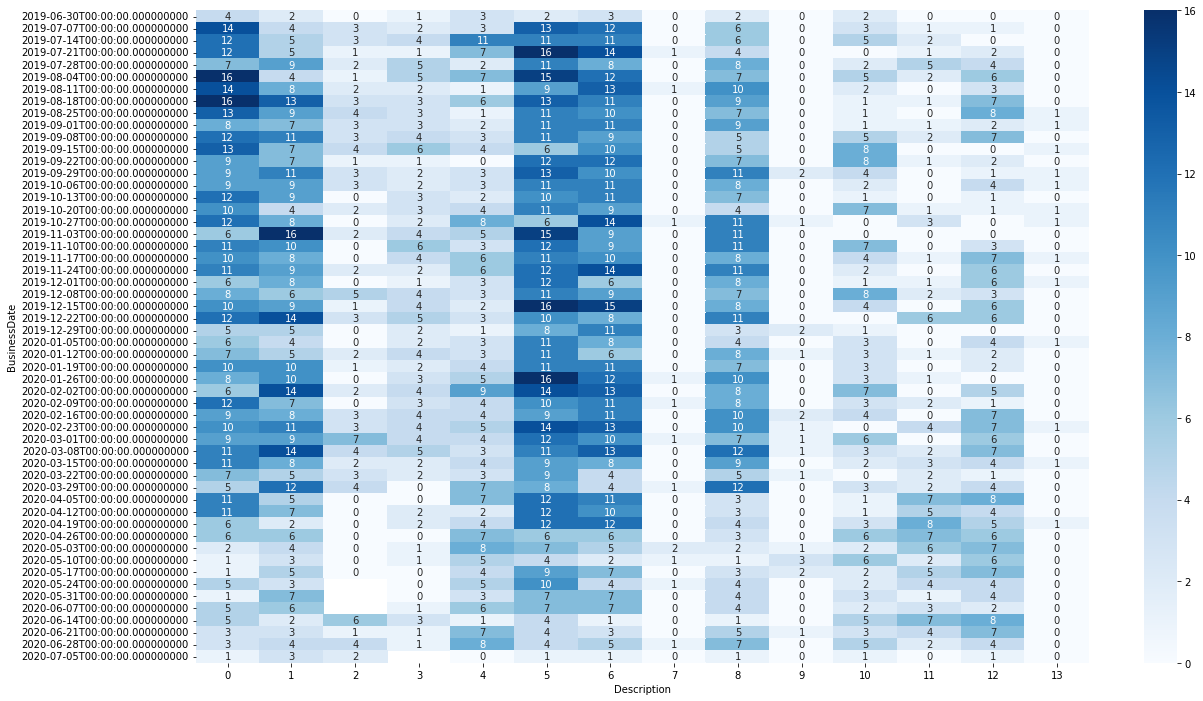

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(one_hot.pivot_table(index= pd.Grouper(key='BusinessDate', freq='W'),columns="Description",values="StockedOut",aggfunc="sum"), annot=True,cmap="Blues")

In [ ]:
one_hot_1 = one_hot.reset_index()

In [ ]:
one_hot_1

,index,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
0,0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1,...,0,1,0,0,0,0,1,0,0,0
1,1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0,...,0,1,0,0,0,0,1,0,0,0
4,4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14490,4901,2020-06-29,332,10,1,0.0,3.0,0.0,7,1,...,1,0,0,0,0,0,0,0,0,1
14491,4902,2020-06-29,332,4,1,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
14492,4903,2020-06-29,332,5,0,0.0,15.0,5.0,14,0,...,1,0,0,0,0,0,0,0,0,1
14493,4904,2020-06-29,332,6,0,0.0,2.0,1.0,13,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
del one_hot_1["index"]

In [ ]:
one_hot_1.set_index('BusinessDate', inplace=True)

In [ ]:
X_1 = one_hot_1.drop(['SoldQuantity'],axis=1)
Y_1 = one_hot_1['SoldQuantity']

In [ ]:
#X_1, X_2, Y_1, Y_2 = train_test_split(X, Y,random_state = 0, test_size=0.2)

In [ ]:
x_train = X_1.values
y_train = Y_1.values.reshape(len(Y_1),1)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=80, max_depth=8, gamma = 0, learning_rate =0.05, booster='gbtree')
model_4.fit(x_train, y_train)
model_4.score(x_train, y_train)

0.8907054748072905

#### Increasing the inventory stocks (25% and 15%) for stockedOut products

In [ ]:
for i in range(len(one_hot_1)):
    if (one_hot_1.Description[i] == 0) or (one_hot_1.Description[i] == 1) or (one_hot_1.Description[i] == 5) or (one_hot_1.Description[i] == 6) or (one_hot_1.Description[i] == 8):
        one_hot_1.ReceivedQuantity[i] = round(one_hot_1.ReceivedQuantity[i]*1.25)     
    elif (one_hot_1.Description[i] == 2) or (one_hot_1.Description[i] == 3) or (one_hot_1.Description[i] == 4) or (one_hot_1.Description[i] == 11) or (one_hot_1.Description[i] == 12):
        one_hot_1.ReceivedQuantity[i] = round(one_hot_1.ReceivedQuantity[i]*1.15)

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
one_hot_1

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,18,0,0,2.0,1.0,0.0,7,1,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,9,1,6.0,0.0,8.0,0,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,13,1,0.0,0.0,3.0,0,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,3,1,5.0,3.0,4.0,16,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,1,0,11.0,6.0,0.0,15,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,332,10,1,0.0,3.0,0.0,7,1,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,4,1,0.0,0.0,0.0,0,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,5,0,0.0,15.0,5.0,14,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
one_hot_1.columns

Index(['StoreID', 'Description', 'ItemType', 'ReceivedQuantity',
       'SoldQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut', 'temp',
       'Holiday', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain'],
      dtype='object')

In [ ]:
one_hot_2 = one_hot_1.copy() 

In [ ]:
one_hot_2

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,18,0,0,2.0,1.0,0.0,7,1,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,9,1,6.0,0.0,8.0,0,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,13,1,0.0,0.0,3.0,0,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,3,1,5.0,3.0,4.0,16,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,1,0,11.0,6.0,0.0,15,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,332,10,1,0.0,3.0,0.0,7,1,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,4,1,0.0,0.0,0.0,0,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,5,0,0.0,15.0,5.0,14,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
cor = one_hot_2.corr()
cor_target = abs(cor["SoldQuantity"])
cor_target

StoreID                        0.309045
Description                    0.212197
ItemType                       0.511570
ReceivedQuantity               0.754944
SoldQuantity                   1.000000
EndQuantity                    0.190689
LatestOrder                    0.523318
StockedOut                     0.344313
temp                           0.176958
Holiday                        0.008947
weekday_Friday                 0.052048
weekday_Monday                 0.015672
weekday_Saturday               0.025169
weekday_Sunday                 0.058106
weekday_Thursday               0.021481
weekday_Tuesday                0.003986
weekday_Wednesday              0.023253
Condition_clear-day            0.059041
Condition_cloudy               0.014995
Condition_partly-cloudy-day    0.066990
Condition_rain                 0.011122
Name: SoldQuantity, dtype: float64

In [ ]:
X_2 = one_hot_2.drop(['SoldQuantity'],axis=1)
Y_2 = one_hot_2['SoldQuantity']

In [ ]:
"""
#stats model
training_size= int(0.80*len(one_hot_2))
test_size=len(one_hot_1)-training_size
train_data,test_data=one_hot_2[0:training_size],one_hot_2[training_size:len(one_hot_2)]

x_train = train_data.drop(['SoldQuantity'],axis=1)
y_train = train_data['SoldQuantity']
x_test = test_data.drop(['SoldQuantity'],axis=1)
y_test = test_data['SoldQuantity']

x_train = x_train.values
y_train = y_train.values.reshape(len(y_train),1)

x_test = x_test.values
y_test = y_test.values.reshape(len(y_test),1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)
"""

"\n#stats model\ntraining_size= int(0.80*len(one_hot_2))\ntest_size=len(one_hot_1)-training_size\ntrain_data,test_data=one_hot_2[0:training_size],one_hot_2[training_size:len(one_hot_2)]\n\nx_train = train_data.drop(['SoldQuantity'],axis=1)\ny_train = train_data['SoldQuantity']\nx_test = test_data.drop(['SoldQuantity'],axis=1)\ny_test = test_data['SoldQuantity']\n\nx_train = x_train.values\ny_train = y_train.values.reshape(len(y_train),1)\n\nx_test = x_test.values\ny_test = y_test.values.reshape(len(y_test),1)\nscaler = MinMaxScaler(feature_range=(-1, 1))\nscaler1 = MinMaxScaler(feature_range=(-1, 1))\n\nx_train = scaler.fit_transform(x_train)\nx_test = scaler.transform(x_test)\ny_train = scaler1.fit_transform(y_train)\ny_test = scaler1.transform(y_test)\n"

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 0, test_size=0.2)

x_test = X_2.values
y_test = Y_2.values.reshape(len(Y),1)


x_test= scaler.transform(x_test)

In [ ]:
y_test = model_4.predict(x_test)

In [ ]:
y_test

array([-0.84862995, -0.97643965, -0.97435945, ...,  0.04191062,
       -0.5561348 , -0.52149767], dtype=float32)

In [ ]:
y_pred = np.round(scaler1.inverse_transform(y_test.reshape(1,len(y_test))))
y_pred

array([[ 2.,  0.,  0., ..., 11.,  5.,  5.]], dtype=float32)

In [ ]:
#y_orig = one_hot["SoldQuantity"][-2900:-1]
y_orig = Y_1.values.reshape(1,len(Y_1))
y_orig

array([[ 1.,  0.,  0., ..., 15.,  2.,  4.]])

#### Total sales of predicted Quantity vs. Total sales of original Quantity

In [ ]:
np.sum(y_pred),np.sum(y_orig)

(48010.0, 38600.0)

### Initiative 1 for Other 10 stores

In [ ]:
df_ten_stores = df[(df["StoreID"]==2) | (df["StoreID"]==6) | (df["StoreID"]==10) | (df["StoreID"]==18) | (df["StoreID"]==20) | (df["StoreID"]==21) | (df["StoreID"]==22) | (df["StoreID"]==34) | (df["StoreID"]==36) | (df["StoreID"]==40)]
df_ten_stores

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969
6,2,2019-06-29,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,6.0,6.0,0.0,13,1,2.0,0.609827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138569,40,2020-06-29,3000162,Protein Box,Unassigned,Food,Cold Case,Ready to Eat,0.0,1.0,4.0,14,0,3.0,0.000000
138570,40,2020-06-29,3000181,Mixed Fruit Snack Pot,Unassigned,Food,Cold Case,Ready to Eat,0.0,2.0,0.0,15,0,3.0,0.000000
138573,40,2020-06-29,3000211,Muffin - Blueberry Streusel,Core,Food,Bake Case,Muffins & Scones,0.0,5.0,1.0,17,0,3.0,0.000000
138574,40,2020-06-29,3000212,Muffin - Double Chocolate,Core,Food,Bake Case,Muffins & Scones,0.0,2.0,0.0,11,0,3.0,0.000000


In [ ]:
df_ten_stores.index = range(len(df_ten_stores))
df_ten_stores

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
1,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
2,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
3,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969
4,2,2019-06-29,851004,Jalapeno Cheese Bagel,Core,Food,Bake Case,Bagels,6.0,6.0,0.0,13,1,2.0,0.609827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46499,40,2020-06-29,3000162,Protein Box,Unassigned,Food,Cold Case,Ready to Eat,0.0,1.0,4.0,14,0,3.0,0.000000
46500,40,2020-06-29,3000181,Mixed Fruit Snack Pot,Unassigned,Food,Cold Case,Ready to Eat,0.0,2.0,0.0,15,0,3.0,0.000000
46501,40,2020-06-29,3000211,Muffin - Blueberry Streusel,Core,Food,Bake Case,Muffins & Scones,0.0,5.0,1.0,17,0,3.0,0.000000
46502,40,2020-06-29,3000212,Muffin - Double Chocolate,Core,Food,Bake Case,Muffins & Scones,0.0,2.0,0.0,11,0,3.0,0.000000


In [ ]:
df_ten_stores = df_ten_stores[['BusinessDate','StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]

In [ ]:
df_ten_stores['Description'] = le1.fit_transform(df_ten_stores[['Description']])
df_ten_stores['ItemType'] = le2.fit_transform(df_ten_stores[['ItemType']])

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Pritesh

In [ ]:
df_ten_stores

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1
...,...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,10,1,0.0,1.0,4.0,14,0
46500,2020-06-29,40,4,1,0.0,2.0,0.0,15,0
46501,2020-06-29,40,5,0,0.0,5.0,1.0,17,0
46502,2020-06-29,40,6,0,0.0,2.0,0.0,11,0


In [ ]:
df_ten_stores['BusinessDate'] = pd.to_datetime(df_ten_stores['BusinessDate'])

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
one_hot_10 = pd.get_dummies(df_ten_stores)
one_hot_10

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1
...,...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,10,1,0.0,1.0,4.0,14,0
46500,2020-06-29,40,4,1,0.0,2.0,0.0,15,0
46501,2020-06-29,40,5,0,0.0,5.0,1.0,17,0
46502,2020-06-29,40,6,0,0.0,2.0,0.0,11,0


In [ ]:
cor = one_hot_10.corr()
cor_target_10 = abs(cor["SoldQuantity"])
cor_target_10

StoreID             0.009371
Description         0.157893
ItemType            0.462415
ReceivedQuantity    0.663068
SoldQuantity        1.000000
EndQuantity         0.086105
LatestOrder         0.539861
StockedOut          0.307987
Name: SoldQuantity, dtype: float64

In [ ]:
one_hot_10.drop('EndQuantity',axis=1)

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,LatestOrder,StockedOut
0,2019-06-29,2,0,0,4.0,2.0,10,0
1,2019-06-29,2,9,1,0.0,1.0,13,0
2,2019-06-29,2,13,1,0.0,0.0,0,0
3,2019-06-29,2,3,1,0.0,3.0,11,1
4,2019-06-29,2,1,0,6.0,6.0,13,1
...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,10,1,0.0,1.0,14,0
46500,2020-06-29,40,4,1,0.0,2.0,15,0
46501,2020-06-29,40,5,0,0.0,5.0,17,0
46502,2020-06-29,40,6,0,0.0,2.0,11,0


In [ ]:
one_hot_10['weekday'] = one_hot_10['BusinessDate'].dt.day_name()
one_hot_10.head(5)

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,Saturday
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,Saturday
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,Saturday
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,Saturday
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,Saturday


In [ ]:
weather = pd.read_csv('USA.csv')

In [ ]:
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather = weather[['datetime','temp','icon']]
weather.head(5)

,datetime,temp,icon
0,2019-01-01,56.5,rain
1,2019-02-01,45.3,cloudy
2,2019-03-01,46.5,partly-cloudy-day
3,2019-04-01,43.1,rain
4,2019-05-01,49.1,rain


In [ ]:
weather = weather.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})

In [ ]:
one_hot_10 = pd.merge(one_hot_10,weather, on='BusinessDate',how='left')

In [ ]:
one_hot_10

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday,temp,Condition
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,Saturday,82.0,rain
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,Saturday,82.0,rain
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,Saturday,82.0,rain
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,Saturday,82.0,rain
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,Saturday,82.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,10,1,0.0,1.0,4.0,14,0,Monday,83.6,partly-cloudy-day
46500,2020-06-29,40,4,1,0.0,2.0,0.0,15,0,Monday,83.6,partly-cloudy-day
46501,2020-06-29,40,5,0,0.0,5.0,1.0,17,0,Monday,83.6,partly-cloudy-day
46502,2020-06-29,40,6,0,0.0,2.0,0.0,11,0,Monday,83.6,partly-cloudy-day


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=one_hot_10['BusinessDate'].min(), end=one_hot_10['BusinessDate'].max())

one_hot_10['Holiday'] = one_hot_10['BusinessDate'].isin(holidays)
one_hot_10

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday,temp,Condition,Holiday
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,Saturday,82.0,rain,False
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,Saturday,82.0,rain,False
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,Saturday,82.0,rain,False
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,Saturday,82.0,rain,False
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,Saturday,82.0,rain,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46499,2020-06-29,40,10,1,0.0,1.0,4.0,14,0,Monday,83.6,partly-cloudy-day,False
46500,2020-06-29,40,4,1,0.0,2.0,0.0,15,0,Monday,83.6,partly-cloudy-day,False
46501,2020-06-29,40,5,0,0.0,5.0,1.0,17,0,Monday,83.6,partly-cloudy-day,False
46502,2020-06-29,40,6,0,0.0,2.0,0.0,11,0,Monday,83.6,partly-cloudy-day,False


In [ ]:
one_hot_10['Holiday'] = one_hot_10['Holiday'].astype(int)

In [ ]:
one_hot_10.head()

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday,temp,Condition,Holiday
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,Saturday,82.0,rain,0
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,Saturday,82.0,rain,0
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,Saturday,82.0,rain,0
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,Saturday,82.0,rain,0
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,Saturday,82.0,rain,0


In [ ]:
one_hot_10 = pd.get_dummies(one_hot_10)
one_hot_10.head()

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,82.0,...,0,0,0,0,0,0,0,1,0,0
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,82.0,...,0,0,0,0,0,0,0,1,0,0
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,82.0,...,0,0,0,0,0,0,0,1,0,0
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,...,0,0,0,0,0,0,0,1,0,0
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,82.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
one_hot_10.set_index('BusinessDate', inplace=True)

In [ ]:
one_hot_10.columns

Index(['StoreID', 'Description', 'ItemType', 'ReceivedQuantity',
       'SoldQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut', 'temp',
       'Holiday', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain', 'Condition_snow',
       'Condition_wind'],
      dtype='object')

In [ ]:
X_1 = one_hot_10.drop(['SoldQuantity'],axis=1)
Y_1 = one_hot_10['SoldQuantity']

In [ ]:
#X_1, X_2, Y_1, Y_2 = train_test_split(X, Y,random_state = 0, test_size=0.2)

In [ ]:
x_train = X_1.values
y_train = Y_1.values.reshape(len(Y_1),1)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=300, max_depth=12, gamma = 0, learning_rate =0.06, booster='gbtree')
model_4.fit(x_train, y_train)
model_4.score(x_train, y_train)

0.9581032166706182

#### Increasing the inventory stocks (25% and 15%) for stockedOut products

In [ ]:
for i in range(len(one_hot_10)):
    if (one_hot_10.Description[i] == 0) or (one_hot_10.Description[i] == 1) or (one_hot_10.Description[i] == 5) or (one_hot_10.Description[i] == 6) or (one_hot_10.Description[i] == 8):
        one_hot_10.ReceivedQuantity[i] = round(one_hot_10.ReceivedQuantity[i]*1.25)     
    elif (one_hot_10.Description[i] == 2) or (one_hot_10.Description[i] == 3) or (one_hot_10.Description[i] == 4) or (one_hot_10.Description[i] == 11) or (one_hot_10.Description[i] == 12):
        one_hot_10.ReceivedQuantity[i] = round(one_hot_10.ReceivedQuantity[i]*1.15)

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
one_hot_10

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,2,0,0,5.0,2.0,0.0,10,0,82.0,0,...,0,0,0,0,0,0,0,1,0,0
2019-06-29,2,9,1,0.0,1.0,9.0,13,0,82.0,0,...,0,0,0,0,0,0,0,1,0,0
2019-06-29,2,13,1,0.0,0.0,27.0,0,0,82.0,0,...,0,0,0,0,0,0,0,1,0,0
2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,0,...,0,0,0,0,0,0,0,1,0,0
2019-06-29,2,1,0,8.0,6.0,0.0,13,1,82.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,40,10,1,0.0,1.0,4.0,14,0,83.6,0,...,0,0,0,0,0,0,1,0,0,0
2020-06-29,40,4,1,0.0,2.0,0.0,15,0,83.6,0,...,0,0,0,0,0,0,1,0,0,0
2020-06-29,40,5,0,0.0,5.0,1.0,17,0,83.6,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
one_hot_10.columns

Index(['StoreID', 'Description', 'ItemType', 'ReceivedQuantity',
       'SoldQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut', 'temp',
       'Holiday', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain', 'Condition_snow',
       'Condition_wind'],
      dtype='object')

In [ ]:
cor = one_hot_10.corr()
cor_target = abs(cor["SoldQuantity"])
cor_target

StoreID                        0.009371
Description                    0.157893
ItemType                       0.462415
ReceivedQuantity               0.684081
SoldQuantity                   1.000000
EndQuantity                    0.086105
LatestOrder                    0.539861
StockedOut                     0.307987
temp                           0.012405
Holiday                        0.008143
weekday_Friday                 0.041375
weekday_Monday                 0.000657
weekday_Saturday               0.021805
weekday_Sunday                 0.075191
weekday_Thursday               0.023861
weekday_Tuesday                0.007496
weekday_Wednesday              0.025034
Condition_clear-day            0.012284
Condition_cloudy               0.015199
Condition_partly-cloudy-day    0.017310
Condition_rain                 0.018149
Condition_snow                 0.006949
Condition_wind                 0.000541
Name: SoldQuantity, dtype: float64

In [ ]:
X_2 = one_hot_10.drop(['SoldQuantity'],axis=1)
Y_2 = one_hot_10['SoldQuantity']

In [ ]:
"""
#stats model
training_size= int(0.80*len(one_hot_2))
test_size=len(one_hot_1)-training_size
train_data,test_data=one_hot_2[0:training_size],one_hot_2[training_size:len(one_hot_2)]

x_train = train_data.drop(['SoldQuantity'],axis=1)
y_train = train_data['SoldQuantity']
x_test = test_data.drop(['SoldQuantity'],axis=1)
y_test = test_data['SoldQuantity']

x_train = x_train.values
y_train = y_train.values.reshape(len(y_train),1)

x_test = x_test.values
y_test = y_test.values.reshape(len(y_test),1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)
"""

"\n#stats model\ntraining_size= int(0.80*len(one_hot_2))\ntest_size=len(one_hot_1)-training_size\ntrain_data,test_data=one_hot_2[0:training_size],one_hot_2[training_size:len(one_hot_2)]\n\nx_train = train_data.drop(['SoldQuantity'],axis=1)\ny_train = train_data['SoldQuantity']\nx_test = test_data.drop(['SoldQuantity'],axis=1)\ny_test = test_data['SoldQuantity']\n\nx_train = x_train.values\ny_train = y_train.values.reshape(len(y_train),1)\n\nx_test = x_test.values\ny_test = y_test.values.reshape(len(y_test),1)\nscaler = MinMaxScaler(feature_range=(-1, 1))\nscaler1 = MinMaxScaler(feature_range=(-1, 1))\n\nx_train = scaler.fit_transform(x_train)\nx_test = scaler.transform(x_test)\ny_train = scaler1.fit_transform(y_train)\ny_test = scaler1.transform(y_test)\n"

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 0, test_size=0.2)

x_test = X_2.values
y_test = Y_2.values.reshape(len(Y_2),1)


x_test= scaler.transform(x_test)

In [ ]:
y_test = model_4.predict(x_test)

In [ ]:
y_test

array([-0.9283429 , -0.96848917, -0.9995938 , ..., -0.8723721 ,
       -0.9473357 , -0.868964  ], dtype=float32)

In [ ]:
y_pred = np.round(scaler1.inverse_transform(y_test.reshape(1,len(y_test))))
y_pred

array([[3., 1., 0., ..., 5., 2., 5.]], dtype=float32)

In [ ]:
#y_orig = one_hot["SoldQuantity"][-2900:-1]
y_orig = Y_1.values.reshape(1,len(Y_1))
y_orig

array([[2., 1., 0., ..., 5., 2., 6.]])

#### Total sales of predicted Quantity vs. Total sales of original Quantity

In [ ]:
np.sum(y_pred),np.sum(y_orig)

(142005.0, 122562.0)

### Inventory Optimization Technique - 2

In [ ]:
one_hot_temp = one_hot.reset_index()
#one_hot_temp = one_hot_temp[['BusinessDate','StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]
one_hot_temp 

,index,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
0,0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1,...,0,1,0,0,0,0,1,0,0,0
1,1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0,...,0,1,0,0,0,0,1,0,0,0
4,4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14490,4901,2020-06-29,332,10,1,0.0,3.0,0.0,7,1,...,1,0,0,0,0,0,0,0,0,1
14491,4902,2020-06-29,332,4,1,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
14492,4903,2020-06-29,332,5,0,0.0,15.0,5.0,14,0,...,1,0,0,0,0,0,0,0,0,1
14493,4904,2020-06-29,332,6,0,0.0,2.0,1.0,13,0,...,1,0,0,0,0,0,0,0,0,1


### Diving dataset based on the ranges of the Temperature

In [ ]:
one_hot_temp.loc[(one_hot_temp['temp']<30) & (one_hot_temp['temp']>=15), 'Temp_class'] = 0
one_hot_temp.loc[(one_hot_temp['temp']<45) & (one_hot_temp['temp']>=30), 'Temp_class'] = 1
one_hot_temp.loc[(one_hot_temp['temp']<60) & (one_hot_temp['temp']>=45), 'Temp_class'] = 2
one_hot_temp.loc[(one_hot_temp['temp']<75) & (one_hot_temp['temp']>=60), 'Temp_class'] = 3
one_hot_temp.loc[(one_hot_temp['temp']<95) & (one_hot_temp['temp']>=75), 'Temp_class'] = 4

In [ ]:
one_hot_temp

,index,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Temp_class
0,0,2019-06-29,18,0,0,2.0,1.0,0.0,7,1,...,1,0,0,0,0,1,0,0,0,3.0
1,1,2019-06-29,18,9,1,6.0,0.0,8.0,0,0,...,1,0,0,0,0,1,0,0,0,3.0
2,2,2019-06-29,18,13,1,0.0,0.0,3.0,0,0,...,1,0,0,0,0,1,0,0,0,3.0
3,3,2019-06-29,18,3,1,4.0,3.0,4.0,16,0,...,1,0,0,0,0,1,0,0,0,3.0
4,4,2019-06-29,18,1,0,9.0,6.0,0.0,15,0,...,1,0,0,0,0,1,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14490,4901,2020-06-29,332,10,1,0.0,3.0,0.0,7,1,...,0,0,0,0,0,0,0,0,1,3.0
14491,4902,2020-06-29,332,4,1,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,3.0
14492,4903,2020-06-29,332,5,0,0.0,15.0,5.0,14,0,...,0,0,0,0,0,0,0,0,1,3.0
14493,4904,2020-06-29,332,6,0,0.0,2.0,1.0,13,0,...,0,0,0,0,0,0,0,0,1,3.0


### Temperatures classes vs. Description based on StockedOut

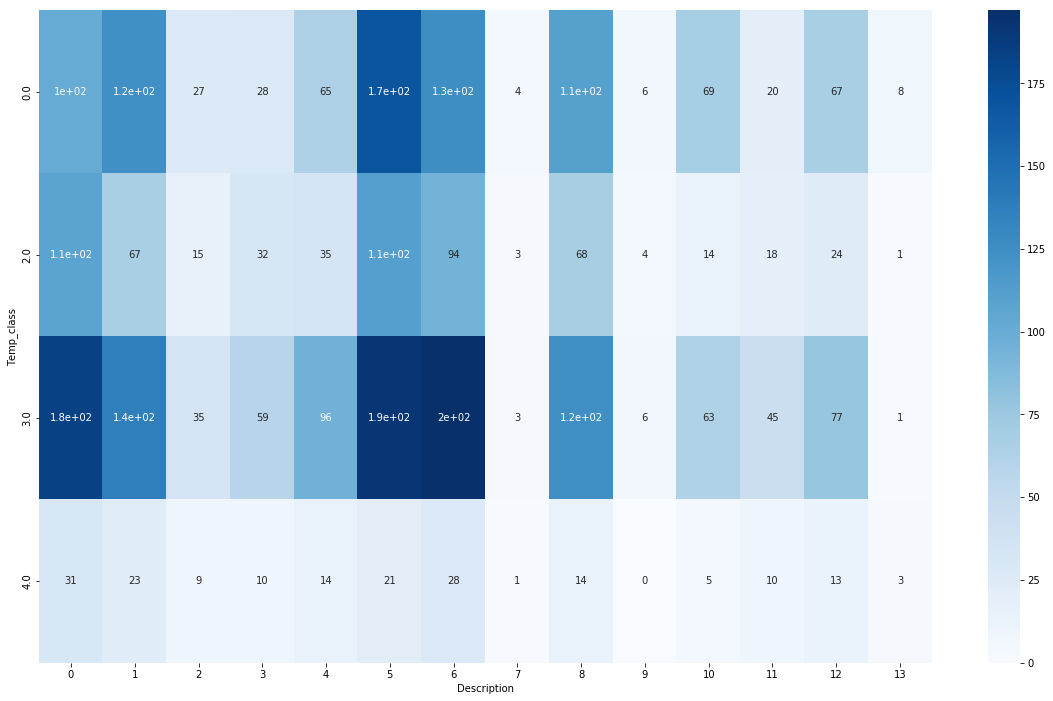

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(one_hot_temp.pivot_table(index= "Temp_class",columns="Description",values="StockedOut",aggfunc="sum"), annot=True,cmap="Blues")

### Temperatures classes vs. Description based on SoldQuantity

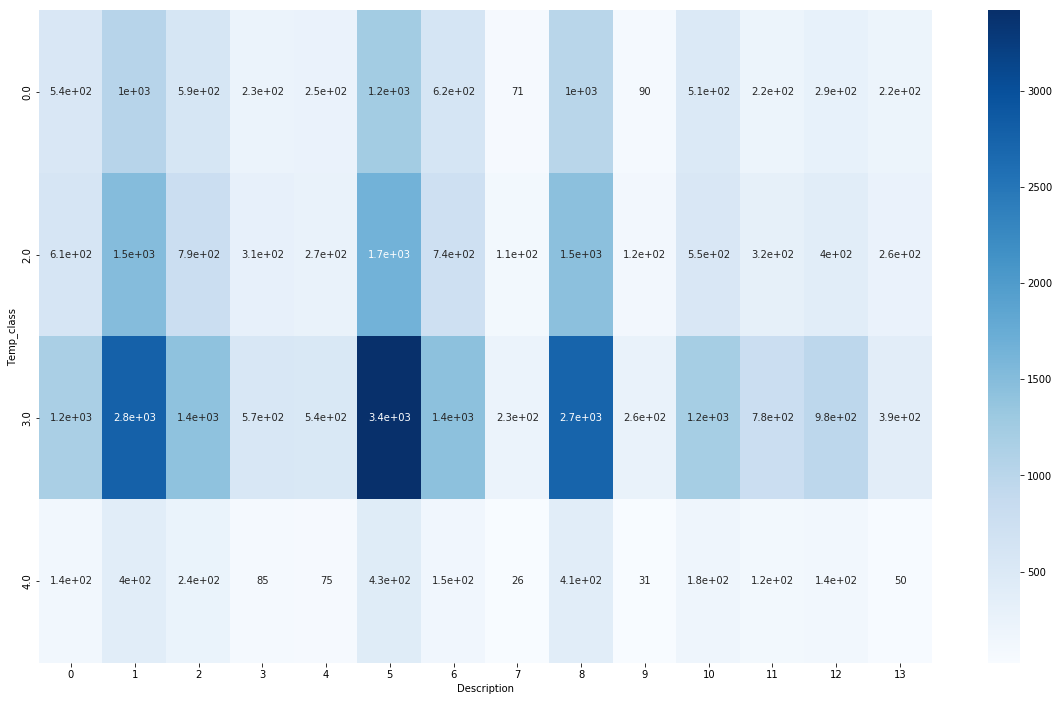

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(one_hot_temp.pivot_table(index= "Temp_class",columns="Description",values="SoldQuantity",aggfunc="sum"), annot=True,cmap="Blues")

### Temperatures classes vs. Description based on ReceivedQuantity

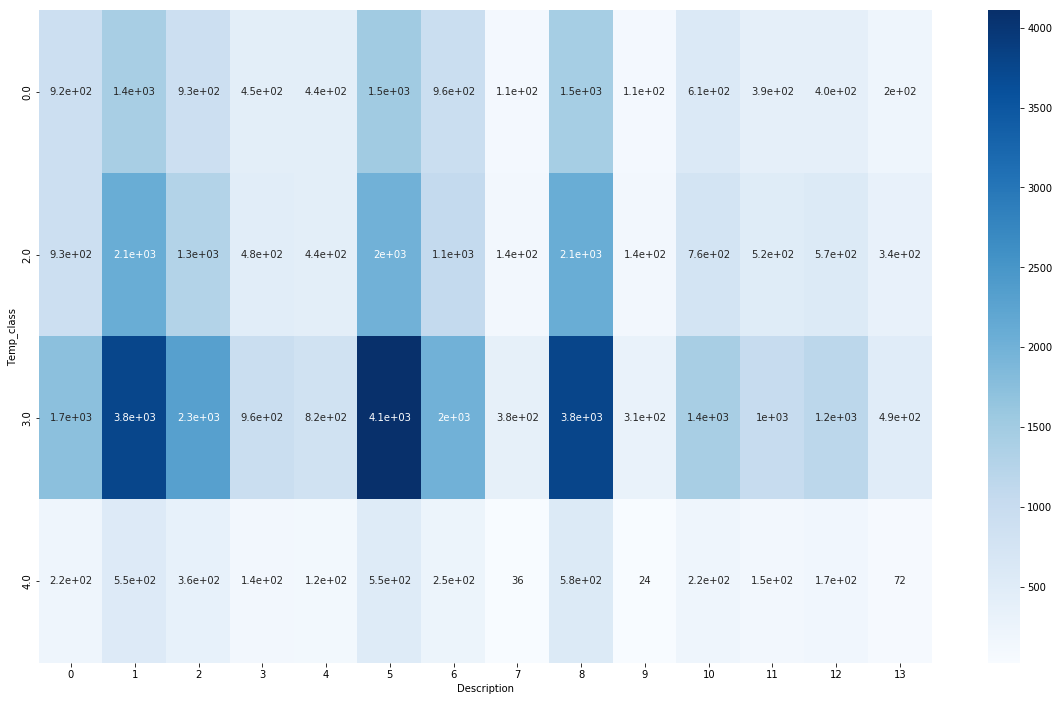

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(one_hot_temp.pivot_table(index= "Temp_class",columns="Description",values="ReceivedQuantity",aggfunc="sum"), annot=True,cmap="Blues")

In [ ]:
one_hot_temperature = one_hot.reset_index()

In [ ]:
one_hot_temperature.loc[(one_hot_temperature['temp']<30) & (one_hot_temperature['temp']>=15), 'Temp_class'] = 0
one_hot_temperature.loc[(one_hot_temperature['temp']<45) & (one_hot_temperature['temp']>=30), 'Temp_class'] = 1
one_hot_temperature.loc[(one_hot_temperature['temp']<60) & (one_hot_temperature['temp']>=45), 'Temp_class'] = 2
one_hot_temperature.loc[(one_hot_temperature['temp']<75) & (one_hot_temperature['temp']>=60), 'Temp_class'] = 3
one_hot_temperature.loc[(one_hot_temperature['temp']<95) & (one_hot_temperature['temp']>=75), 'Temp_class'] = 4

In [ ]:
del one_hot_temperature["index"]

In [ ]:
one_hot_temperature.set_index('BusinessDate', inplace=True)

In [ ]:
X_1 = one_hot_temperature.drop(['SoldQuantity'],axis=1)
Y_1 = one_hot_temperature['SoldQuantity']

In [ ]:
x_train = X_1.values
y_train = Y_1.values.reshape(len(Y_1),1)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=80, max_depth=8, gamma = 0, learning_rate =0.05, booster='gbtree')
model_4.fit(x_train, y_train)
model_4.score(x_train, y_train)

0.8913012296838347

### Stocking the Quantity based on the Products and Temperature

In [ ]:
for i in range(len(one_hot_temperature)):
    if (one_hot_temperature.Temp_class[i] == 0) and ((one_hot_temperature.Description[i] == 0) or (one_hot_temperature.Description[i] == 1) or (one_hot_temperature.Description[i] == 5) or (one_hot_temperature.Description[i] == 8)):
        one_hot_temperature.ReceivedQuantity[i] = round(one_hot_temperature.ReceivedQuantity[i]*1.25)     
    elif (one_hot_temperature.Temp_class[i] == 2) and ((one_hot_temperature.Description[i] == 0) or (one_hot_temperature.Description[i] == 5)):
        one_hot_temperature.ReceivedQuantity[i] = round(one_hot_temperature.ReceivedQuantity[i]*1.15)
    elif (one_hot_temperature.Temp_class[i] == 3) and ((one_hot_temperature.Description[i] == 0) or (one_hot_temperature.Description[i] == 1) or (one_hot_temperature.Description[i] == 5) or (one_hot_temperature.Description[i] == 6) or (one_hot_temperature.Description[i] == 8)):
        one_hot_temperature.ReceivedQuantity[i] = round(one_hot_temperature.ReceivedQuantity[i]*1.30)        
one_hot_temperature

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoi

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Temp_class
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,18,0,0,3.0,1.0,0.0,7,1,71.3,0,...,1,0,0,0,0,1,0,0,0,3.0
2019-06-29,18,9,1,6.0,0.0,8.0,0,0,71.3,0,...,1,0,0,0,0,1,0,0,0,3.0
2019-06-29,18,13,1,0.0,0.0,3.0,0,0,71.3,0,...,1,0,0,0,0,1,0,0,0,3.0
2019-06-29,18,3,1,4.0,3.0,4.0,16,0,71.3,0,...,1,0,0,0,0,1,0,0,0,3.0
2019-06-29,18,1,0,12.0,6.0,0.0,15,0,71.3,0,...,1,0,0,0,0,1,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,332,10,1,0.0,3.0,0.0,7,1,64.6,0,...,0,0,0,0,0,0,0,0,1,3.0
2020-06-29,332,4,1,0.0,0.0,0.0,0,0,64.6,0,...,0,0,0,0,0,0,0,0,1,3.0
2020-06-29,332,5,0,0.0,15.0,5.0,14,0,64.6,0,...,0,0,0,0,0,0,0,0,1,3.0


In [ ]:
cor = one_hot_temperature.corr()
cor_target = abs(cor["SoldQuantity"])
cor_target

StoreID                        0.309045
Description                    0.212197
ItemType                       0.511570
ReceivedQuantity               0.749684
SoldQuantity                   1.000000
EndQuantity                    0.190689
LatestOrder                    0.523318
StockedOut                     0.344313
temp                           0.176958
Holiday                        0.008947
weekday_Friday                 0.052048
weekday_Monday                 0.015672
weekday_Saturday               0.025169
weekday_Sunday                 0.058106
weekday_Thursday               0.021481
weekday_Tuesday                0.003986
weekday_Wednesday              0.023253
Condition_clear-day            0.059041
Condition_cloudy               0.014995
Condition_partly-cloudy-day    0.066990
Condition_rain                 0.011122
Temp_class                     0.156182
Name: SoldQuantity, dtype: float64

In [ ]:
X_2 = one_hot_temperature.drop(['SoldQuantity'],axis=1)
Y_2 = one_hot_temperature['SoldQuantity']

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 0, test_size=0.2)

x_test = X_2.values
y_test = Y_2.values.reshape(len(Y_2),1)


x_test= scaler.transform(x_test)

In [ ]:
y_test = model_4.predict(x_test)

In [ ]:
y_test

array([-0.7971837 , -0.9726189 , -0.97479856, ...,  0.05988735,
       -0.575219  , -0.52702737], dtype=float32)

In [ ]:
y_pred = np.round(scaler1.inverse_transform(y_test.reshape(1,len(y_test))))
y_pred

array([[ 2.,  0.,  0., ..., 12.,  5.,  5.]], dtype=float32)

In [ ]:
#y_orig = one_hot["SoldQuantity"][-2900:-1]
y_orig = Y_1.values.reshape(1,len(Y_1))
y_orig

array([[ 1.,  0.,  0., ..., 15.,  2.,  4.]])

#### Total sales of predicted Quantity vs. Total sales of original Quantity

In [ ]:
np.sum(y_pred),np.sum(y_orig)

(45269.0, 38600.0)

### Initiative 1 for Other 10 stores

In [ ]:
one_hot_temp_10 = one_hot_10.copy()

In [ ]:
one_hot_temp_10.loc[(one_hot_temp_10['temp']<30) & (one_hot_temp_10['temp']>=15), 'Temp_class'] = 0
one_hot_temp_10.loc[(one_hot_temp_10['temp']<45) & (one_hot_temp_10['temp']>=30), 'Temp_class'] = 1
one_hot_temp_10.loc[(one_hot_temp_10['temp']<60) & (one_hot_temp_10['temp']>=45), 'Temp_class'] = 2
one_hot_temp_10.loc[(one_hot_temp_10['temp']<75) & (one_hot_temp_10['temp']>=60), 'Temp_class'] = 3
one_hot_temp_10.loc[(one_hot_temp_10['temp']<95) & (one_hot_temp_10['temp']>=75), 'Temp_class'] = 4

In [ ]:
one_hot_temp_10

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind,Temp_class
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,2,0,0,5.0,2.0,0.0,10,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,9,1,0.0,1.0,9.0,13,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,13,1,0.0,0.0,27.0,0,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,1,0,8.0,6.0,0.0,13,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,40,10,1,0.0,1.0,4.0,14,0,83.6,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-29,40,4,1,0.0,2.0,0.0,15,0,83.6,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-29,40,5,0,0.0,5.0,1.0,17,0,83.6,0,...,0,0,0,0,0,1,0,0,0,4.0


In [ ]:
X_1 = one_hot_temp_10.drop(['SoldQuantity'],axis=1)
Y_1 = one_hot_temp_10['SoldQuantity']

In [ ]:
x_train = X_1.values
y_train = Y_1.values.reshape(len(Y_1),1)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=300, max_depth=12, gamma = 0, learning_rate =0.06, booster='gbtree')
model_4.fit(x_train, y_train)
model_4.score(x_train, y_train)

0.960357737099965

### Stocking the Quantity based on the Products and Temperature

In [ ]:
for i in range(len(one_hot_temp_10)):
    if (one_hot_temp_10.Temp_class[i] == 0) and ((one_hot_temp_10.Description[i] == 0) or (one_hot_temp_10.Description[i] == 1) or (one_hot_temp_10.Description[i] == 5) or (one_hot_temp_10.Description[i] == 6) or (one_hot_temp_10.Description[i] == 8)):
        one_hot_temp_10.ReceivedQuantity[i] = round(one_hot_temp_10.ReceivedQuantity[i]*1.25)     
    elif (one_hot_temp_10.Temp_class[i] == 2) and ((one_hot_temp_10.Description[i] == 0) or (one_hot_temp_10.Description[i] == 5)):
        one_hot_temp_10.ReceivedQuantity[i] = round(one_hot_temp_10.ReceivedQuantity[i]*1.15)
    elif (one_hot_temp_10.Temp_class[i] == 3) and ((one_hot_temp_10.Description[i] == 0) or (one_hot_temp_10.Description[i] == 1) or (one_hot_temp_10.Description[i] == 5) or (one_hot_temp_10.Description[i] == 6) or (one_hot_temp_10.Description[i] == 8)):
        one_hot_temp_10.ReceivedQuantity[i] = round(one_hot_temp_10.ReceivedQuantity[i]*1.30)        
one_hot_temp_10

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoi

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind,Temp_class
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,2,0,0,5.0,2.0,0.0,10,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,9,1,0.0,1.0,9.0,13,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,13,1,0.0,0.0,27.0,0,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,1,0,8.0,6.0,0.0,13,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,40,10,1,0.0,1.0,4.0,14,0,83.6,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-29,40,4,1,0.0,2.0,0.0,15,0,83.6,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-29,40,5,0,0.0,5.0,1.0,17,0,83.6,0,...,0,0,0,0,0,1,0,0,0,4.0


In [ ]:
one_hot_temp_10.columns

Index(['StoreID', 'Description', 'ItemType', 'ReceivedQuantity',
       'SoldQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut', 'temp',
       'Holiday', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain', 'Condition_snow',
       'Condition_wind', 'Temp_class'],
      dtype='object')

In [ ]:
#one_hot_1=one_hot_1.set_index(["BusinessDate"])
one_hot_temp_10

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind,Temp_class
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,2,0,0,5.0,2.0,0.0,10,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,9,1,0.0,1.0,9.0,13,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,13,1,0.0,0.0,27.0,0,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,1,0,8.0,6.0,0.0,13,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,40,10,1,0.0,1.0,4.0,14,0,83.6,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-29,40,4,1,0.0,2.0,0.0,15,0,83.6,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-29,40,5,0,0.0,5.0,1.0,17,0,83.6,0,...,0,0,0,0,0,1,0,0,0,4.0


In [ ]:
cor = one_hot_temp_10.corr()
cor_target = abs(cor["SoldQuantity"])
cor_target

StoreID                        0.009371
Description                    0.157893
ItemType                       0.462415
ReceivedQuantity               0.688628
SoldQuantity                   1.000000
EndQuantity                    0.086105
LatestOrder                    0.539861
StockedOut                     0.307987
temp                           0.012405
Holiday                        0.008143
weekday_Friday                 0.041375
weekday_Monday                 0.000657
weekday_Saturday               0.021805
weekday_Sunday                 0.075191
weekday_Thursday               0.023861
weekday_Tuesday                0.007496
weekday_Wednesday              0.025034
Condition_clear-day            0.012284
Condition_cloudy               0.015199
Condition_partly-cloudy-day    0.017310
Condition_rain                 0.018149
Condition_snow                 0.006949
Condition_wind                 0.000541
Temp_class                     0.009548
Name: SoldQuantity, dtype: float64

In [ ]:
X_2 = one_hot_temp_10.drop(['SoldQuantity'],axis=1)
Y_2 = one_hot_temp_10['SoldQuantity']

In [ ]:
"""
#stats model
training_size= int(0.80*len(one_hot_2))
test_size=len(one_hot_1)-training_size
train_data,test_data=one_hot_2[0:training_size],one_hot_2[training_size:len(one_hot_2)]

x_train = train_data.drop(['SoldQuantity'],axis=1)
y_train = train_data['SoldQuantity']
x_test = test_data.drop(['SoldQuantity'],axis=1)
y_test = test_data['SoldQuantity']

x_train = x_train.values
y_train = y_train.values.reshape(len(y_train),1)

x_test = x_test.values
y_test = y_test.values.reshape(len(y_test),1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler1.fit_transform(y_train)
y_test = scaler1.transform(y_test)
"""

"\n#stats model\ntraining_size= int(0.80*len(one_hot_2))\ntest_size=len(one_hot_1)-training_size\ntrain_data,test_data=one_hot_2[0:training_size],one_hot_2[training_size:len(one_hot_2)]\n\nx_train = train_data.drop(['SoldQuantity'],axis=1)\ny_train = train_data['SoldQuantity']\nx_test = test_data.drop(['SoldQuantity'],axis=1)\ny_test = test_data['SoldQuantity']\n\nx_train = x_train.values\ny_train = y_train.values.reshape(len(y_train),1)\n\nx_test = x_test.values\ny_test = y_test.values.reshape(len(y_test),1)\nscaler = MinMaxScaler(feature_range=(-1, 1))\nscaler1 = MinMaxScaler(feature_range=(-1, 1))\n\nx_train = scaler.fit_transform(x_train)\nx_test = scaler.transform(x_test)\ny_train = scaler1.fit_transform(y_train)\ny_test = scaler1.transform(y_test)\n"

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 0, test_size=0.2)

x_test = X_2.values
y_test = Y_2.values.reshape(len(Y_2),1)


x_test= scaler.transform(x_test)

In [ ]:
y_test = model_4.predict(x_test)

In [ ]:
y_test

array([-0.9548303 , -0.9732993 , -1.0002141 , ..., -0.8760785 ,
       -0.9457636 , -0.86974883], dtype=float32)

In [ ]:
y_pred = np.round(scaler1.inverse_transform(y_test.reshape(1,len(y_test))))
y_pred

array([[ 2.,  1., -0., ...,  5.,  2.,  5.]], dtype=float32)

In [ ]:
#y_orig = one_hot["SoldQuantity"][-2900:-1]
y_orig = Y_1.values.reshape(1,len(Y_1))
y_orig

array([[2., 1., 0., ..., 5., 2., 6.]])

#### Total sales of predicted Quantity vs. Total sales of original Quantity

In [ ]:
np.sum(y_pred),np.sum(y_orig)

(127982.0, 122562.0)

### Inventory Optimization Technique - 3 ABC Analysis

#### Let's first calculate the total sales for each products and multiply with the average price to know the total sales in dollar for the product

In [ ]:
one_hot_ABC = one_hot.copy()
one_hot_ABC.set_index('BusinessDate', inplace=True)
one_hot_ABC

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,18,0,0,2.0,1.0,0.0,7,1,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,9,1,6.0,0.0,8.0,0,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,13,1,0.0,0.0,3.0,0,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,3,1,4.0,3.0,4.0,16,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,1,0,9.0,6.0,0.0,15,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,332,10,1,0.0,3.0,0.0,7,1,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,4,1,0.0,0.0,0.0,0,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,5,0,0.0,15.0,5.0,14,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
one_hot_ABC = one_hot_ABC[['Description','SoldQuantity']].groupby(by='Description').sum()
one_hot_ABC=one_hot_ABC.reset_index()
one_hot_ABC 

,Description,SoldQuantity
0,0,2631.0
1,1,6063.0
2,2,3248.0
3,3,1241.0
4,4,1212.0
5,5,7170.0
6,6,3137.0
7,7,467.0
8,8,5922.0
9,9,538.0


In [ ]:
one_hot_ABC["TotalSales"] = one_hot_ABC["SoldQuantity"]*3
one_hot_ABC

,Description,SoldQuantity,TotalSales
0,0,2631.0,7893.0
1,1,6063.0,18189.0
2,2,3248.0,9744.0
3,3,1241.0,3723.0
4,4,1212.0,3636.0
5,5,7170.0,21510.0
6,6,3137.0,9411.0
7,7,467.0,1401.0
8,8,5922.0,17766.0
9,9,538.0,1614.0


In [ ]:
one_hot_ABC=one_hot_ABC.sort_values(by=['SoldQuantity','TotalSales'],ascending=False)
one_hot_ABC.index = range(len(one_hot_ABC))
one_hot_ABC

,Description,SoldQuantity,TotalSales
0,5,7170.0,21510.0
1,1,6063.0,18189.0
2,8,5922.0,17766.0
3,2,3248.0,9744.0
4,6,3137.0,9411.0
5,0,2631.0,7893.0
6,10,2565.0,7695.0
7,12,1888.0,5664.0
8,11,1505.0,4515.0
9,3,1241.0,3723.0


In [ ]:
sum_sales = one_hot_ABC["TotalSales"].sum(axis = 0)

#### ABC analysis based on the Revenue of the items

In [ ]:
one_hot_ABC["CP_item"] = 0
one_hot_ABC["CP_revenue"] = 0
one_hot_ABC["ABC"] = 0
counter = 0
for i in range(len(one_hot_ABC)):
    one_hot_ABC.CP_item[i]=int(((i+1)/len(one_hot_ABC))*100)
    one_hot_ABC.CP_revenue[i]= counter + int((one_hot_ABC.TotalSales[i] / sum_sales)*100)
    counter = one_hot_ABC.CP_revenue[i]
    if one_hot_ABC.CP_revenue[i]<40:
        one_hot_ABC.ABC[i]="A"
    elif one_hot_ABC.CP_revenue[i]>=40 and one_hot_ABC.CP_revenue[i]<80:
        one_hot_ABC.ABC[i]="B"
    elif one_hot_ABC.CP_revenue[i]>=80:
        one_hot_ABC.ABC[i]="C" 
one_hot_ABC 

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users

,Description,SoldQuantity,TotalSales,CP_item,CP_revenue,ABC
0,5,7170.0,21510.0,7,18,A
1,1,6063.0,18189.0,14,33,A
2,8,5922.0,17766.0,21,48,B
3,2,3248.0,9744.0,28,56,B
4,6,3137.0,9411.0,35,64,B
5,0,2631.0,7893.0,42,70,B
6,10,2565.0,7695.0,50,76,B
7,12,1888.0,5664.0,57,80,C
8,11,1505.0,4515.0,64,83,C
9,3,1241.0,3723.0,71,86,C


C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


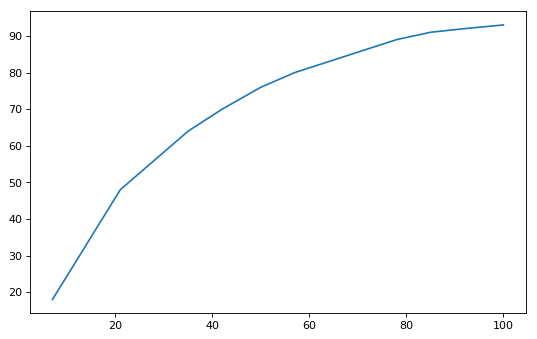

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=80)
plt.plot(one_hot_ABC["CP_item"], one_hot_ABC["CP_revenue"])

### comparing the received quantity with sold quantity

In [ ]:
one_hot[['Description','ReceivedQuantity','SoldQuantity','StockedOut']].groupby(by='Description').sum()

,ReceivedQuantity,SoldQuantity,StockedOut
Description,,,
0,4131.0,2631.0,453
1,8303.0,6063.0,394
2,5198.0,3248.0,95
3,2128.0,1241.0,135
4,1961.0,1212.0,227
5,8679.0,7170.0,543
6,4588.0,3137.0,487
7,738.0,467.0,12
8,8336.0,5922.0,359


In [ ]:
print(labels[0:14])

[ 0  9 13  3  1  8 12 11  7 10  4  5  6  2]


In [ ]:
description["Description"].values

array(['Honey Raisin Bran Muffin',
       'Pressed Juicery Spicy Greens w Ginger', 'Vive Juice Shot',
       'Mixed Berries & Granola Yogurt Parfait', 'Jalapeno Cheese Bagel',
       'Plain Bagel', 'Tasty Tuna Salad Sandwich',
       'Smoked Salmon Sandwich', 'New York Cheesecake', 'Protein Box',
       'Mixed Fruit Snack Pot', 'Muffin - Blueberry Streusel',
       'Muffin - Double Chocolate', 'Lemon Loaf'], dtype=object)

In [ ]:
one_hot_3

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,18,0,0,2.0,1.0,0.0,7,1,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,3,1,4.0,3.0,4.0,16,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,1,0,13.0,6.0,0.0,15,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,8,0,9.0,7.0,0.0,12,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,12,1,1.0,0.0,3.0,0,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,332,10,1,0.0,3.0,0.0,7,1,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,4,1,0.0,0.0,0.0,0,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,5,0,0.0,15.0,5.0,14,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
X_1 = one_hot_3.drop(['SoldQuantity'],axis=1)
Y_1 = one_hot_3['SoldQuantity']

In [ ]:
x_train = X_1.values
y_train = Y_1.values.reshape(len(Y_1),1)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=80, max_depth=8, gamma = 0, learning_rate =0.05, booster='gbtree')
model_4.fit(x_train, y_train)
model_4.score(x_train, y_train)

0.8941118883571714

### From the ABC Analysis it can be seen that Product 13, 9 and 7 has very low demand hence can be removed

In [ ]:
one_hot_3 = one_hot.reset_index()
one_hot_3 = one_hot_3[(one_hot_3["Description"]==0) | (one_hot_3["Description"]==1) | (one_hot_3["Description"]==2) | (one_hot_3["Description"]==3) | (one_hot_3["Description"]==4) | (one_hot_3["Description"]==5) | (one_hot_3["Description"]==6) | (one_hot_3["Description"]==8) | (one_hot_3["Description"]==10) | (one_hot_3["Description"]==11) | (one_hot_3["Description"]==12)]
one_hot_3 = one_hot_3.reset_index()

### For Product 1 and 5 stock can be increased 45%

In [ ]:
for i in range(len(one_hot_3)):
    if (one_hot_3.Description[i] == 1) or (one_hot_3.Description[i] == 5):
        one_hot_3.ReceivedQuantity[i] = round(one_hot_3.ReceivedQuantity[i]*1.45) 
one_hot_3

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,level_0,index,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
0,0,0,2019-06-29,18,0,0,2.0,1.0,0.0,7,...,0,1,0,0,0,0,1,0,0,0
1,3,3,2019-06-29,18,3,1,4.0,3.0,4.0,16,...,0,1,0,0,0,0,1,0,0,0
2,4,4,2019-06-29,18,1,0,13.0,6.0,0.0,15,...,0,1,0,0,0,0,1,0,0,0
3,5,5,2019-06-29,18,8,0,9.0,7.0,0.0,12,...,0,1,0,0,0,0,1,0,0,0
4,6,6,2019-06-29,18,12,1,1.0,0.0,3.0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,14490,4901,2020-06-29,332,10,1,0.0,3.0,0.0,7,...,1,0,0,0,0,0,0,0,0,1
11951,14491,4902,2020-06-29,332,4,1,0.0,0.0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
11952,14492,4903,2020-06-29,332,5,0,0.0,15.0,5.0,14,...,1,0,0,0,0,0,0,0,0,1
11953,14493,4904,2020-06-29,332,6,0,0.0,2.0,1.0,13,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
one_hot_3.set_index('BusinessDate', inplace=True)

In [ ]:
del one_hot_3["index"]
del one_hot_3["level_0"]

In [ ]:
X_2 = one_hot_3.drop(['SoldQuantity'],axis=1)
Y_2 = one_hot_3['SoldQuantity']

In [ ]:
one_hot_3.columns

Index(['StoreID', 'Description', 'ItemType', 'ReceivedQuantity',
       'SoldQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut', 'temp',
       'Holiday', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain'],
      dtype='object')

In [ ]:
one_hot_3

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,18,0,0,2.0,1.0,0.0,7,1,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,3,1,4.0,3.0,4.0,16,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,1,0,13.0,6.0,0.0,15,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,8,0,9.0,7.0,0.0,12,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
2019-06-29,18,12,1,1.0,0.0,3.0,0,0,71.3,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,332,10,1,0.0,3.0,0.0,7,1,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,4,1,0.0,0.0,0.0,0,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1
2020-06-29,332,5,0,0.0,15.0,5.0,14,0,64.6,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 0, test_size=0.2)

x_test = X_2.values
y_test = Y_2.values.reshape(len(Y_2),1)


x_test= scaler.transform(x_test)

In [ ]:
y_test = model_4.predict(x_test)

In [ ]:
y_test

array([-8.5863972e-01, -7.9624403e-01, -5.6221658e-01, ...,
        6.6422683e-04, -5.8593673e-01, -5.4630697e-01], dtype=float32)

In [ ]:
y_pred = np.round(scaler1.inverse_transform(y_test.reshape(1,len(y_test))))
y_pred

array([[ 2.,  2.,  5., ..., 11.,  5.,  5.]], dtype=float32)

In [ ]:
#y_orig = one_hot["SoldQuantity"][-2900:-1]
y_orig = Y_1.values.reshape(1,len(Y_1))
y_orig

array([[ 1.,  3.,  6., ..., 15.,  2.,  4.]])

In [ ]:
np.sum(y_pred),np.sum(y_orig)

(38882.0, 36582.0)

### Initiative 1 for Other 10 stores

In [ ]:
one_hot_ABC_10 = one_hot_10.copy()

In [ ]:
X_1 = one_hot_ABC_10.drop(['SoldQuantity'],axis=1)
Y_1 = one_hot_ABC_10['SoldQuantity']

In [ ]:
x_train = X_1.values
y_train = Y_1.values.reshape(len(Y_1),1)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=300, max_depth=12, gamma = 0, learning_rate =0.06, booster='gbtree')
model_4.fit(x_train, y_train)
model_4.score(x_train, y_train)

0.960357737099965

In [ ]:
one_hot_ABC_10 = one_hot_ABC_10[(one_hot_ABC_10["Description"]==0) | (one_hot_ABC_10["Description"]==1) | (one_hot_ABC_10["Description"]==2) | (one_hot_ABC_10["Description"]==3) | (one_hot_ABC_10["Description"]==4) | (one_hot_ABC_10["Description"]==5) | (one_hot_ABC_10["Description"]==6) | (one_hot_ABC_10["Description"]==8) | (one_hot_ABC_10["Description"]==10) | (one_hot_ABC_10["Description"]==11) | (one_hot_ABC_10["Description"]==12)]
one_hot_ABC_10 = one_hot_ABC_10.reset_index()

### For Product 1 and 5 stock can be increased 45%

In [ ]:
for i in range(len(one_hot_ABC_10)):
    if (one_hot_ABC_10.Description[i] == 1) or (one_hot_ABC_10.Description[i] == 5):
        one_hot_ABC_10.ReceivedQuantity[i] = round(one_hot_ABC_10.ReceivedQuantity[i]*1.45) 
one_hot_ABC_10

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind
0,2019-06-29,2,0,0,5.0,2.0,0.0,10,0,82.0,...,0,0,0,0,0,0,0,1,0,0
1,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,...,0,0,0,0,0,0,0,1,0,0
2,2019-06-29,2,1,0,12.0,6.0,0.0,13,1,82.0,...,0,0,0,0,0,0,0,1,0,0
3,2019-06-29,2,8,0,8.0,4.0,0.0,10,0,82.0,...,0,0,0,0,0,0,0,1,0,0
4,2019-06-29,2,12,1,0.0,2.0,1.0,9,0,82.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38273,2020-06-29,40,10,1,0.0,1.0,4.0,14,0,83.6,...,0,0,0,0,0,0,1,0,0,0
38274,2020-06-29,40,4,1,0.0,2.0,0.0,15,0,83.6,...,0,0,0,0,0,0,1,0,0,0
38275,2020-06-29,40,5,0,0.0,5.0,1.0,17,0,83.6,...,0,0,0,0,0,0,1,0,0,0
38276,2020-06-29,40,6,0,0.0,2.0,0.0,11,0,83.6,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
one_hot_ABC_10.set_index('BusinessDate', inplace=True)

In [ ]:
X_2 = one_hot_ABC_10.drop(['SoldQuantity'],axis=1)
Y_2 = one_hot_ABC_10['SoldQuantity']

In [ ]:
one_hot_ABC_10.columns

Index(['StoreID', 'Description', 'ItemType', 'ReceivedQuantity',
       'SoldQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut', 'temp',
       'Holiday', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain', 'Condition_snow',
       'Condition_wind'],
      dtype='object')

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 0, test_size=0.2)

x_test = X_2.values
y_test = Y_2.values.reshape(len(Y_2),1)

x_test= scaler.transform(x_test)

In [ ]:
y_test = model_4.predict(x_test)

In [ ]:
y_test

array([-0.9548303 , -0.9432746 , -0.776151  , ..., -0.8760785 ,
       -0.9457636 , -0.86974883], dtype=float32)

In [ ]:
y_pred = np.round(scaler1.inverse_transform(y_test.reshape(1,len(y_test))))
y_pred

array([[2., 2., 9., ..., 5., 2., 5.]], dtype=float32)

In [ ]:
#y_orig = one_hot["SoldQuantity"][-2900:-1]
y_orig = Y_1.values.reshape(1,len(Y_1))
y_orig

array([[2., 1., 0., ..., 5., 2., 6.]])

In [ ]:
np.sum(y_pred),np.sum(y_orig)

(125930.0, 122562.0)

### Extra credit: Accurate initiative for all the stores

In [ ]:
df.index = range(len(df))
df

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1
...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,3,1,5.0,0.0,5.0,0,0
584587,2020-06-28,401,1,0,0.0,0.0,0.0,0,0
584588,2020-06-28,401,8,0,6.0,5.0,0.0,0,1
584589,2020-06-29,401,1,0,0.0,0.0,0.0,0,0


In [ ]:
df = df[['BusinessDate','StoreID','Description','ItemType','ReceivedQuantity','SoldQuantity','EndQuantity','LatestOrder','StockedOut']]

In [ ]:
df['Description'] = le1.fit_transform(df[['Description']])
df['ItemType'] = le2.fit_transform(df[['ItemType']])

C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Pritesh Borad\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
df

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1
...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,3,1,5.0,0.0,5.0,0,0
584587,2020-06-28,401,1,0,0.0,0.0,0.0,0,0
584588,2020-06-28,401,8,0,6.0,5.0,0.0,0,1
584589,2020-06-29,401,1,0,0.0,0.0,0.0,0,0


In [ ]:
df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])

In [ ]:
one_hot = pd.get_dummies(df)
one_hot

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1
...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,3,1,5.0,0.0,5.0,0,0
584587,2020-06-28,401,1,0,0.0,0.0,0.0,0,0
584588,2020-06-28,401,8,0,6.0,5.0,0.0,0,1
584589,2020-06-29,401,1,0,0.0,0.0,0.0,0,0


In [ ]:
cor = one_hot.corr()
cor_target = abs(cor["SoldQuantity"])
cor_target

StoreID             0.105302
Description         0.212944
ItemType            0.505350
ReceivedQuantity    0.738947
SoldQuantity        1.000000
EndQuantity         0.078244
LatestOrder         0.521004
StockedOut          0.283474
Name: SoldQuantity, dtype: float64

In [ ]:
one_hot.drop('EndQuantity',axis=1)

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,LatestOrder,StockedOut
0,2019-06-29,2,0,0,4.0,2.0,10,0
1,2019-06-29,2,9,1,0.0,1.0,13,0
2,2019-06-29,2,13,1,0.0,0.0,0,0
3,2019-06-29,2,3,1,0.0,3.0,11,1
4,2019-06-29,2,1,0,6.0,6.0,13,1
...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,3,1,5.0,0.0,0,0
584587,2020-06-28,401,1,0,0.0,0.0,0,0
584588,2020-06-28,401,8,0,6.0,5.0,0,1
584589,2020-06-29,401,1,0,0.0,0.0,0,0


In [ ]:
one_hot['weekday'] = one_hot['BusinessDate'].dt.day_name()
one_hot.head(5)

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,Saturday
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,Saturday
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,Saturday
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,Saturday
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,Saturday


In [ ]:
weather = pd.read_csv('USA.csv')

In [ ]:
weather['datetime'] = pd.to_datetime(weather['datetime'])
weather = weather[['datetime','temp','icon']]
weather.head(5)

,datetime,temp,icon
0,2019-01-01,56.5,rain
1,2019-02-01,45.3,cloudy
2,2019-03-01,46.5,partly-cloudy-day
3,2019-04-01,43.1,rain
4,2019-05-01,49.1,rain


In [ ]:
weather = weather.rename(columns={'datetime': 'BusinessDate','icon':'Condition'})

In [ ]:
one_hot = pd.merge(one_hot,weather, on='BusinessDate',how='left')

In [ ]:
one_hot

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday,temp,Condition
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,Saturday,82.0,rain
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,Saturday,82.0,rain
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,Saturday,82.0,rain
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,Saturday,82.0,rain
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,Saturday,82.0,rain
...,...,...,...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,3,1,5.0,0.0,5.0,0,0,Sunday,82.3,partly-cloudy-day
584587,2020-06-28,401,1,0,0.0,0.0,0.0,0,0,Sunday,82.3,partly-cloudy-day
584588,2020-06-28,401,8,0,6.0,5.0,0.0,0,1,Sunday,82.3,partly-cloudy-day
584589,2020-06-29,401,1,0,0.0,0.0,0.0,0,0,Monday,83.6,partly-cloudy-day


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=one_hot['BusinessDate'].min(), end=one_hot['BusinessDate'].max())

one_hot['Holiday'] = one_hot['BusinessDate'].isin(holidays)
one_hot

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday,temp,Condition,Holiday
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,Saturday,82.0,rain,False
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,Saturday,82.0,rain,False
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,Saturday,82.0,rain,False
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,Saturday,82.0,rain,False
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,Saturday,82.0,rain,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584586,2020-06-28,401,3,1,5.0,0.0,5.0,0,0,Sunday,82.3,partly-cloudy-day,False
584587,2020-06-28,401,1,0,0.0,0.0,0.0,0,0,Sunday,82.3,partly-cloudy-day,False
584588,2020-06-28,401,8,0,6.0,5.0,0.0,0,1,Sunday,82.3,partly-cloudy-day,False
584589,2020-06-29,401,1,0,0.0,0.0,0.0,0,0,Monday,83.6,partly-cloudy-day,False


In [ ]:
one_hot['Holiday'] = one_hot['Holiday'].astype(int)

In [ ]:
one_hot.head()

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,weekday,temp,Condition,Holiday
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,Saturday,82.0,rain,0
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,Saturday,82.0,rain,0
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,Saturday,82.0,rain,0
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,Saturday,82.0,rain,0
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,Saturday,82.0,rain,0


In [ ]:
one_hot = pd.get_dummies(one_hot)
one_hot.head()

,BusinessDate,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind
0,2019-06-29,2,0,0,4.0,2.0,0.0,10,0,82.0,...,0,0,0,0,0,0,0,1,0,0
1,2019-06-29,2,9,1,0.0,1.0,9.0,13,0,82.0,...,0,0,0,0,0,0,0,1,0,0
2,2019-06-29,2,13,1,0.0,0.0,27.0,0,0,82.0,...,0,0,0,0,0,0,0,1,0,0
3,2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,...,0,0,0,0,0,0,0,1,0,0
4,2019-06-29,2,1,0,6.0,6.0,0.0,13,1,82.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
one_hot.set_index('BusinessDate', inplace=True)

In [ ]:
one_hot.columns

Index(['StoreID', 'Description', 'ItemType', 'ReceivedQuantity',
       'SoldQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut', 'temp',
       'Holiday', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain', 'Condition_snow',
       'Condition_wind'],
      dtype='object')

In [ ]:
one_hot_temp = one_hot.copy()

In [ ]:
one_hot_temp.loc[(one_hot_temp['temp']<30) & (one_hot_temp['temp']>=15), 'Temp_class'] = 0
one_hot_temp.loc[(one_hot_temp['temp']<45) & (one_hot_temp['temp']>=30), 'Temp_class'] = 1
one_hot_temp.loc[(one_hot_temp['temp']<60) & (one_hot_temp['temp']>=45), 'Temp_class'] = 2
one_hot_temp.loc[(one_hot_temp['temp']<75) & (one_hot_temp['temp']>=60), 'Temp_class'] = 3
one_hot_temp.loc[(one_hot_temp['temp']<95) & (one_hot_temp['temp']>=75), 'Temp_class'] = 4

In [ ]:
one_hot_temp

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind,Temp_class
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,2,0,0,4.0,2.0,0.0,10,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,9,1,0.0,1.0,9.0,13,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,13,1,0.0,0.0,27.0,0,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,1,0,6.0,6.0,0.0,13,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-28,401,3,1,5.0,0.0,5.0,0,0,82.3,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-28,401,1,0,0.0,0.0,0.0,0,0,82.3,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-28,401,8,0,6.0,5.0,0.0,0,1,82.3,0,...,0,0,0,0,0,1,0,0,0,4.0


In [ ]:
X_1 = one_hot_temp.drop(['SoldQuantity'],axis=1)
Y_1 = one_hot_temp['SoldQuantity']

In [ ]:
x_train = X_1.values
y_train = Y_1.values.reshape(len(Y_1),1)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler1 = MinMaxScaler(feature_range=(-1, 1))

x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)

In [ ]:
from xgboost import XGBRegressor
model_4 = XGBRegressor(n_estimators=300, max_depth=12, gamma = 0, learning_rate =0.06, booster='gbtree')
model_4.fit(x_train, y_train)
model_4.score(x_train, y_train)

0.9071096083620072

### Stocking the Quantity based on the Products and Temperature

In [ ]:
for i in range(len(one_hot_temp)):
    if (one_hot_temp.Temp_class[i] == 0) and ((one_hot_temp.Description[i] == 0) or (one_hot_temp.Description[i] == 1) or (one_hot_temp.Description[i] == 5) or (one_hot_temp.Description[i] == 6) or (one_hot_temp.Description[i] == 8)):
        one_hot_temp.ReceivedQuantity[i] = round(one_hot_temp.ReceivedQuantity[i]*1.25)     
    elif (one_hot_temp.Temp_class[i] == 2) and ((one_hot_temp.Description[i] == 0) or (one_hot_temp.Description[i] == 5)):
        one_hot_temp.ReceivedQuantity[i] = round(one_hot_temp.ReceivedQuantity[i]*1.15)
    elif (one_hot_temp.Temp_class[i] == 3) and ((one_hot_temp.Description[i] == 0) or (one_hot_temp.Description[i] == 1) or (one_hot_temp.Description[i] == 5) or (one_hot_temp.Description[i] == 6) or (one_hot_temp.Description[i] == 8)):
        one_hot_temp.ReceivedQuantity[i] = round(one_hot_temp.ReceivedQuantity[i]*1.30)        
one_hot_temp

C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Pritesh Borad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoi

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind,Temp_class
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,2,0,0,4.0,2.0,0.0,10,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,9,1,0.0,1.0,9.0,13,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,13,1,0.0,0.0,27.0,0,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,1,0,6.0,6.0,0.0,13,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-28,401,3,1,5.0,0.0,5.0,0,0,82.3,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-28,401,1,0,0.0,0.0,0.0,0,0,82.3,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-28,401,8,0,6.0,5.0,0.0,0,1,82.3,0,...,0,0,0,0,0,1,0,0,0,4.0


In [ ]:
one_hot_temp.columns

Index(['StoreID', 'Description', 'ItemType', 'ReceivedQuantity',
       'SoldQuantity', 'EndQuantity', 'LatestOrder', 'StockedOut', 'temp',
       'Holiday', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'Condition_clear-day', 'Condition_cloudy',
       'Condition_partly-cloudy-day', 'Condition_rain', 'Condition_snow',
       'Condition_wind', 'Temp_class'],
      dtype='object')

In [ ]:
#one_hot_1=one_hot_1.set_index(["BusinessDate"])
one_hot_temp

,StoreID,Description,ItemType,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,temp,Holiday,...,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Condition_clear-day,Condition_cloudy,Condition_partly-cloudy-day,Condition_rain,Condition_snow,Condition_wind,Temp_class
BusinessDate,,,,,,,,,,,,,,,,,,,,,
2019-06-29,2,0,0,4.0,2.0,0.0,10,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,9,1,0.0,1.0,9.0,13,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,13,1,0.0,0.0,27.0,0,0,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,3,1,0.0,3.0,0.0,11,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
2019-06-29,2,1,0,6.0,6.0,0.0,13,1,82.0,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-28,401,3,1,5.0,0.0,5.0,0,0,82.3,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-28,401,1,0,0.0,0.0,0.0,0,0,82.3,0,...,0,0,0,0,0,1,0,0,0,4.0
2020-06-28,401,8,0,6.0,5.0,0.0,0,1,82.3,0,...,0,0,0,0,0,1,0,0,0,4.0


In [ ]:
cor = one_hot_temp.corr()
cor_target = abs(cor["SoldQuantity"])
cor_target

StoreID                        0.105302
Description                    0.212944
ItemType                       0.505350
ReceivedQuantity               0.742065
SoldQuantity                   1.000000
EndQuantity                    0.078244
LatestOrder                    0.521004
StockedOut                     0.283474
temp                           0.006804
Holiday                        0.017588
weekday_Friday                 0.048281
weekday_Monday                 0.008713
weekday_Saturday               0.011921
weekday_Sunday                 0.067617
weekday_Thursday               0.019955
weekday_Tuesday                0.002999
weekday_Wednesday              0.018679
Condition_clear-day            0.013471
Condition_cloudy               0.010791
Condition_partly-cloudy-day    0.015965
Condition_rain                 0.019655
Condition_snow                 0.003597
Condition_wind                 0.005471
Temp_class                     0.004045
Name: SoldQuantity, dtype: float64

In [ ]:
X_2 = one_hot_temp.drop(['SoldQuantity'],axis=1)
Y_2 = one_hot_temp['SoldQuantity']

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = 0, test_size=0.2)

x_test = X_2.values
y_test = Y_2.values.reshape(len(Y_2),1)


x_test= scaler.transform(x_test)

In [ ]:
y_test = model_4.predict(x_test)

In [ ]:
y_test

array([-0.9573889 , -0.96629584, -0.9998288 , ..., -0.85551965,
       -1.0000147 , -0.8564869 ], dtype=float32)

In [ ]:
y_pred = np.round(scaler1.inverse_transform(y_test.reshape(1,len(y_test))))
y_pred

array([[ 2.,  1.,  0., ...,  6., -0.,  6.]], dtype=float32)

In [ ]:
#y_orig = one_hot["SoldQuantity"][-2900:-1]
y_orig = Y_1.values.reshape(1,len(Y_1))
y_orig

array([[2., 1., 0., ..., 5., 0., 6.]])

#### Total sales of predicted Quantity vs. Total sales of original Quantity

In [ ]:
np.sum(y_pred),np.sum(y_orig)

(1867970.0, 1767667.0)